In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import json
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
from scipy import constants as const
import numpy as np

%matplotlib inline

In [3]:
# where WellClass and Ga[ codes are located
sys.path.append('../')

from src.WellClass.libs.well_pressure.Pressure import Pressure
from src.WellClass.libs.well_pressure.PressureScenarioManager import PressureScenarioManager
from src.WellClass.libs.well_pressure.PressureScenario import PressureScenario
from src.WellClass.libs.pvt.pvt import get_rho_from_pvt_data, load_pvt_data, _integrate_pressure

# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/workspaces/WINC_OnePager/.venv/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.

AttributeError: _ARRAY_API not found

ImportError: cannot import name 'compute_hydrostatic_pressure' from 'src.WellClass.libs.pvt.pvt' (/workspaces/WINC_OnePager/notebooks/../src/WellClass/libs/pvt/pvt.py)

In [4]:
# resource configuration
rcParams['figure.dpi'] = 200

# fount information
rcParams['font.family'] = 'Equinor'
rcParams['font.size'] = 9

# fornt location
font_path = r'Equinor_regular'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

## WINC Examples

### Using predefined fluid curves

It can handle different fluid compositions if PVT tables are available. 
Currently there are 4 options:
- Pure CO2 (100 mol% CO2)
- Pure Methane (100 mol% CH4)
- Gas mixture 1 (96 mol% CO2, 0.4 mol% H2, 1 mol% Ar, 0.82 mol% N2, 1.78 mol% CH4)
- Gas mixture 2 (95 mol% CO2, 5 mol% CH4)


In [32]:
import os
# Retrieve PVT data that is available


directory_path = '../src/WellClass/libs/pvt/pvt_constants'

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    # print(filename)
    file_path = os.path.join(directory_path, filename)
    if os.path.isdir(file_path):
        print(f'{filename}')

pure_co2
mixture2
mixture1
methane
water


In [33]:
field_fluid_type = 'pure_co2'
field_pressure_value = 500
field_depth_value = 3500

In [34]:
import pandas as pd
shmin_data = pd.read_csv(r'predict.txt').values

shmin_data

array([[ 110.401     ,    7.72203107],
       [ 110.401     ,    7.72203107],
       [ 111.424     ,    7.87009997],
       ...,
       [3987.46099   ,  829.28023701],
       [3991.46001   ,  830.1119212 ],
       [3991.46001   ,  830.1119212 ]], shape=(4778, 2))

In [35]:
my_pressure = Pressure(
    # wellbore seafloor depth mTVD MSL.
    sf_depth_msl=109.0, #wellbore.water_depth,
    # wellbore total depth in mTVD RKB
    well_td_rkb=4329.2, #total_depth_rkb,
    # wellbore rkb in mTVD RKB
    well_rkb=62.8,
    # seafloor temperature in degC
    sf_temp=4, #DEFAULT_SEAFLOOR_TEMPERATURE,
    # geothermal gradient in degC/km
    geo_tgrad=40, #DEFAULT_GEOTHERMAL_GRADIENT,
    fluid_type=field_fluid_type,  # type: ignore
    # path to the pvt constants folder
    pvt_path=directory_path,
    z_fluid_contact= 3500, #wellbore_settings.pressure_datum_tvd_msl,  # type: ignore
    p_fluid_contact= 600, #wellbore_settings.reservoir_pressure_bar,  # type: ignore
    specific_gravity=None,  # type: ignore
    ip_shmin_data=shmin_data,
)

[  1.01325      1.11384372   1.21443794 ... 463.50926874 463.60000865
 463.69074453]
Computing pressure profile for scenario: hydrostatic


/workspaces/WINC_OnePager/notebooks/../src/WellClass/libs/well_pressure/Pressure.py:210: UserWarning: No Shmin data between seafloor depth (109.0) and minimum provided depth (110.401). Extrapolating using hydrostatic pressure at seafloor.
  warnings.warn(


In [36]:
const.g

9.80665

In [37]:
depth_values, shmin_values = shmin_data.T

unique_indices = np.unique(depth_values, return_index=True)[1]
len(depth_values), len(unique_indices)

(4778, 2389)

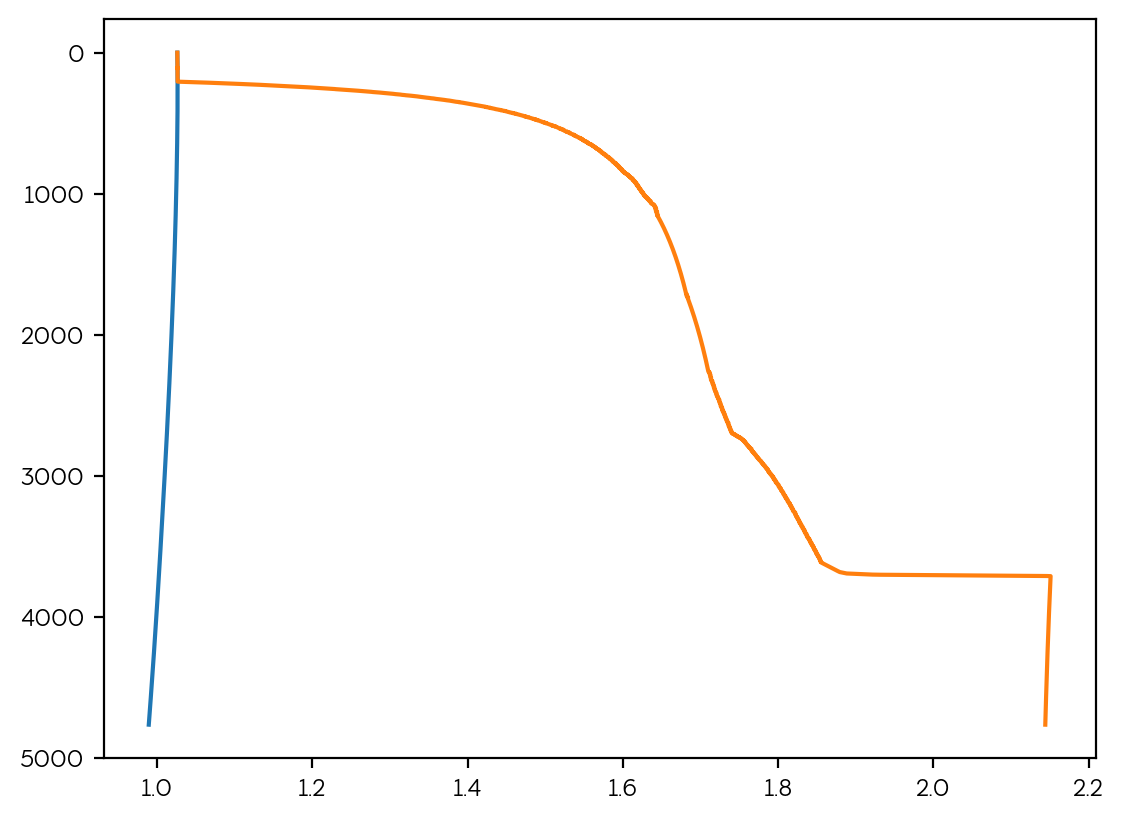

In [38]:



wd = my_pressure.sf_depth_msl
depth_array = my_pressure.init_curves['depth']
shmin_curve = my_pressure.init_curves['min_horizontal_stress']

hydr_p = my_pressure.init_curves['hydrostatic_pressure']

p_ml = np.interp(wd, depth_array,  hydr_p)
p_ml


hydr_density = ((hydr_p - p_ml) * 1e5) / (const.g * (depth_array - wd))  # convert to MPa
shmin_density = ((shmin_curve - p_ml) * 1e5) / (const.g * (depth_array - wd))  # convert to MPa
hydr_sg = hydr_density / 1e3
shmin_sg = shmin_density / 1e3

plt.plot(hydr_sg, depth_array)
plt.plot(shmin_sg, depth_array)
plt.gca().invert_yaxis()

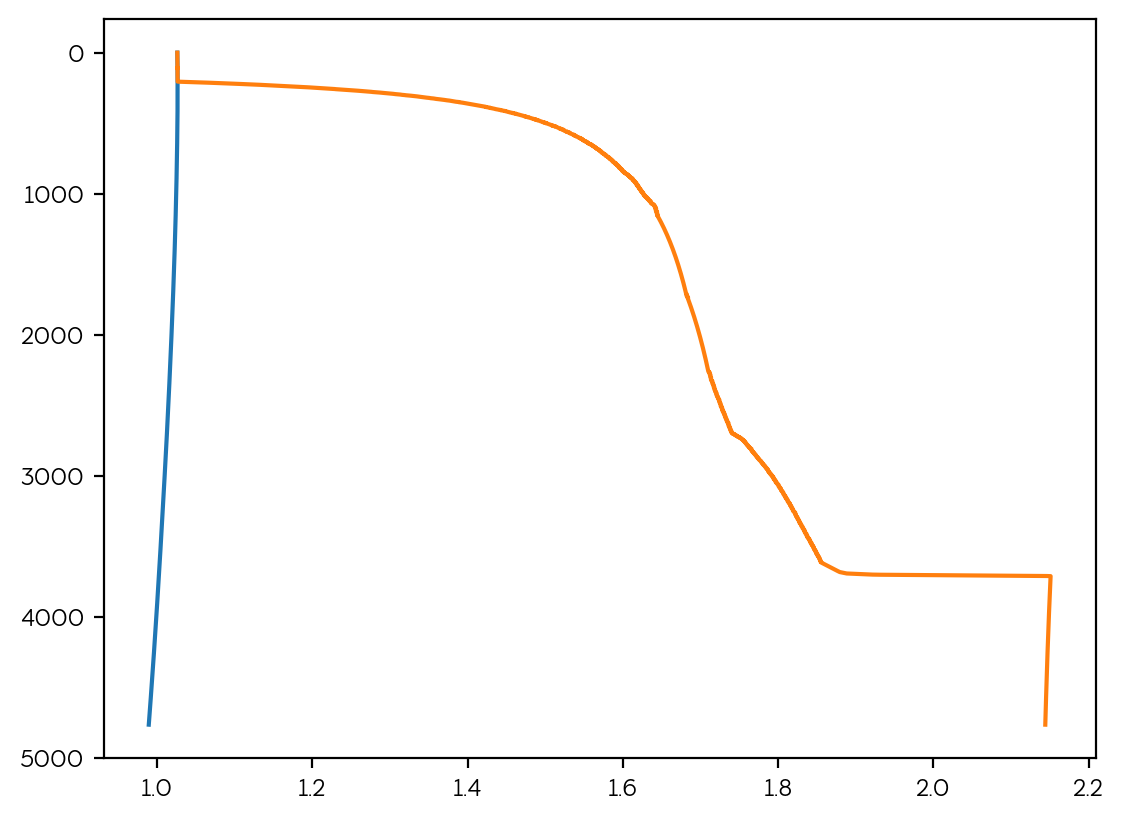

In [39]:



wd = my_pressure.sf_depth_msl
depth_array = my_pressure.init_curves['depth']
shmin_curve = my_pressure.init_curves['min_horizontal_stress']

hydr_p = my_pressure.init_curves['hydrostatic_pressure']

p_ml = np.interp(wd, depth_array,  hydr_p)
p_ml


hydr_density = ((hydr_p - p_ml) * 1e5) / (const.g * (depth_array - wd))  # convert to MPa
shmin_density = ((shmin_curve - p_ml) * 1e5) / (const.g * (depth_array - wd))  # convert to MPa
hydr_sg = hydr_density / 1e3
shmin_sg = shmin_density / 1e3

plt.plot(hydr_sg, depth_array)
plt.plot(shmin_sg, depth_array)
plt.gca().invert_yaxis()

Text(0, 0.5, 'Shmin (MPa)')

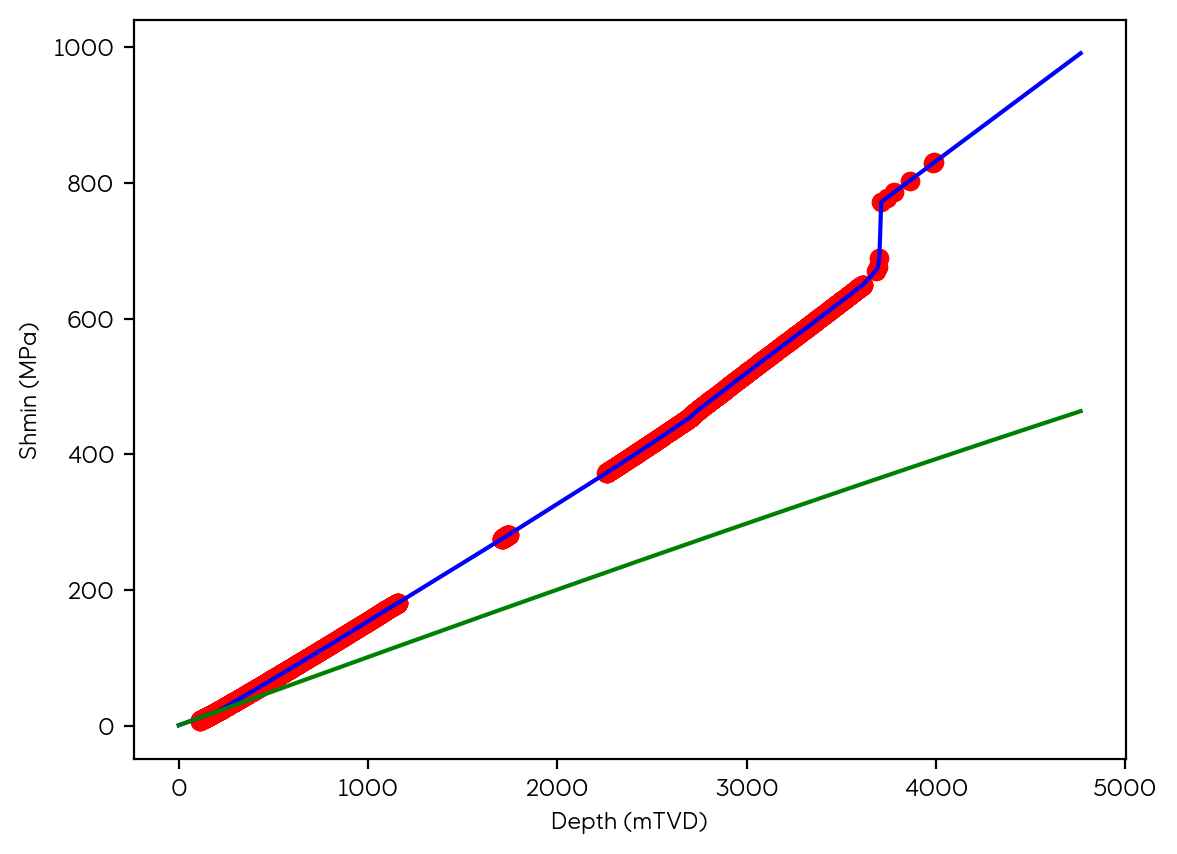

In [40]:
plt.scatter(depth_values, shmin_values, label='Shmin Data', color='red')
plt.plot(depth_array, shmin_curve, label='Interpolated Shmin Curve', color='blue')
plt.plot(depth_array, hydr_p, label='Hydrostatic Pressure', color='green')
plt.xlabel('Depth (mTVD)')
plt.ylabel('Shmin (MPa)')

In [41]:
depth_array[np.isnan(shmin_curve)]

Series([], Name: depth, dtype: float64)

In [42]:
depth_array

0          0.0
1          1.0
2          2.0
3          3.0
4          4.0
         ...  
4761    4761.0
4762    4762.0
4763    4763.0
4764    4764.0
4765    4765.0
Name: depth, Length: 4766, dtype: float64

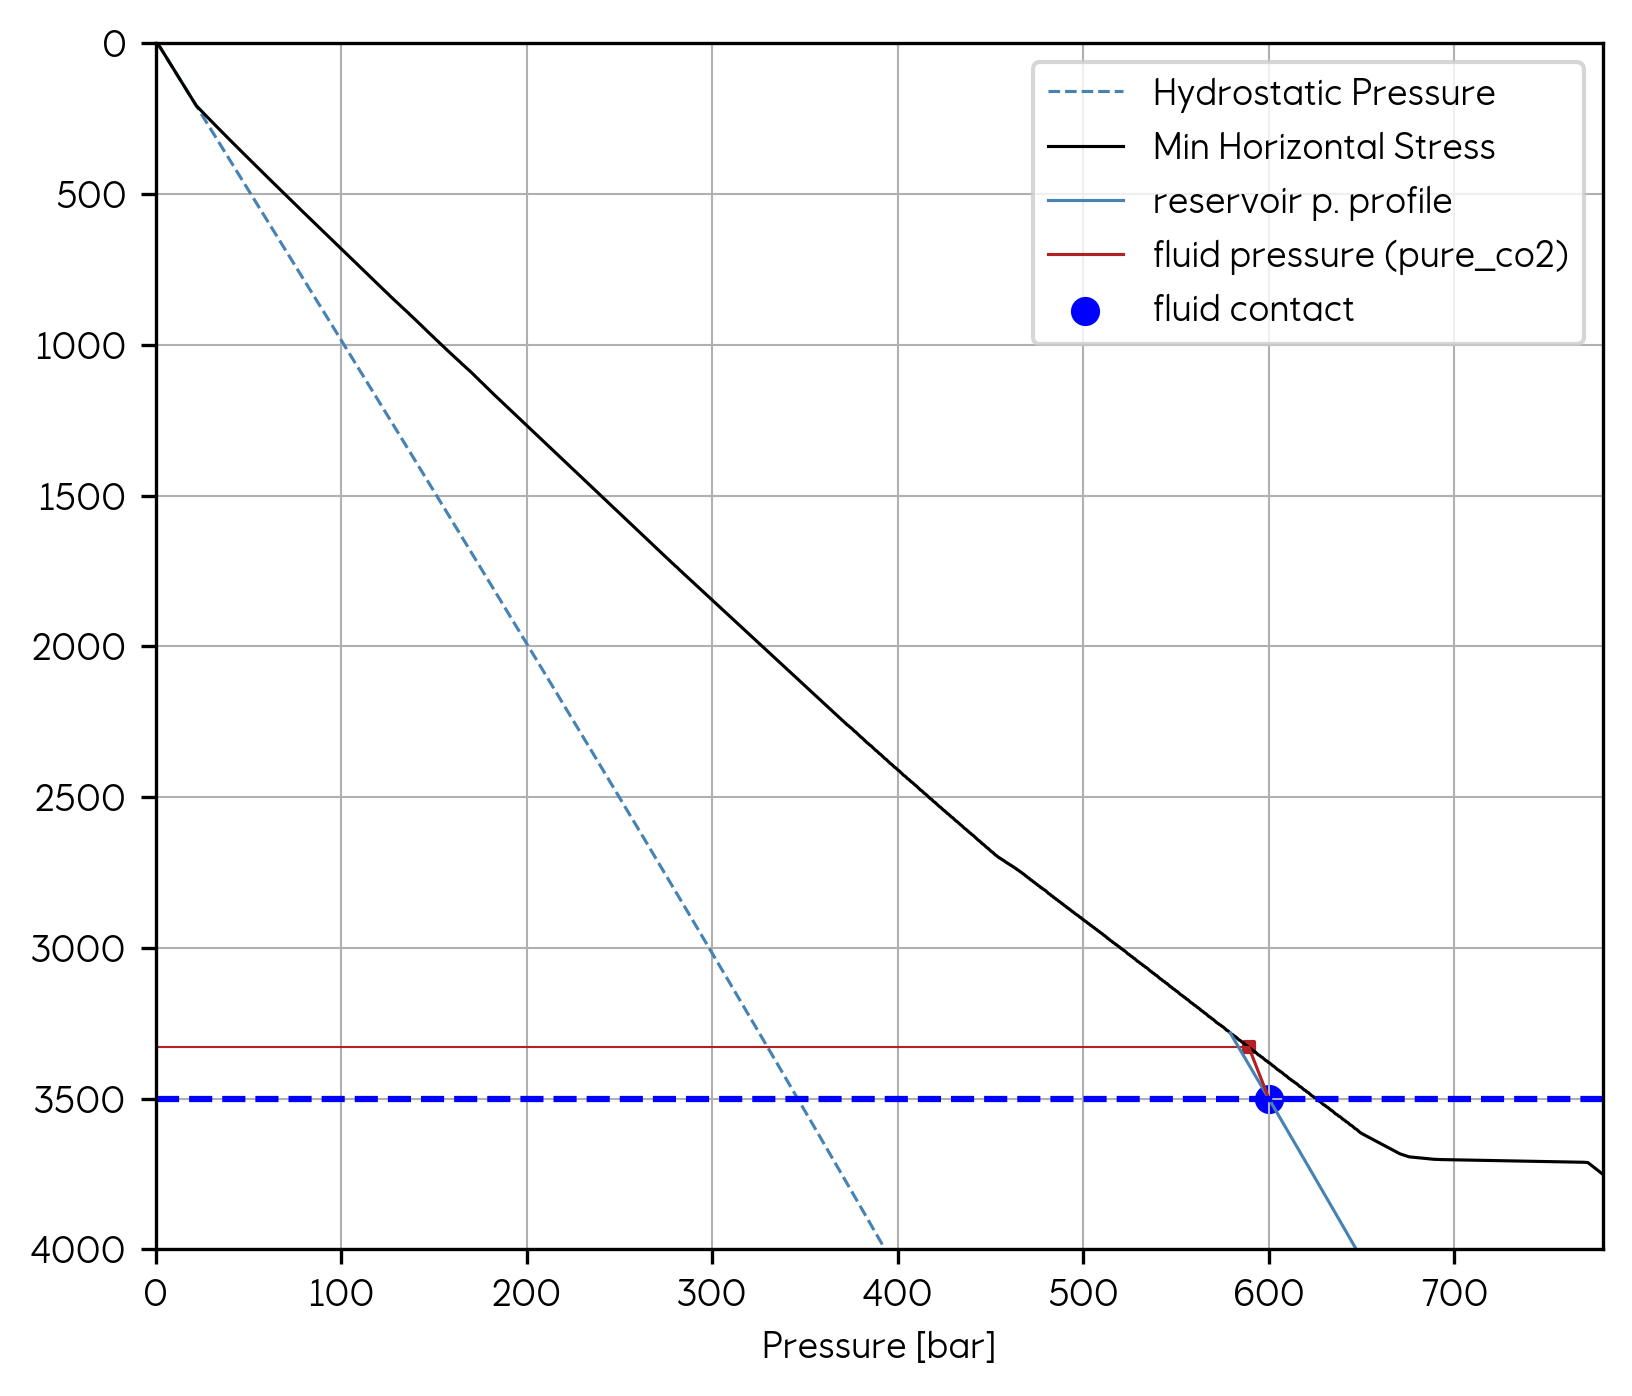

In [43]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

In [44]:
i = 0
my_pressure.add_scenario(
    scenario_name=str(i + 1),
    fluid_type=my_pressure.fluid_type,  # type: ignore
    from_resrvr=True,
    z_fluid_contact=my_pressure.z_fluid_contact,
    p_fluid_contact=my_pressure.p_fluid_contact,
    p_delta=50,
    specific_gravity=None,  # type: ignore
)

Computing pressure profile for scenario: 1


In [45]:
my_pressure.init_curves

depth  temperature  hydrostatic_pressure  min_horizontal_stress
0        0.0         4.00              1.013250               1.013250
1        1.0         4.00              1.113844               1.113844
2        2.0         4.00              1.214438               1.214438
3        3.0         4.00              1.315033               1.315033
4        4.0         4.00              1.415628               1.415628
...      ...          ...                   ...                    ...
4761  4761.0       190.08            463.327777             990.154692
4762  4762.0       190.12            463.418525             990.362664
4763  4763.0       190.16            463.509269             990.570636
4764  4764.0       190.20            463.600009             990.778608
4765  4765.0       190.24            463.690745             990.986580

[4766 rows x 4 columns]

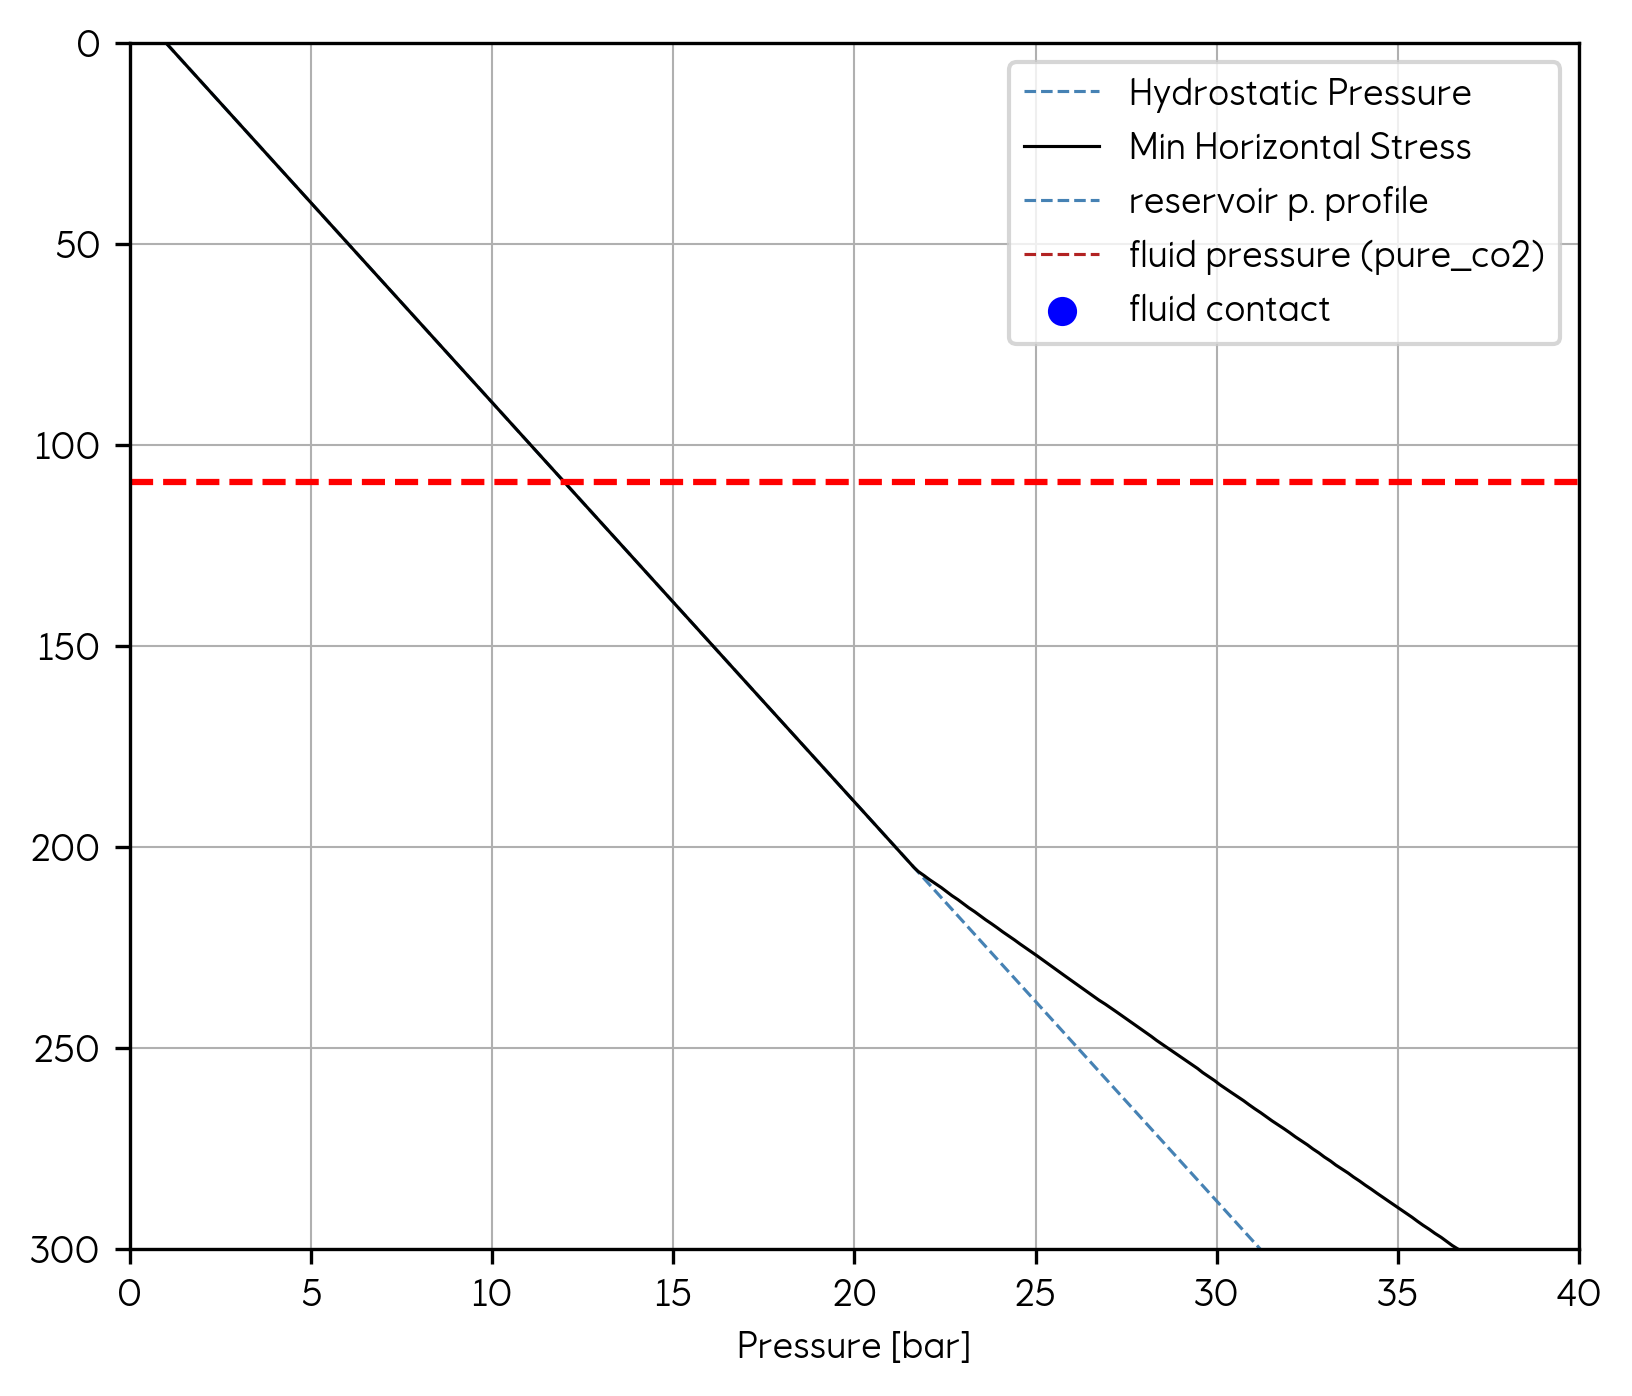

In [46]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

# ax.plot(my_pressure.init_curves['hydrostatic_pressure'], my_pressure.init_curves['depth'])
# ax.plot(my_pressure.init_curves['min_horizontal_stress'], my_pressure.init_curves['depth'], c='k')


ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')
ax.axhline(y=my_pressure.sf_depth_msl, color='red', linestyle='--', label='Fluid contact + 500 m')


# ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
ax.set_ylim(bottom=300)
ax.set_ylim(top=0)
ax.set_xlim(left=0)
ax.set_xlim(right=40)

# ax.invert_yaxis()  # Invert y-axis to have depth increasing downwards
fig.tight_layout()

In [47]:
z_shmin_test = np.array([ 108.30027,  160.47047,  212.6596 ,  264.8497 ,  317.03985,
        369.22997,  421.42007,  473.61019,  525.80038,  577.99044,
        630.17959,  682.49777,  735.06332,  787.61892,  840.11227,
        891.92031,  943.72927,  995.54714, 1043.21108, 1080.19961,
       1117.19546, 1699.76357, 2270.4772 , 2333.49697, 2379.71084,
       2419.923  , 2460.12588, 2500.3373 , 2540.54116, 2588.63369,
       2639.89346, 2712.87539, 2764.52676, 2812.2228 , 2859.54507,
       2906.86733, 2954.18032, 3001.50259, 3048.8251 , 3101.18911,
       3168.36562, 3235.54092, 3302.71523, 3364.56143, 3425.33584,
       3486.10903, 3546.87051, 3607.64346, 3962.69668])

shmin_test = np.array([  7.57509488,  14.9707876 ,  22.90637362,  31.12614317,
        39.5301454 ,  48.02965604,  56.59625184,  65.23146813,
        73.96717878,  82.66985704,  91.4326937 , 100.22868776,
       109.10199379, 117.98429031, 126.83670606, 135.7959375 ,
       144.51713241, 153.33118386, 161.59329197, 168.17055222,
       174.4782244 , 274.46524303, 374.86100782, 385.95246495,
       394.52988045, 401.90879759, 409.55117796, 416.98125152,
       424.6829576 , 433.7380002 , 443.36271491, 456.95049108,
       467.82012964, 478.09840523, 488.66822892, 499.03644888,
       509.76715224, 520.28856301, 530.58520286, 541.82766666,
       555.74020117, 569.42737627, 583.51745168, 596.09463817,
       608.87810798, 621.73290384, 634.65714658, 647.65497687,
       824.12995393])

depth_values_0=np.float64(108.30027)
shmin_values_0=np.float64(7.575094875231)

depth_values_end=np.float64(4286.1)
shmin_values_end=np.float64(701.33797188)

In [48]:
shmin_data[:,1]

array([  7.72203107,   7.72203107,   7.87009997, ..., 829.28023701,
       830.1119212 , 830.1119212 ], shape=(4778,))

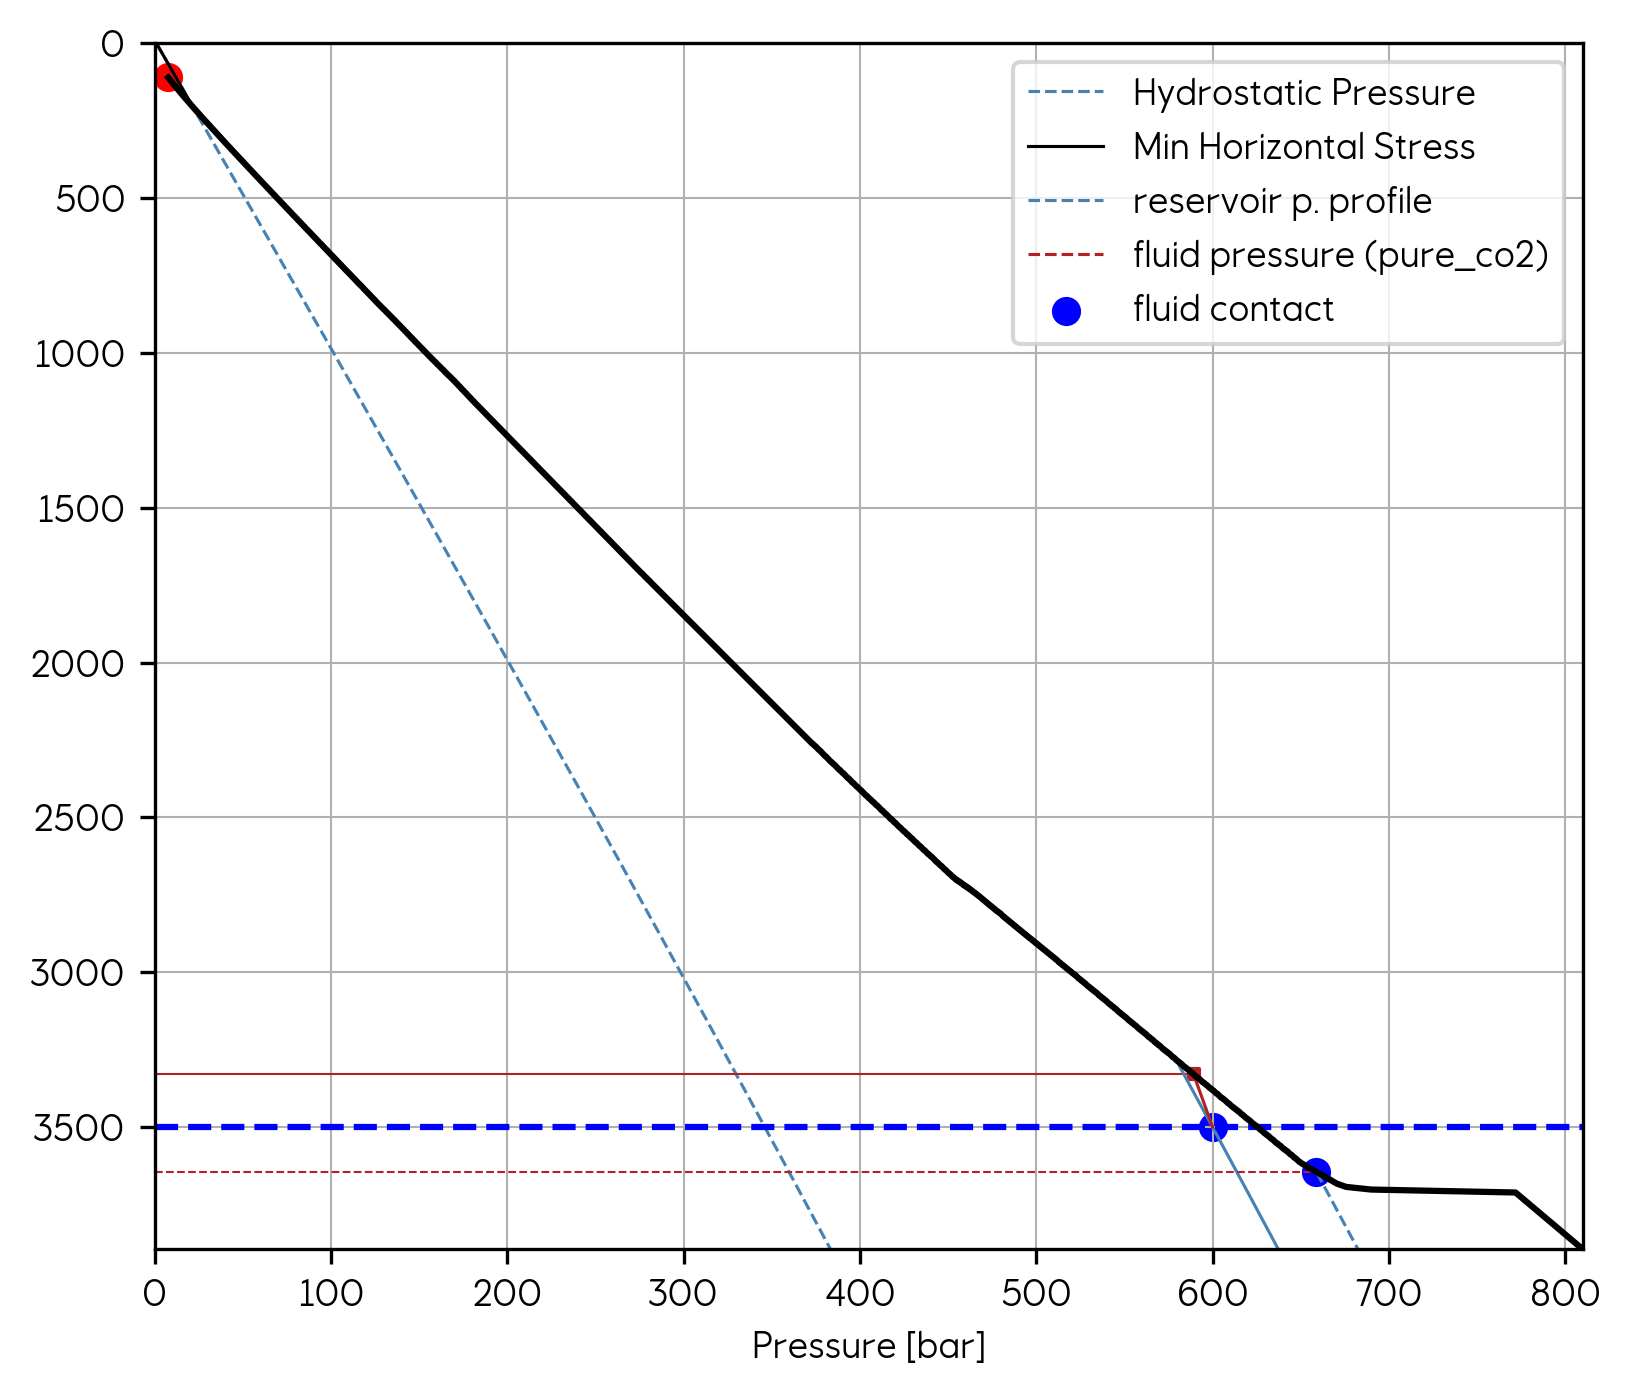

In [49]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.plot(shmin_data[:,1], shmin_data[:,0], c='k', label='Shmin test')
ax.scatter(shmin_values_0, depth_values_0, c='r', label='Shmin 0')
ax.scatter(shmin_values_end, depth_values_end, c='g', label='Shmin end')

# ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

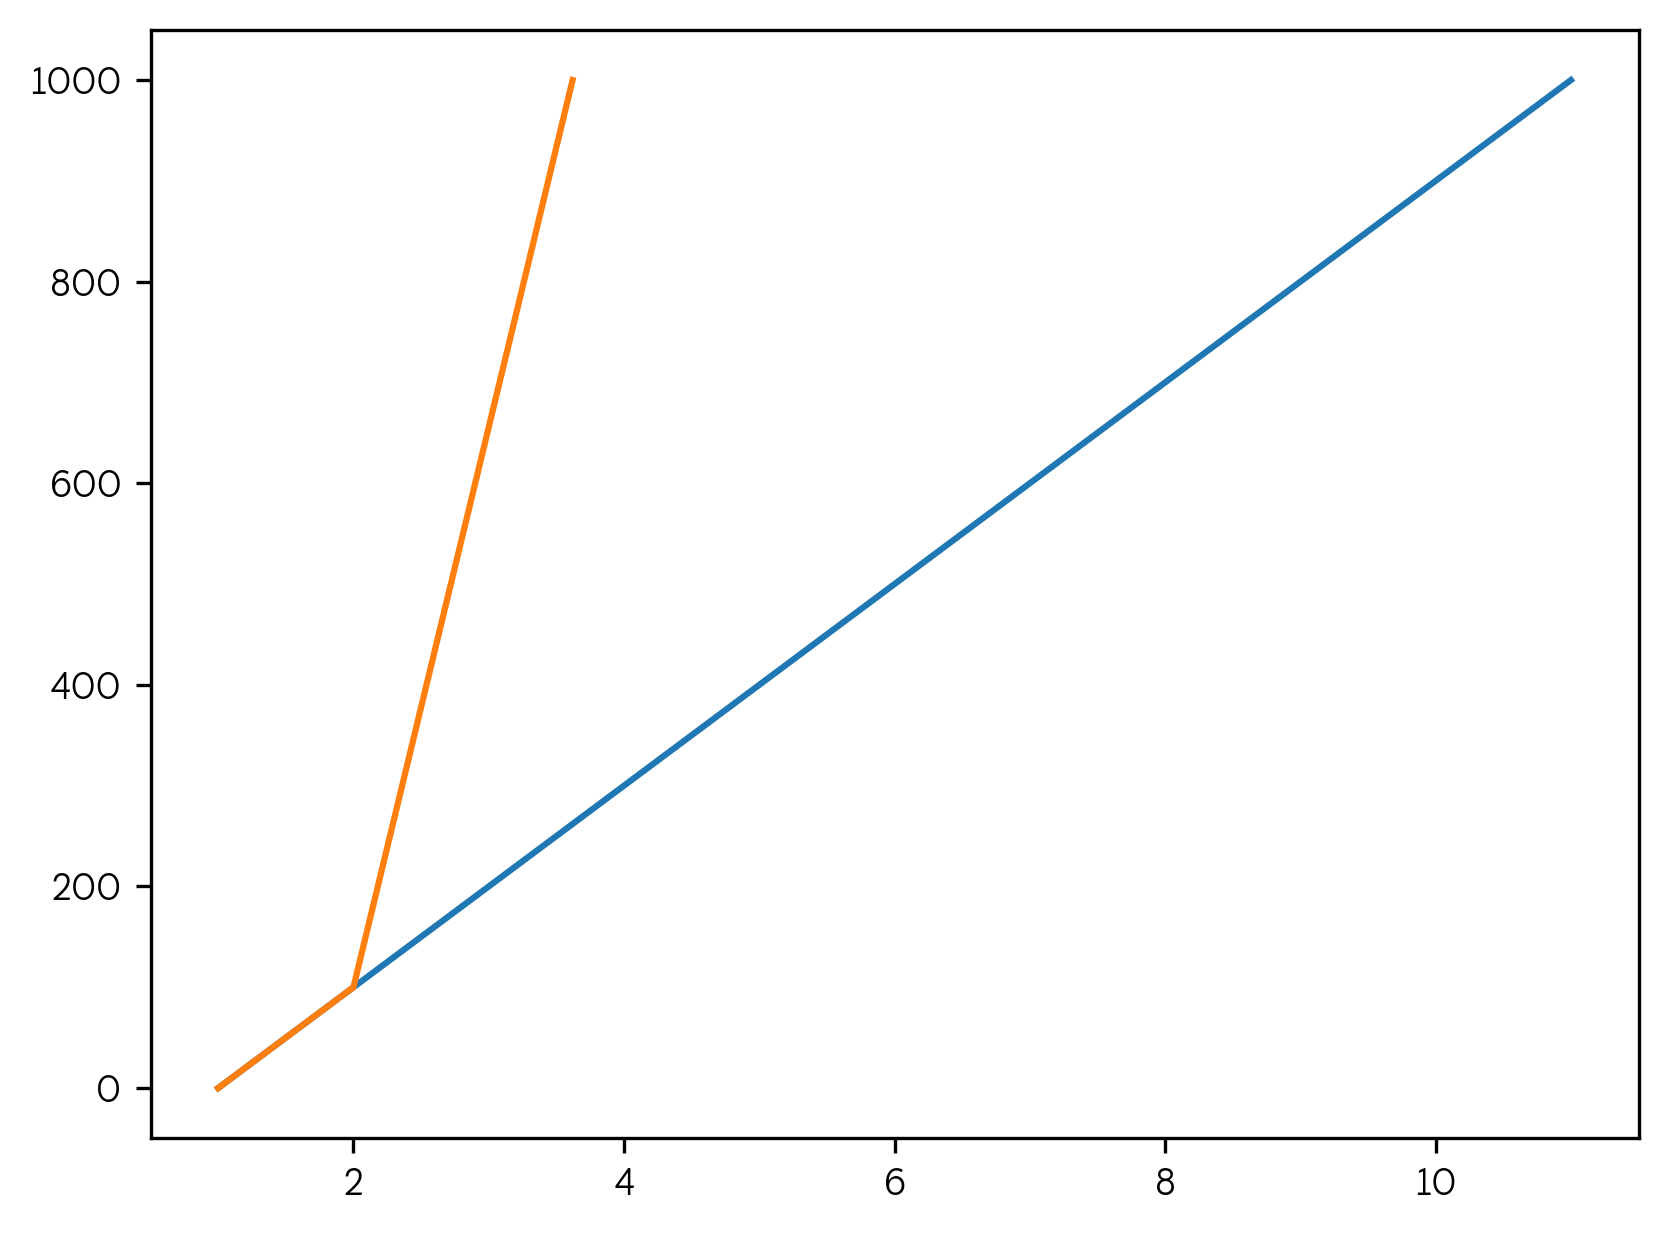

In [50]:
z = np.linspace(0, 1000, 1001)
p_hyd = 1+ 0.01 * z
p_hyd

wd = 100

p_ml = np.interp(wd, z, p_hyd)
z_ml = z - wd


shmin = p_ml + z_ml*0.0018

shmin[z < wd] = p_hyd[z < wd]

plt.plot(p_hyd, z, label='Hydrostatic pressure')
plt.plot(shmin, z, label='Shmin')

In [51]:
(shmin[z>wd] < p_hyd[z>wd]).sum() / len(shmin[z>wd])

np.float64(1.0)

In [52]:
my_pressure.scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD  z_MSAD_brine  \
0  hydrostatic         True  3329.411507  589.213945   3281.586079   
1            1         True  3644.517831  658.888180   3644.517829   

   p_MSAD_brine      z_resrv    p_resrv  z_fluid_contact  p_fluid_contact  \
0    579.140546  3500.000000  600.00000      3500.000000        600.00000   
1    658.888180  3644.517831  658.88818      3644.517831        658.88818   

      p_delta fluid_type fluid_composition specific_gravity  
0  253.948921   pure_co2          100% CO2             None  
1  299.140417   pure_co2          100% CO2             None

### Using SG

In [53]:
field_fluid_type = 0.1

field_pressure_value = 500
field_depth_value = 3500

In [54]:
my_pressure = Pressure(sf_depth_msl=109,  # wellbore seafloor depth mTVD MSL. 
                       well_td_rkb=6648,  # wellbore td in mTVD RKB
                       well_rkb=62.8,     # wellbore rkb in mTVD RKB
                       sf_temp=4,         # seafloor temperature in degC
                       geo_tgrad=40,      # geothermal gradient in degC/km
                       fluid_type=None, 
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants', #path to the pvt constants folder
                       z_fluid_contact= field_depth_value, # depth value coming from WINC UI
                       p_fluid_contact= field_pressure_value, # pressure value coming from WINC UI
                       specific_gravity=0.05, # specific gravity of the fluid from WINC UI
                       ) 

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]
Computing pressure profile for scenario: hydrostatic


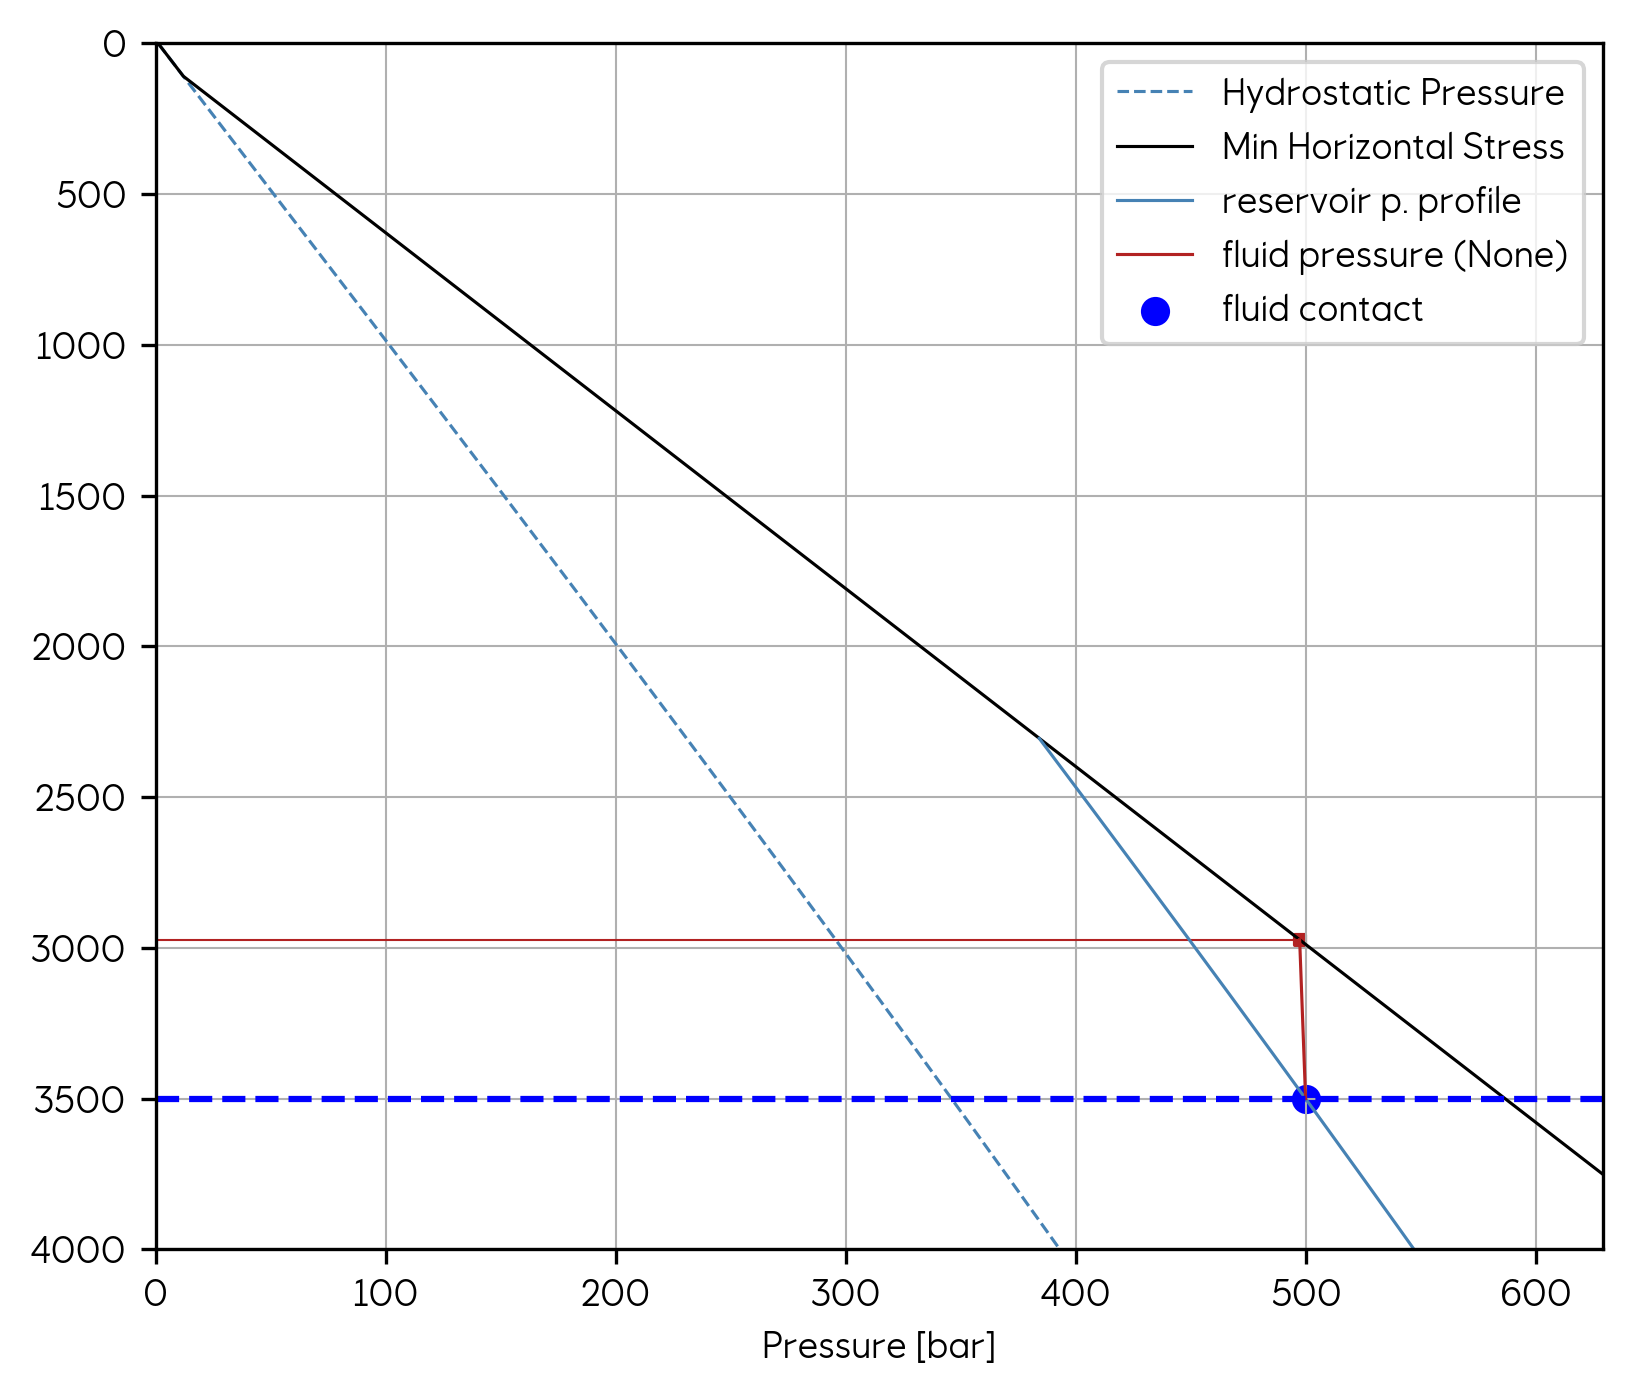

In [55]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

### In Well Builder > Add Data Window

In [56]:
field_fluid_type = 'pure_co2'
field_pressure_value = 500
field_depth_value = 3500

reservoir_pressure_values = [-25, 25, 50]

In [57]:
my_pressure = Pressure(sf_depth_msl=109,  # wellbore seafloor depth mTVD MSL. 
                       well_td_rkb=6648,  # wellbore td in mTVD RKB
                       well_rkb=62.8,     # wellbore rkb in mTVD RKB
                       sf_temp=4,         # seafloor temperature in degC
                       geo_tgrad=40,      # geothermal gradient in degC/km
                       fluid_type=field_fluid_type,  # fluid type name, should match the filename in the pvt_constants folder
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants', #path to the pvt constants folder
                       z_fluid_contact= field_depth_value, # depth value coming from WINC UI
                       p_fluid_contact= field_pressure_value # pressure value coming from WINC UI
                       ) 

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]
Computing pressure profile for scenario: hydrostatic


In [58]:
for idx, dp_value in enumerate(reservoir_pressure_values):
    print(dp_value)

    my_pressure.add_scenario(f'my_sc{1+idx:.0f}', p_delta=dp_value, z_fluid_contact= my_pressure.z_fluid_contact,   from_resrvr = True)

-25
Computing pressure profile for scenario: my_sc1
25
Computing pressure profile for scenario: my_sc2
50
Computing pressure profile for scenario: my_sc3


In [59]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD  z_MSAD_brine  \
0  hydrostatic         True  2651.074549  442.862511   2304.557396   
1       my_sc1         True  2390.296972  398.660712   1951.607597   
2       my_sc2         True  2905.160057  485.930005   2654.858111   
3       my_sc3         True  3150.796581  527.565395   3000.398802   

   p_MSAD_brine  z_resrv  p_resrv  z_fluid_contact  p_fluid_contact  \
0    384.127854     3500      500             3500              500   
1    324.302863     3500      475             3500              475   
2    443.503825     3500      525             3500              525   
3    502.072972     3500      550             3500              550   

      p_delta fluid_type fluid_composition specific_gravity  
0  153.949936   pure_co2          100% CO2             None  
1  128.949936   pure_co2          100% CO2             None  
2  178.949936   pure_co2          100% CO2             None  
3  203.949936   pure_co2          100% CO2             None

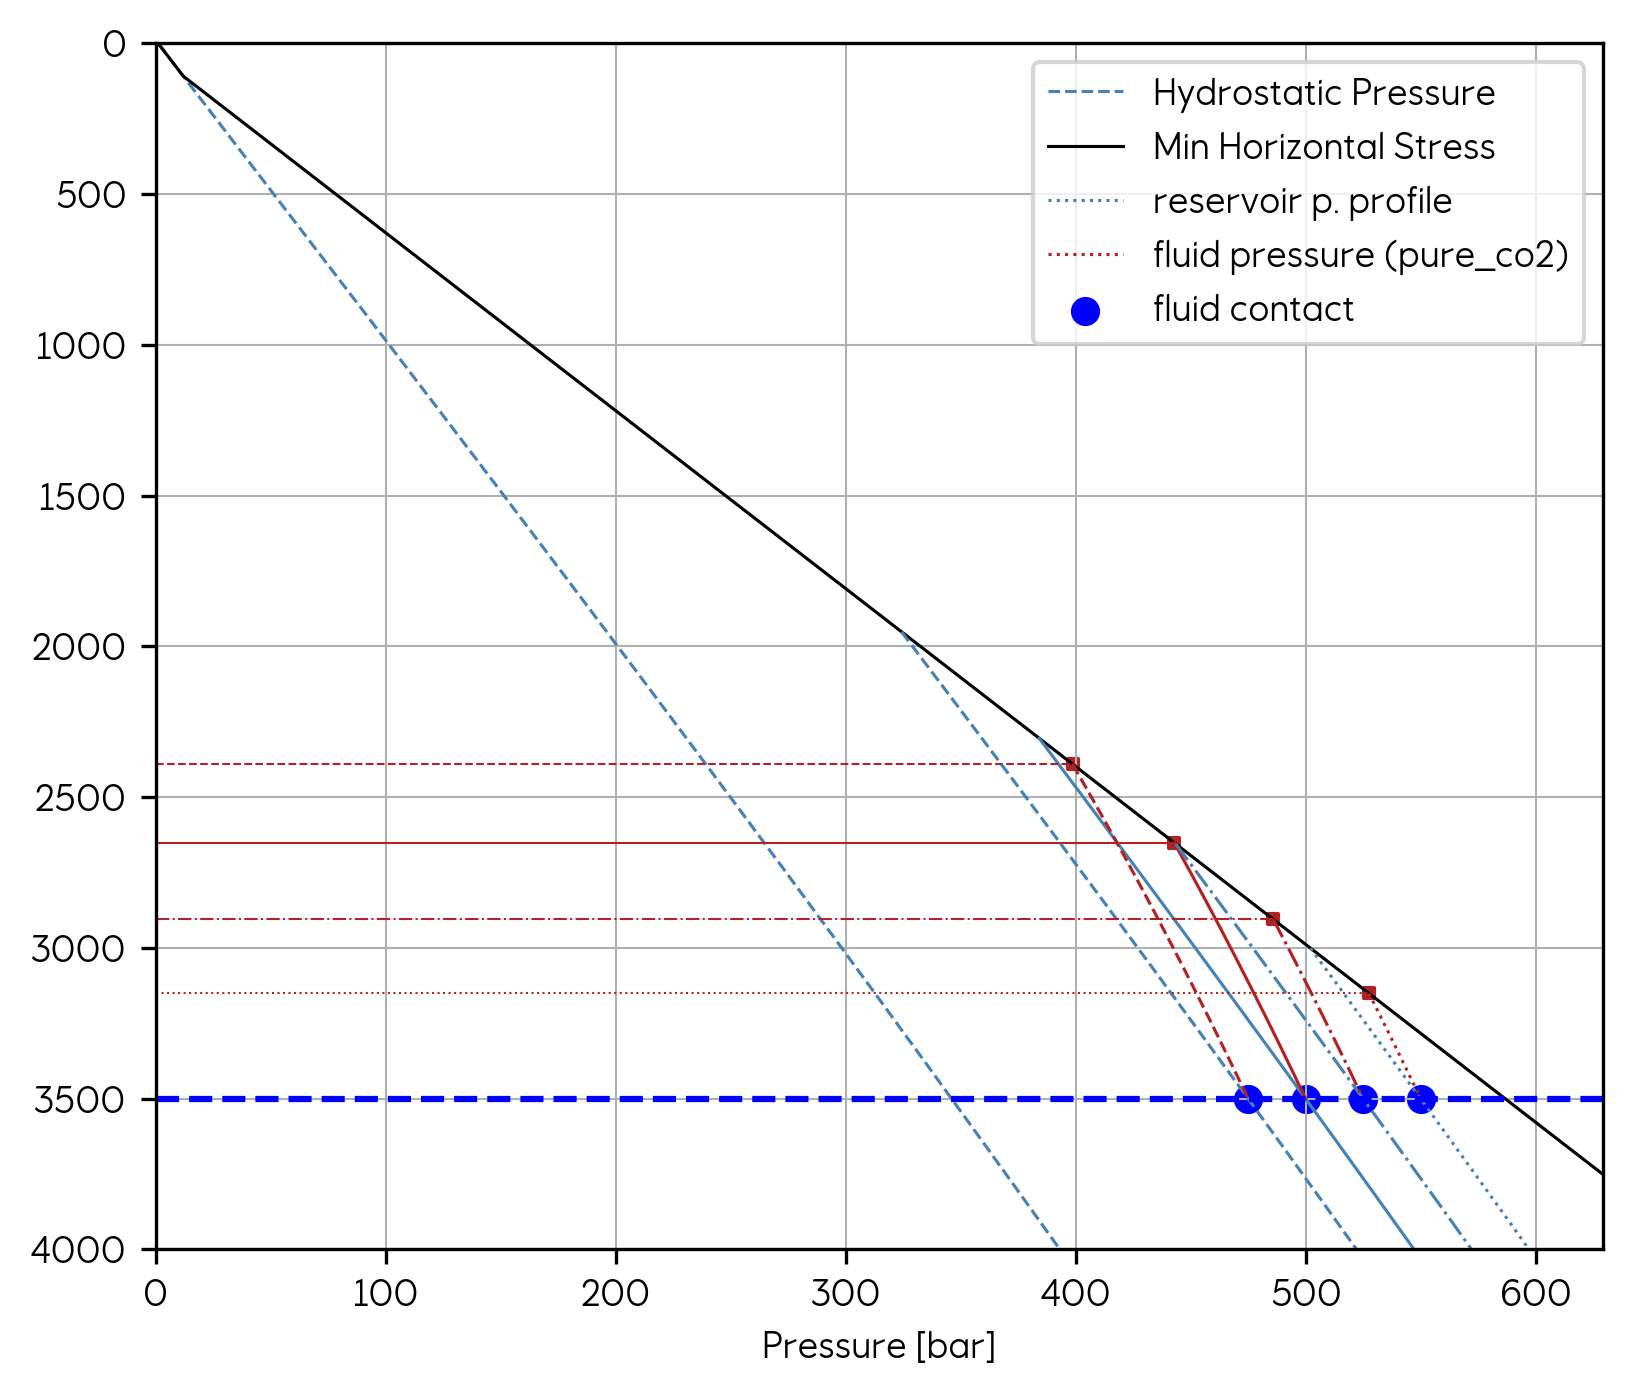

In [60]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

## Retrieving data for plotting

1. Retrieving control points

In [61]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD  z_MSAD_brine  \
0  hydrostatic         True  2651.074549  442.862511   2304.557396   
1       my_sc1         True  2390.296972  398.660712   1951.607597   
2       my_sc2         True  2905.160057  485.930005   2654.858111   
3       my_sc3         True  3150.796581  527.565395   3000.398802   

   p_MSAD_brine  z_resrv  p_resrv  z_fluid_contact  p_fluid_contact  \
0    384.127854     3500      500             3500              500   
1    324.302863     3500      475             3500              475   
2    443.503825     3500      525             3500              525   
3    502.072972     3500      550             3500              550   

      p_delta fluid_type fluid_composition specific_gravity  
0  153.949936   pure_co2          100% CO2             None  
1  128.949936   pure_co2          100% CO2             None  
2  178.949936   pure_co2          100% CO2             None  
3  203.949936   pure_co2          100% CO2             None

2. Retrieving curves for my_sc2

In [62]:
sc_name = 'my_sc2'

my_pressure.scenario_manager.scenarios[sc_name].init_curves

depth  temperature  hydrostatic_pressure  min_horizontal_stress  \
0.0        0.0         4.00              1.013250               1.013250   
1.0        1.0         4.00              1.113844               1.113844   
2.0        2.0         4.00              1.214438               1.214438   
3.0        3.0         4.00              1.315033               1.315033   
4.0        4.0         4.00              1.415628               1.415628   
...        ...          ...                   ...                    ...   
7080.0  7080.0       282.84            661.883399            1193.565375   
7081.0  7081.0       282.88            661.963265            1193.734875   
7082.0  7082.0       282.92            662.043125            1193.904375   
7083.0  7083.0       282.96            662.122980            1194.073875   
7084.0  7084.0       283.00            662.202829            1194.243375   

        fluid_pressure  brine_pressure  
0.0                NaN             NaN  
1.0                NaN             NaN  
2.0                NaN             NaN  
3.0                NaN             NaN  
4.0                NaN             NaN  
...                ...             ...  
7080.0             NaN      840.966820  
7081.0             NaN      841.046686  
7082.0             NaN      841.126546  
7083.0             NaN      841.206401  
7084.0             NaN      841.286250  

[7086 rows x 6 columns]

## Example 1: Minimum input (only fluid contact)

In [63]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3500.)

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]
Computing pressure profile for scenario: hydrostatic


In [64]:
my_pressure.scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD z_MSAD_brine  \
0  hydrostatic         True  1183.153273  194.049855         None   

  p_MSAD_brine  z_resrv     p_resrv  z_fluid_contact  p_fluid_contact  \
0         None   3500.0  346.050064           3500.0       346.050064   

   p_delta fluid_type fluid_composition specific_gravity  
0      0.0   pure_co2          100% CO2             None

In [65]:
my_pressure.add_scenario('methane', fluid_type='methane', from_resrvr=True, z_fluid_contact=my_pressure.z_fluid_contact)
my_pressure.add_scenario('other', from_resrvr=True, z_fluid_contact=my_pressure.z_fluid_contact, p_delta=50, specific_gravity=0.05)

Computing pressure profile for scenario: methane
Computing pressure profile for scenario: other


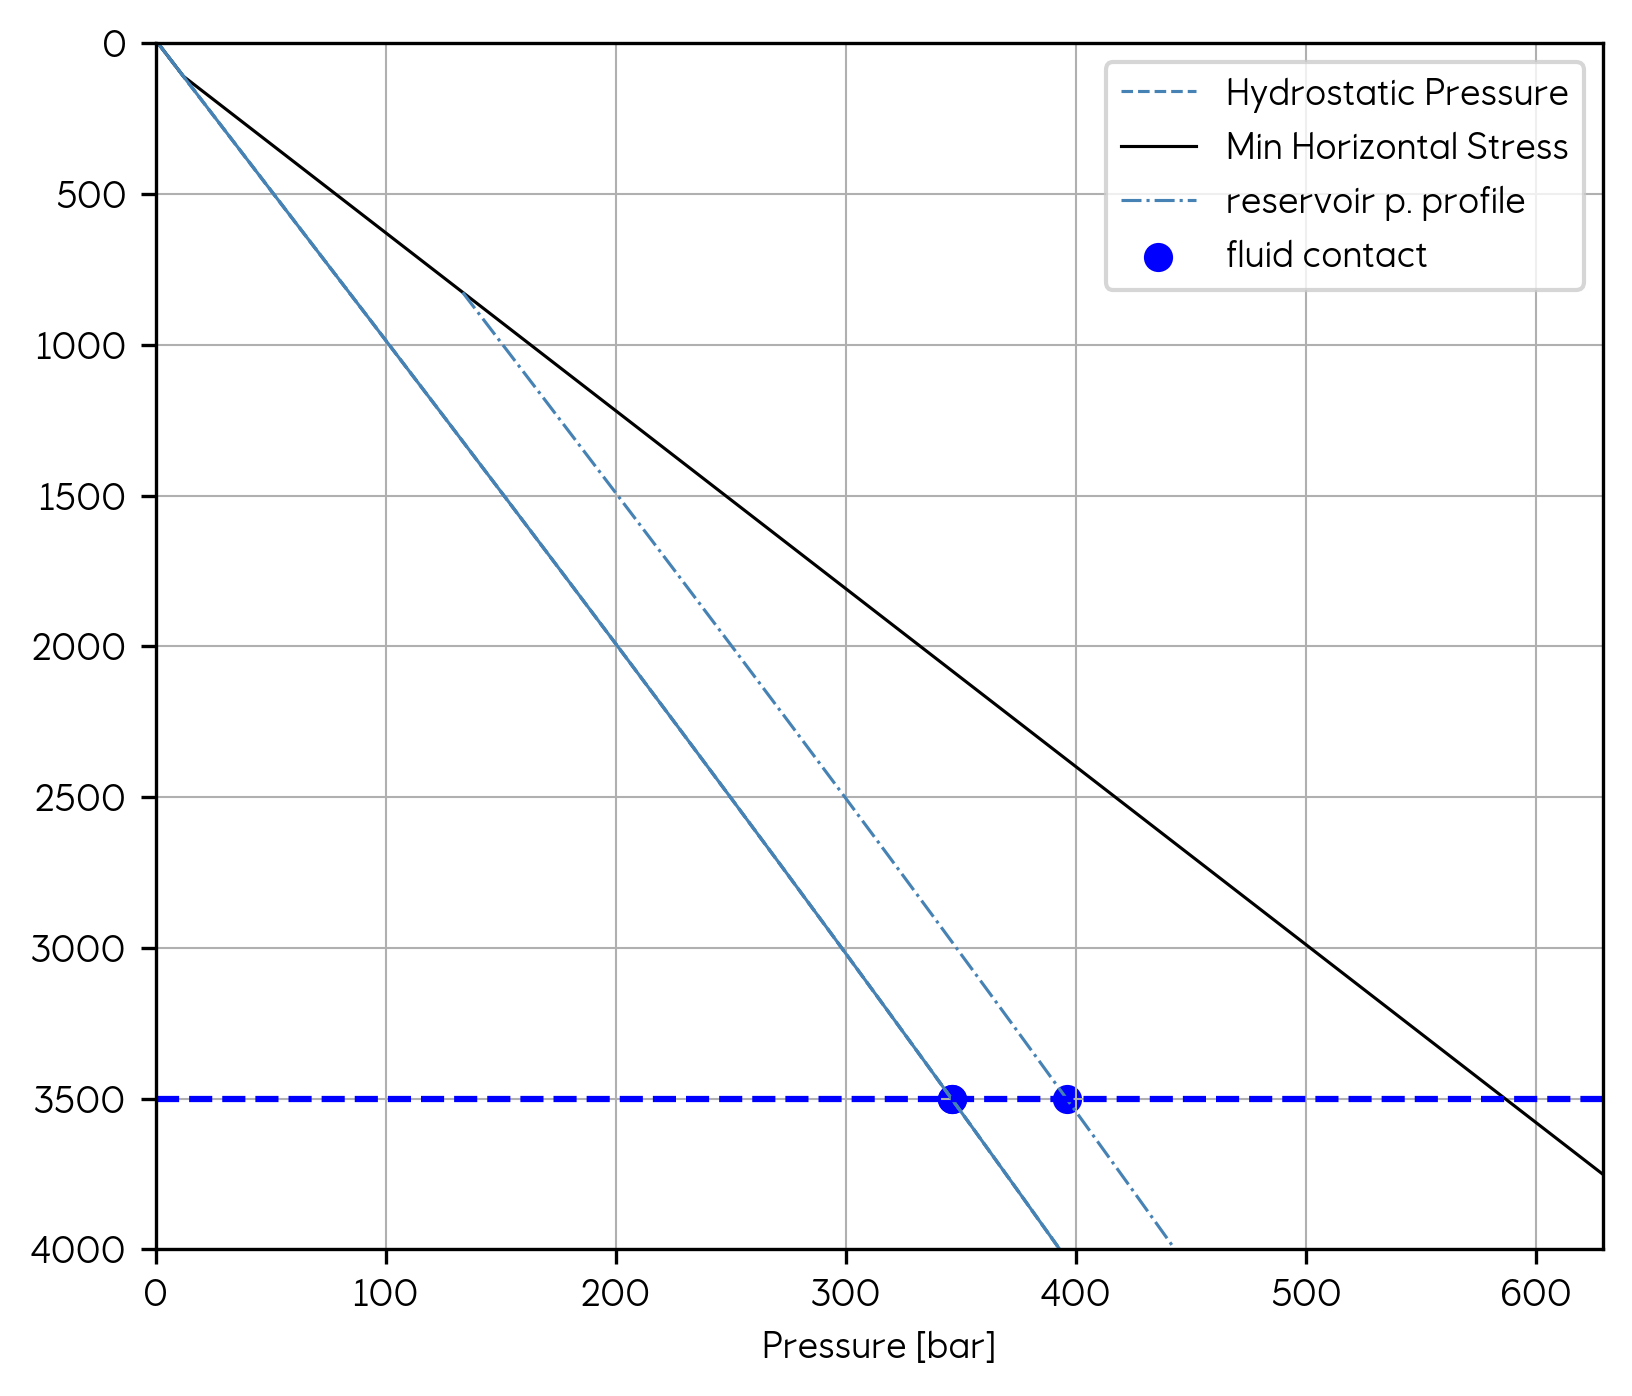

In [66]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

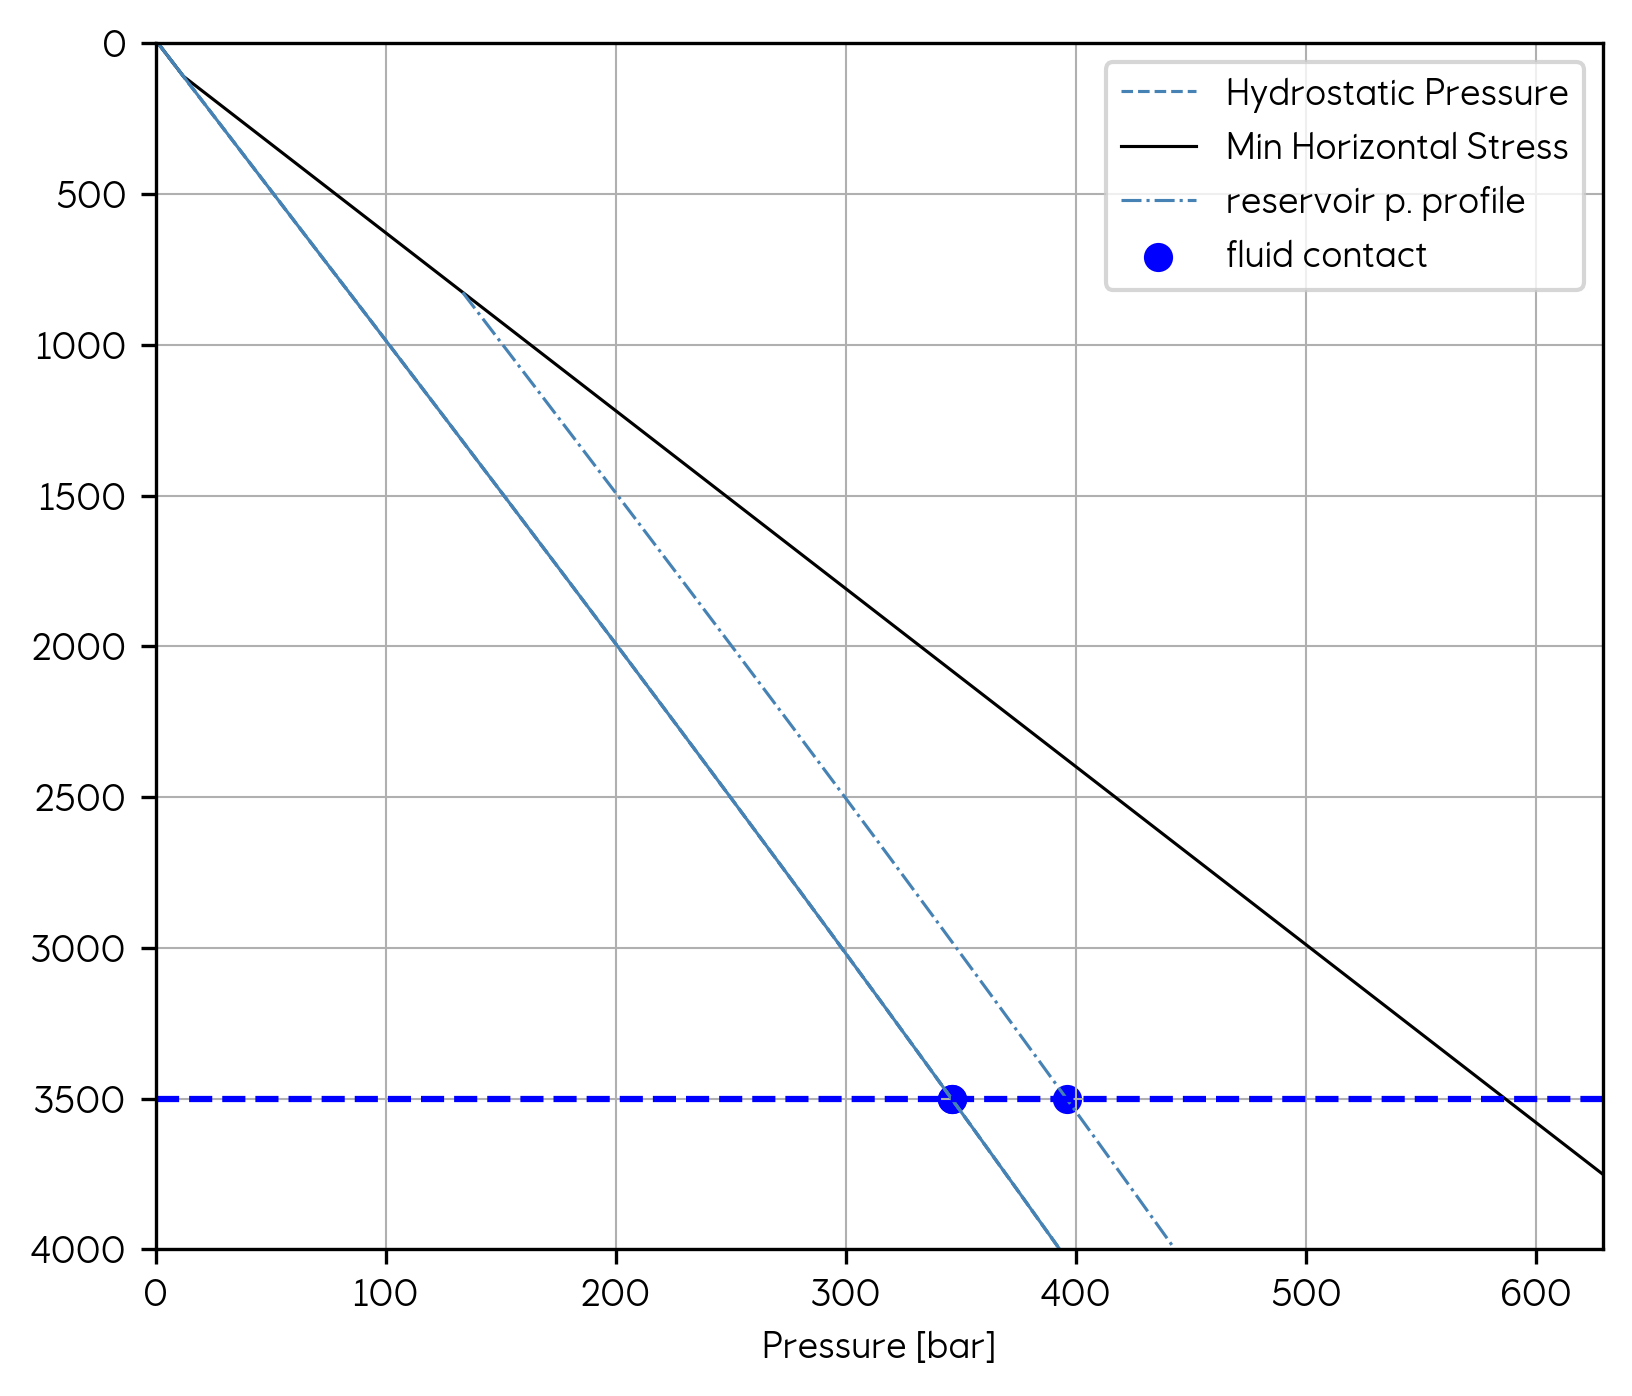

In [67]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

In [68]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD  z_MSAD_brine  \
0  hydrostatic         True  1183.153273  194.049855           NaN   
1      methane         True  1931.323178  320.864654           NaN   
2        other         True  2341.378106  390.368964    825.113368   

   p_MSAD_brine  z_resrv     p_resrv  z_fluid_contact  p_fluid_contact  \
0           NaN   3500.0  346.050064           3500.0       346.050064   
1           NaN   3500.0  346.050064           3500.0       346.050064   
2    133.362091   3500.0  396.050064           3500.0       396.050064   

   p_delta fluid_type fluid_composition  specific_gravity  
0      0.0   pure_co2          100% CO2               NaN  
1      0.0    methane          100% CH4               NaN  
2     50.0       None              None              0.05

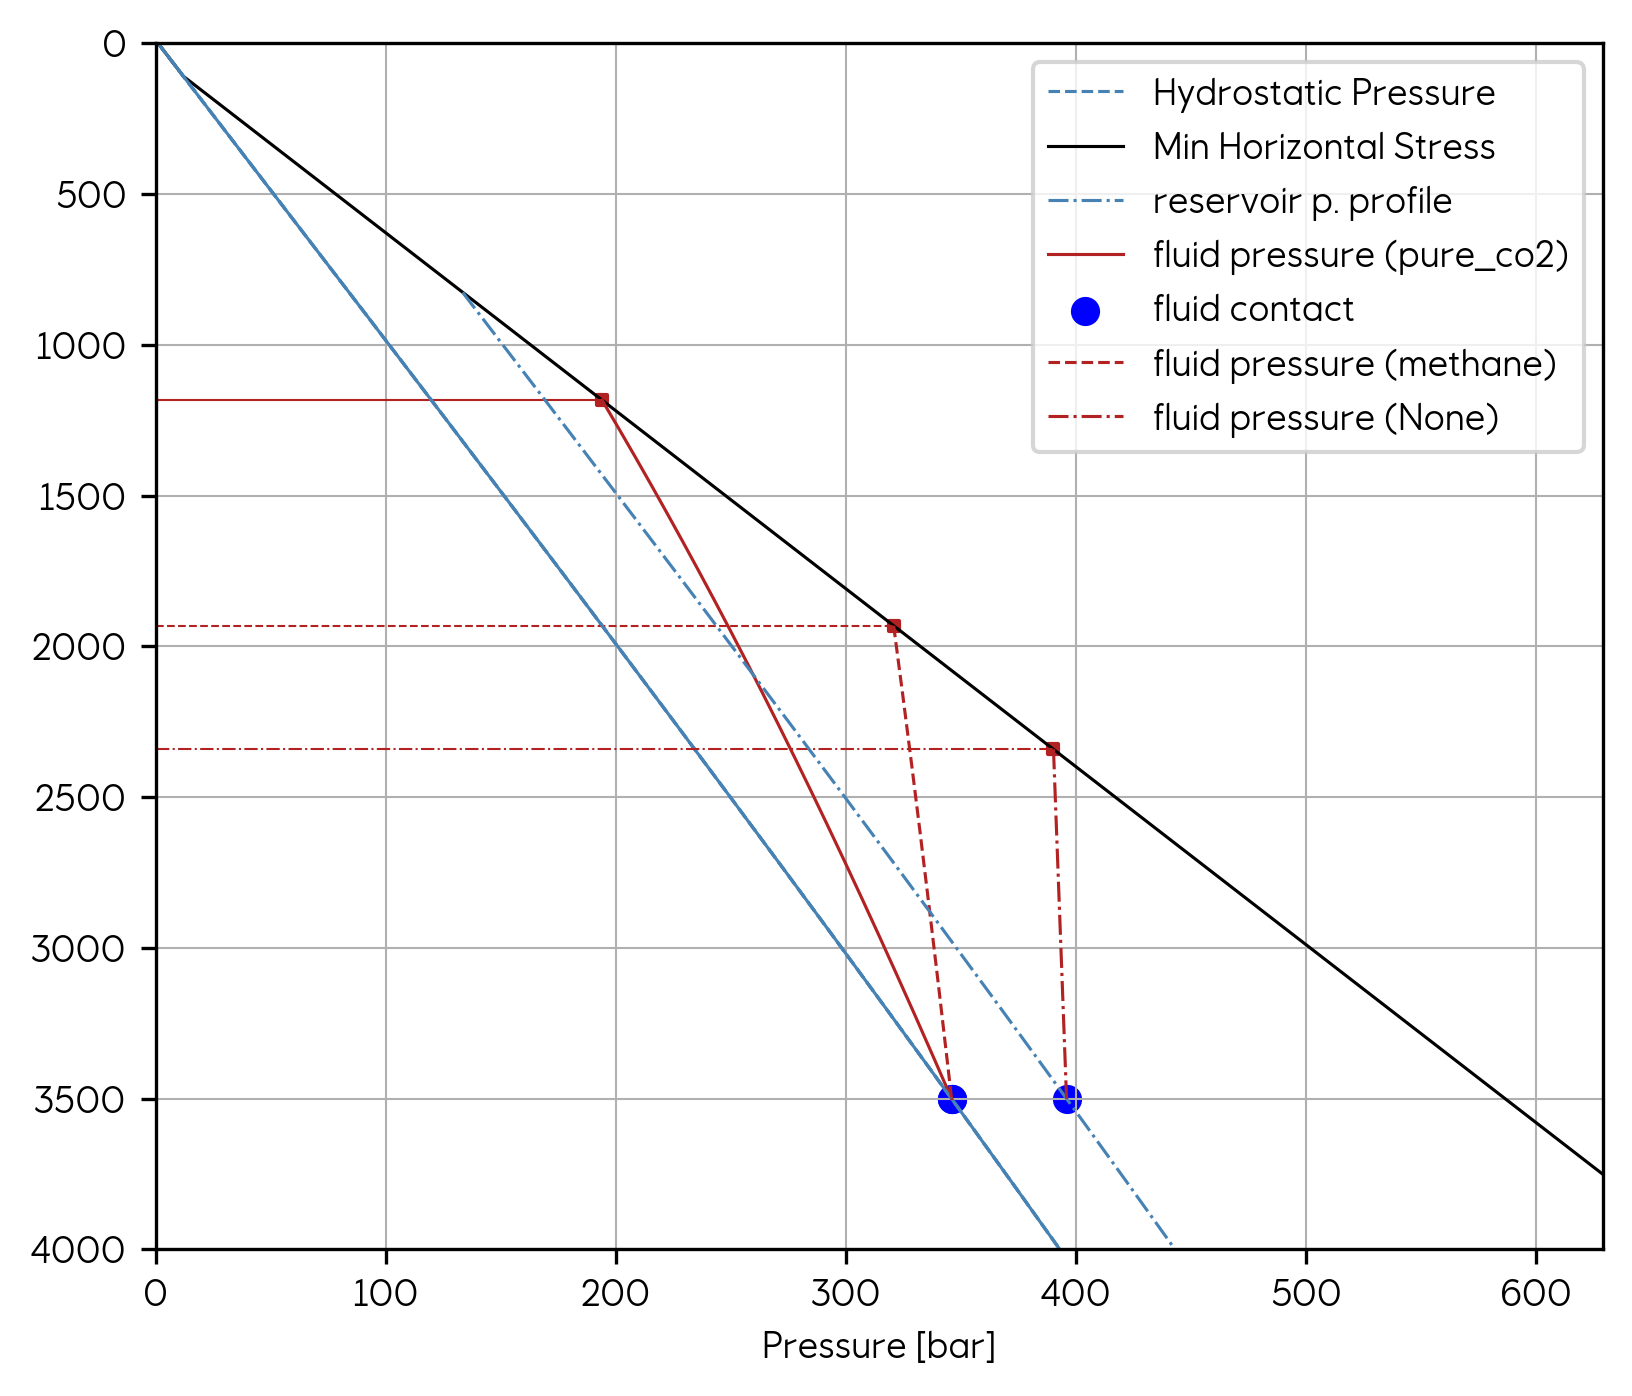

In [69]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)

fig.tight_layout()


## Example 2: Fluid contact + Delta P

In [70]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3700.)

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]
Computing pressure profile for scenario: hydrostatic


In [71]:
my_pressure.add_scenario('pure_co2', fluid_type='pure_co2', from_resrvr=True, z_fluid_contact=3500, p_delta=50)

Computing pressure profile for scenario: pure_co2


In [72]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD  z_MSAD_brine  \
0  hydrostatic         True  1244.659542  204.475167           NaN   
1     pure_co2         True  1611.710560  266.690315    825.113368   

   p_MSAD_brine  z_resrv     p_resrv  z_fluid_contact  p_fluid_contact  \
0           NaN   3700.0  364.972424           3700.0       364.972424   
1    133.362091   3500.0  396.050064           3500.0       396.050064   

   p_delta fluid_type fluid_composition specific_gravity  
0      0.0   pure_co2          100% CO2             None  
1     50.0   pure_co2          100% CO2             None

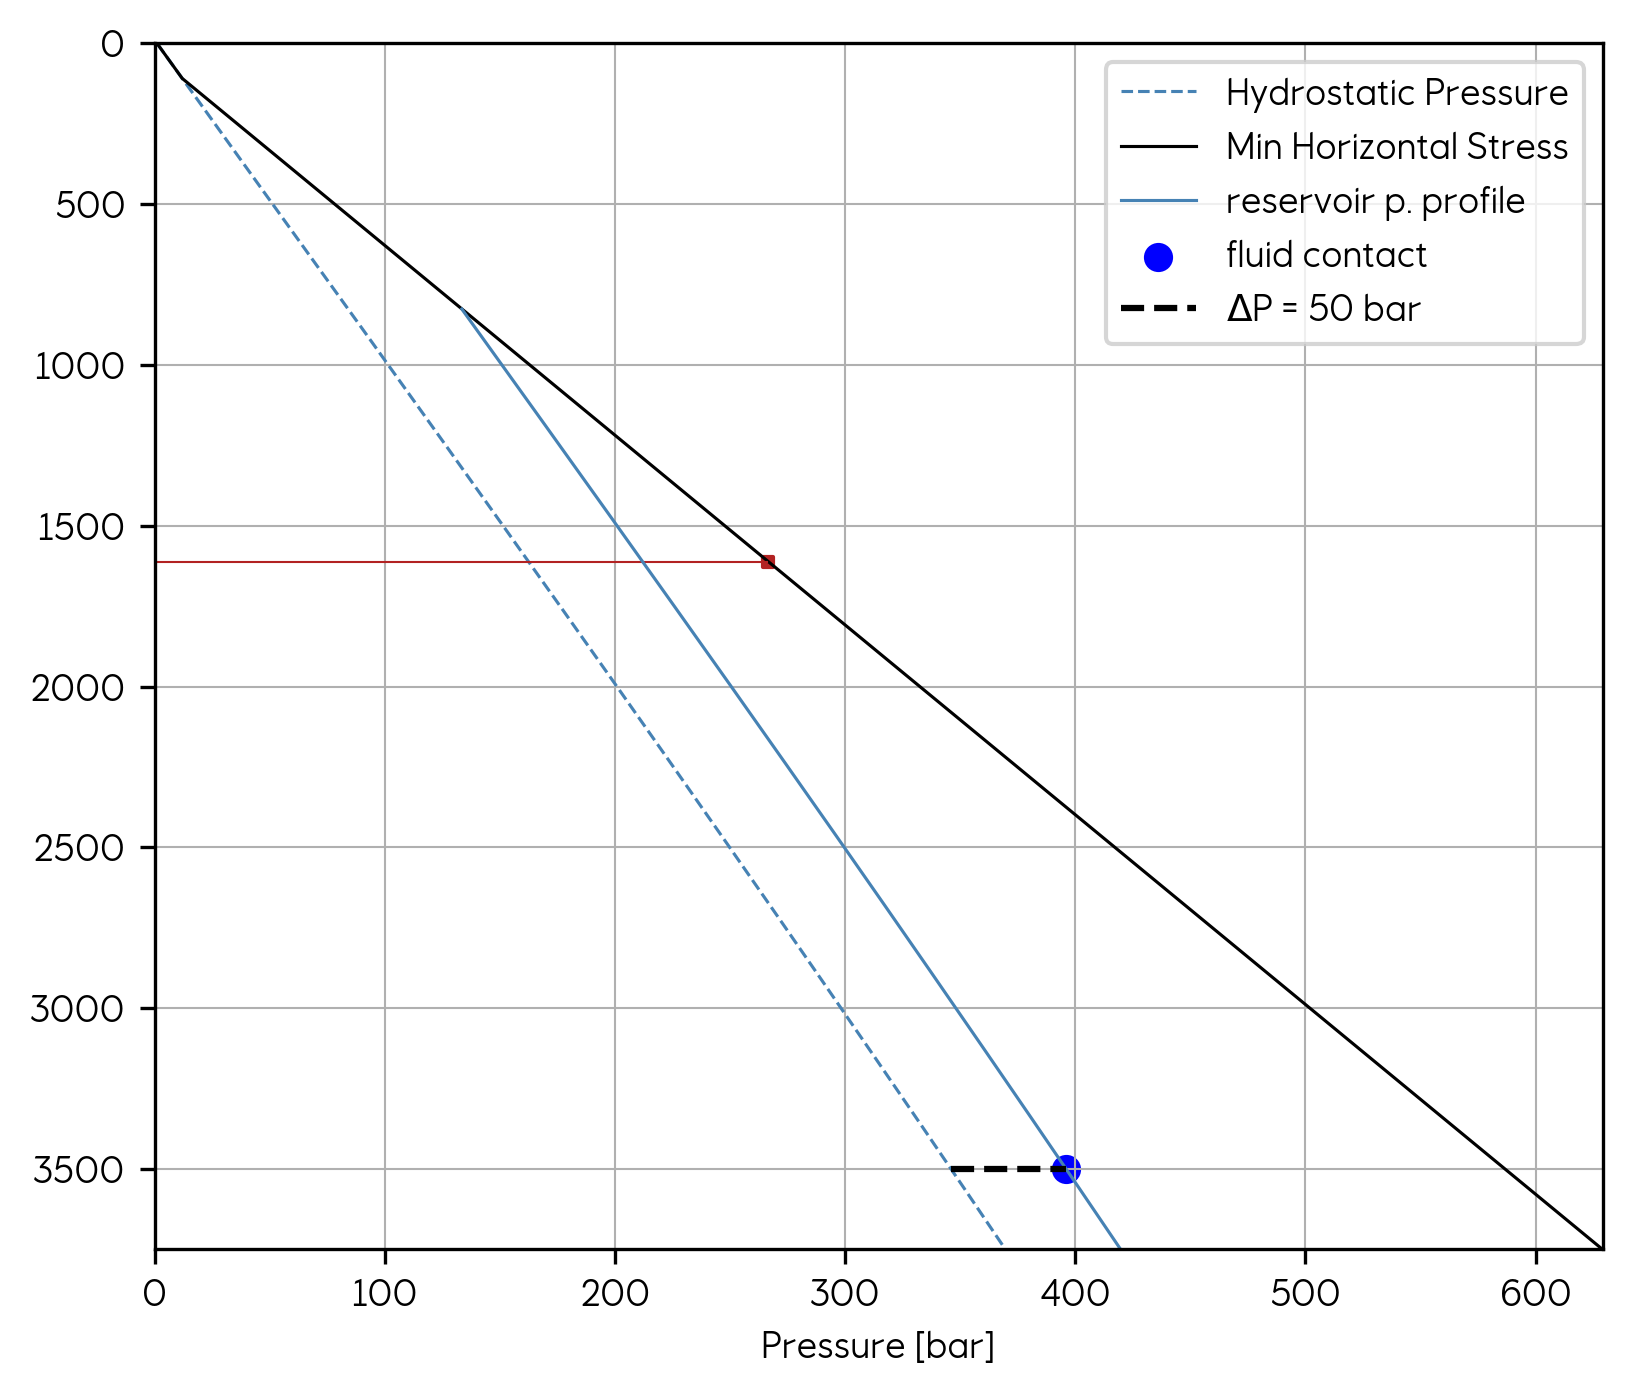

In [73]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,
              plot_selected_scenarios=['pure_co2'])



fig.tight_layout()


## Example 3: Reservoir Pressure

In [74]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]


In [75]:
my_pressure.add_scenario('pure_co2', fluid_type='pure_co2', from_resrvr=True, z_resrv=3400, p_resrv=380)  

Computing pressure profile for scenario: pure_co2


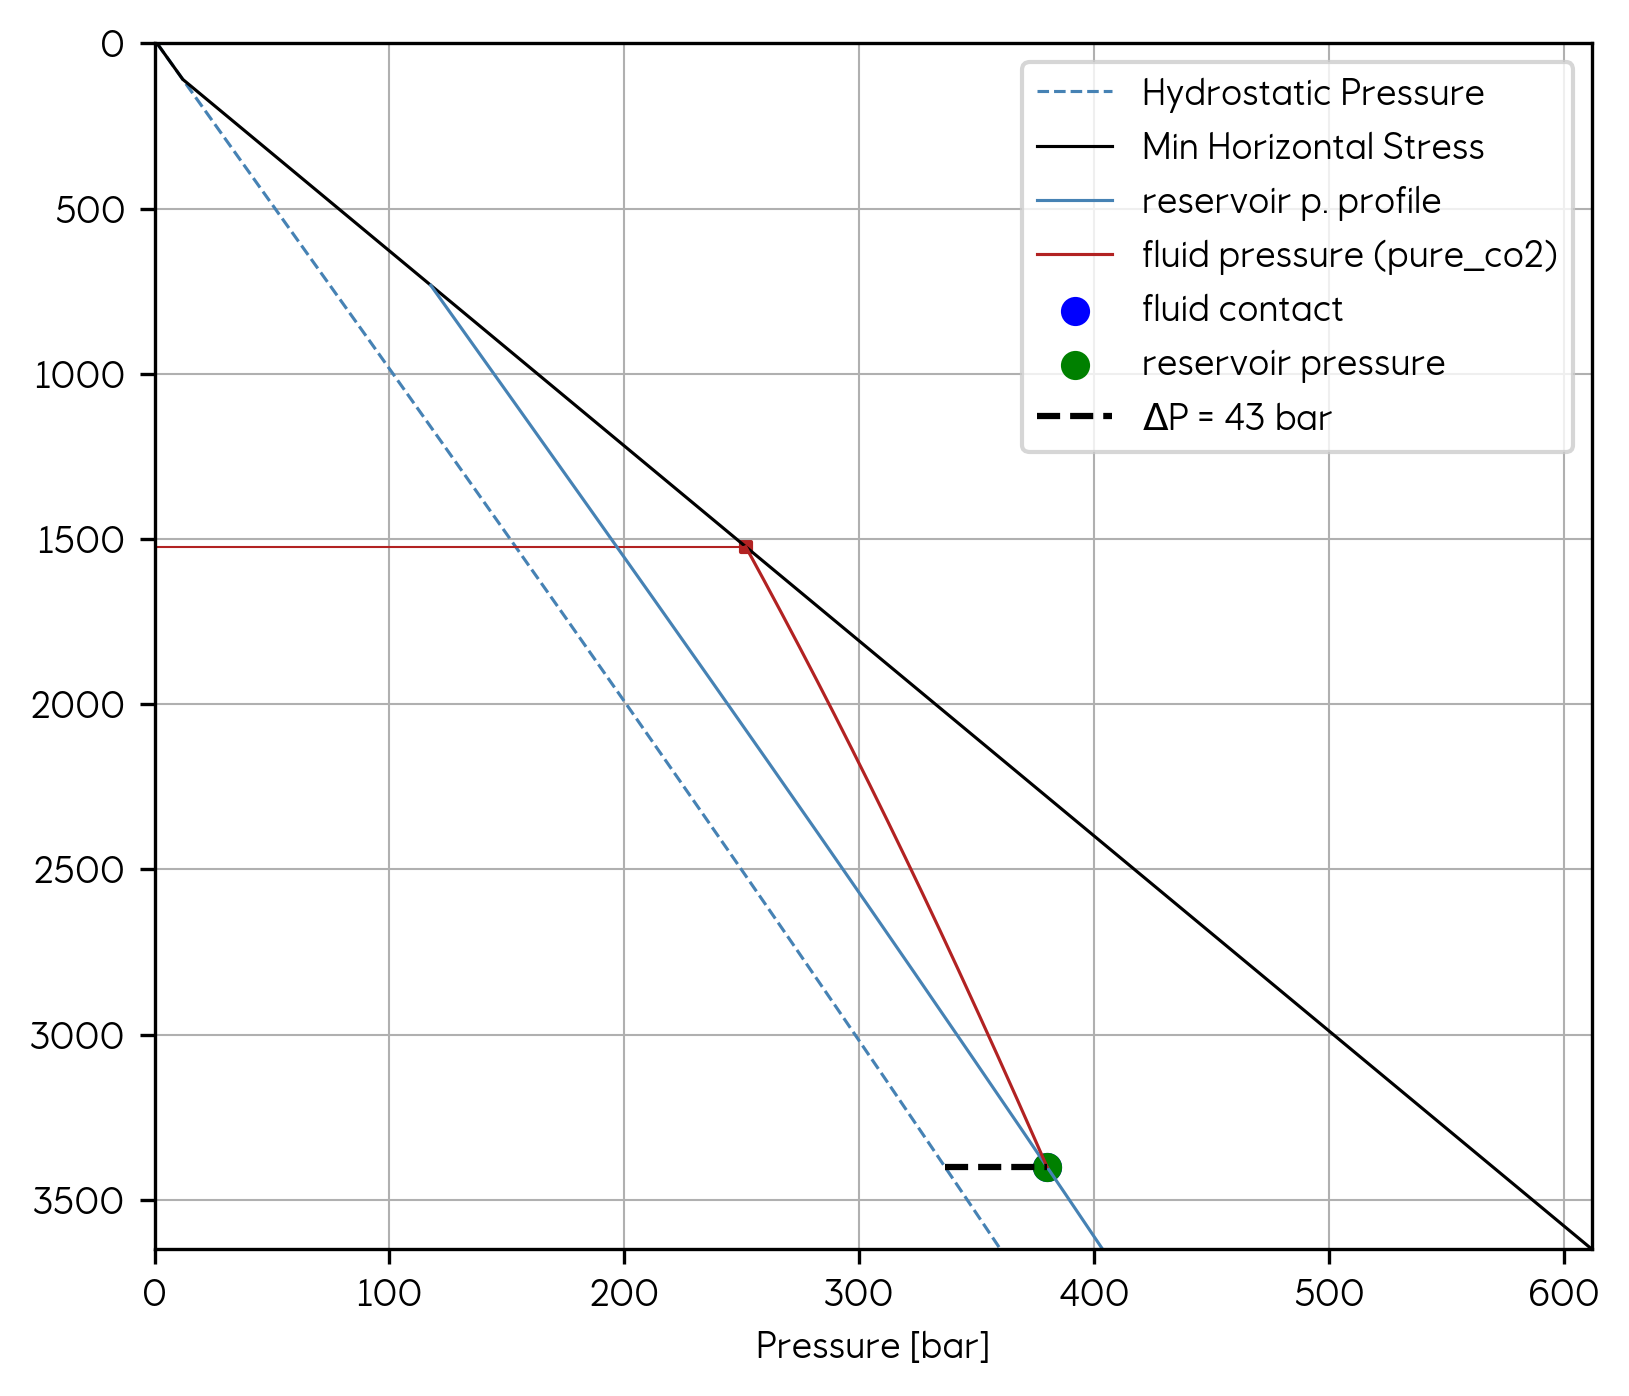

In [76]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)


fig.tight_layout()


## Example 4: Reservoir Pressure + fluid contact


In [77]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]


In [78]:
my_pressure.add_scenario('C1', fluid_type='methane', from_resrvr=True, z_resrv=3100, p_resrv=320, z_fluid_contact=3700)  

Computing pressure profile for scenario: C1


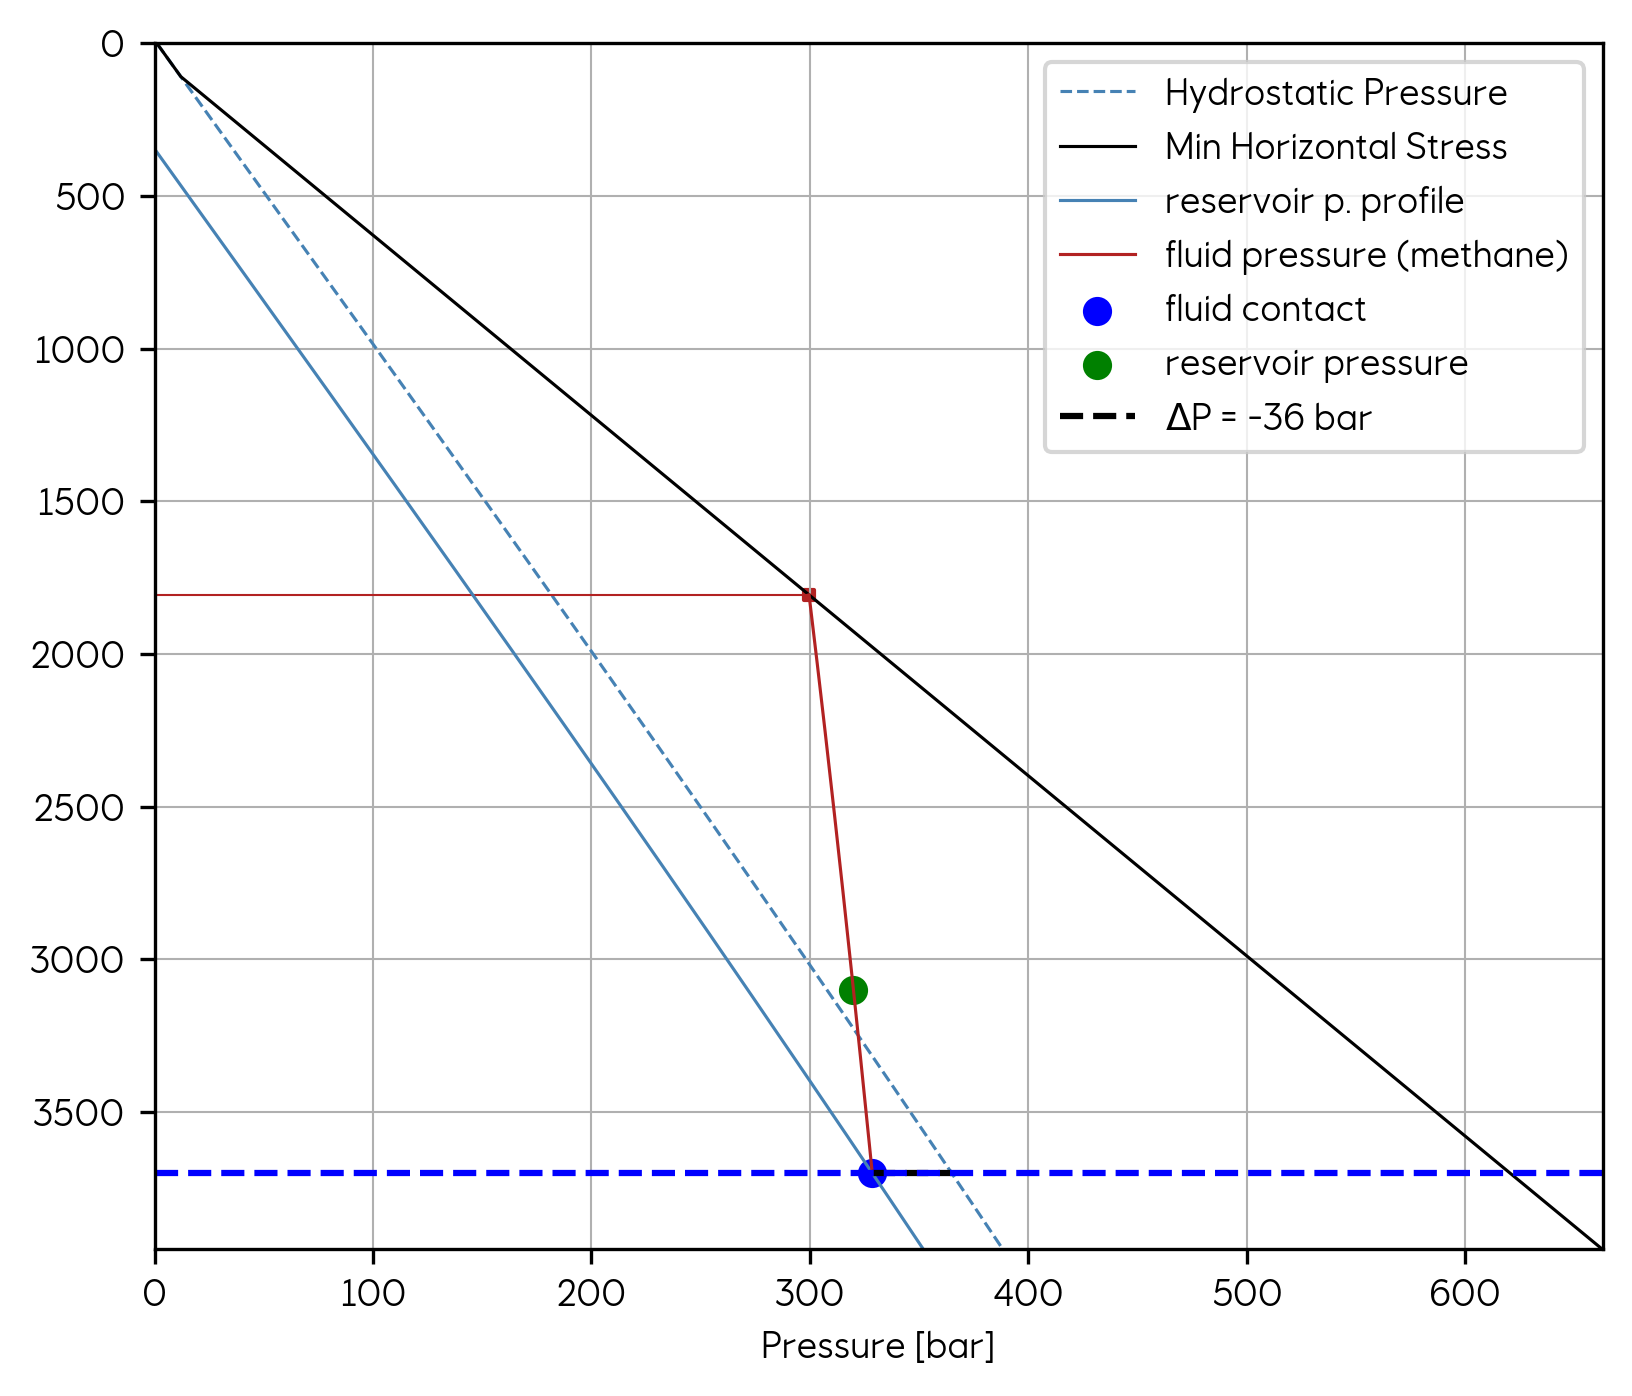

In [79]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 5: Multiple reservoirs


In [80]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]


In [81]:
my_pressure.add_scenario('top r', fluid_type='methane', from_resrvr=True, z_resrv=3000, p_resrv=310, z_fluid_contact=3200)  
my_pressure.add_scenario('bottom r', fluid_type='methane', from_resrvr=True, z_fluid_contact=3700, p_delta=50)  

Computing pressure profile for scenario: top r
Computing pressure profile for scenario: bottom r


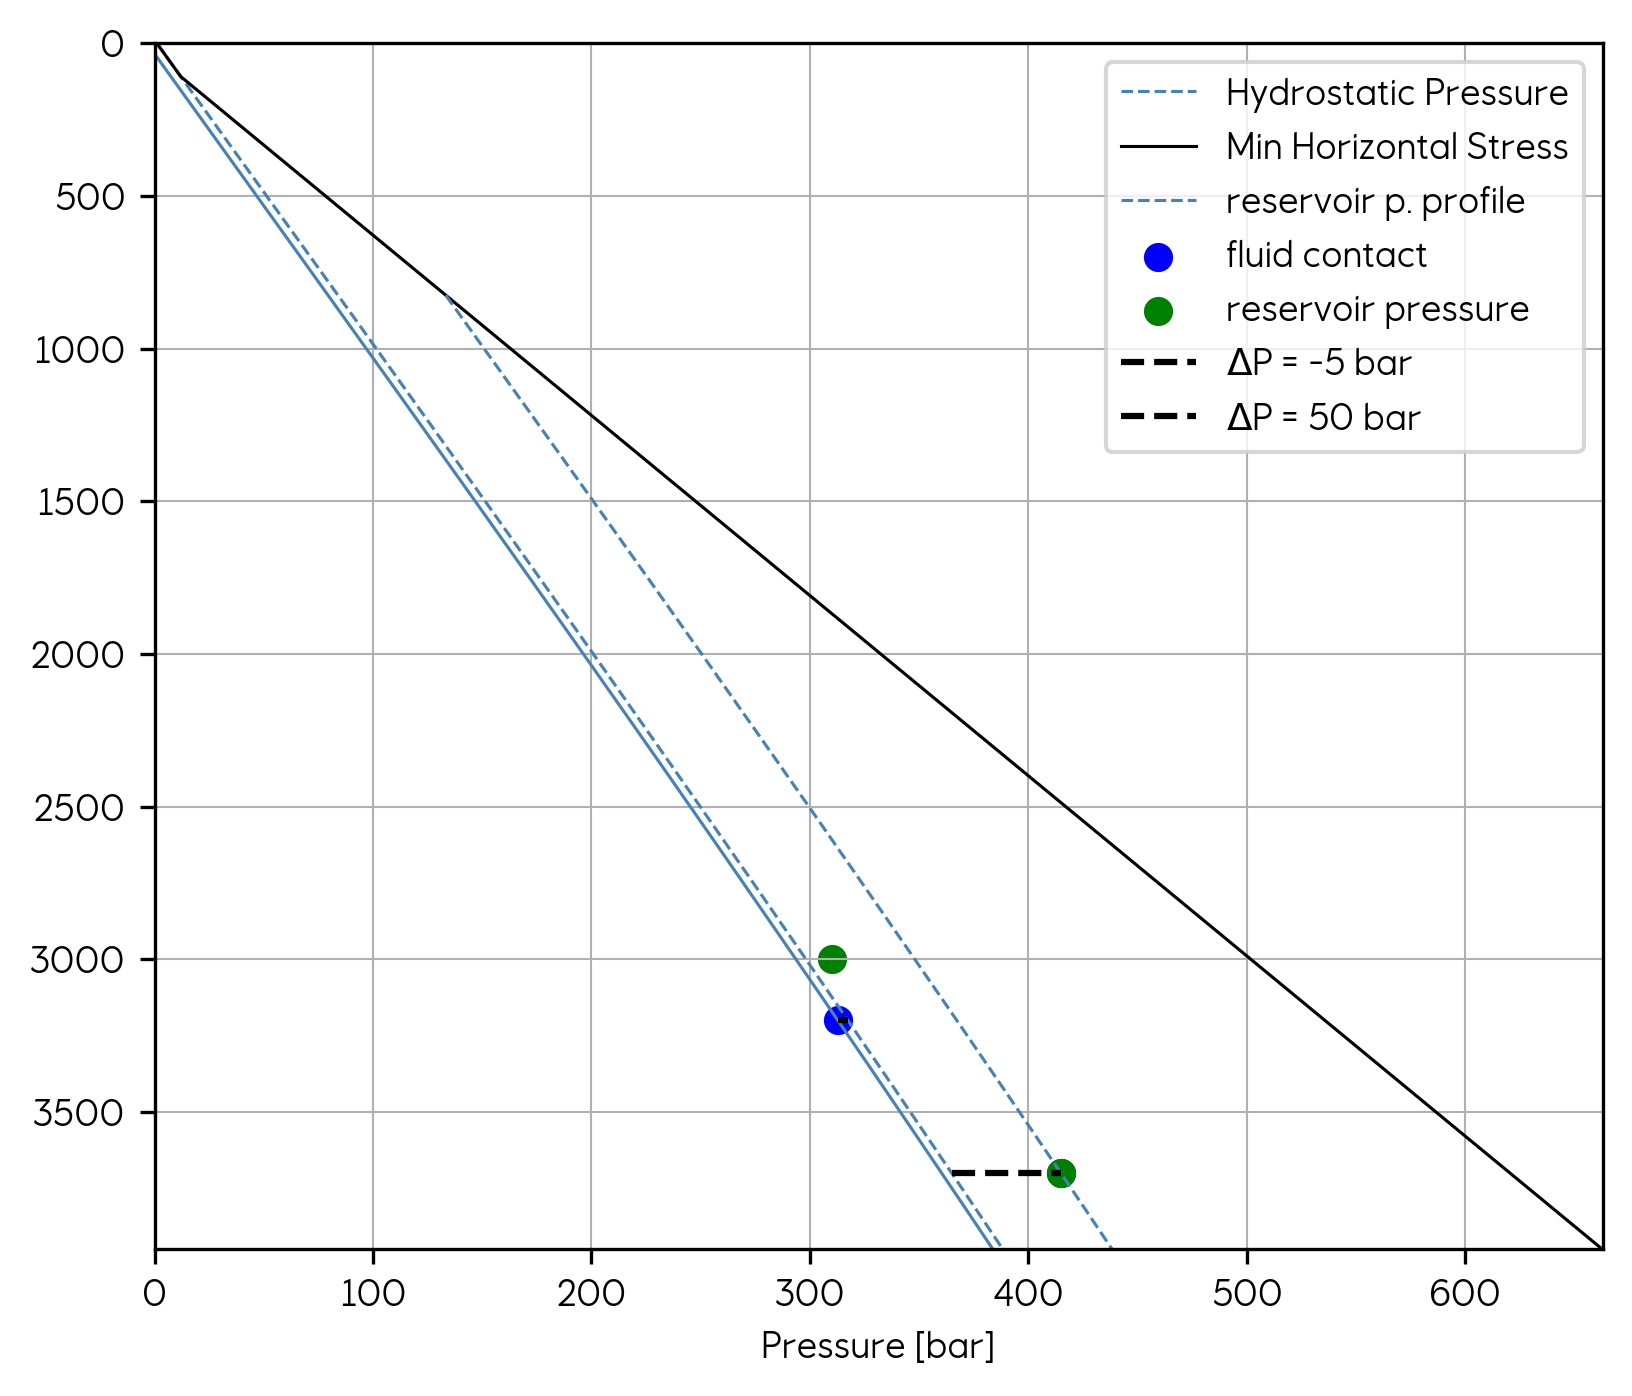

In [82]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,)


fig.tight_layout()


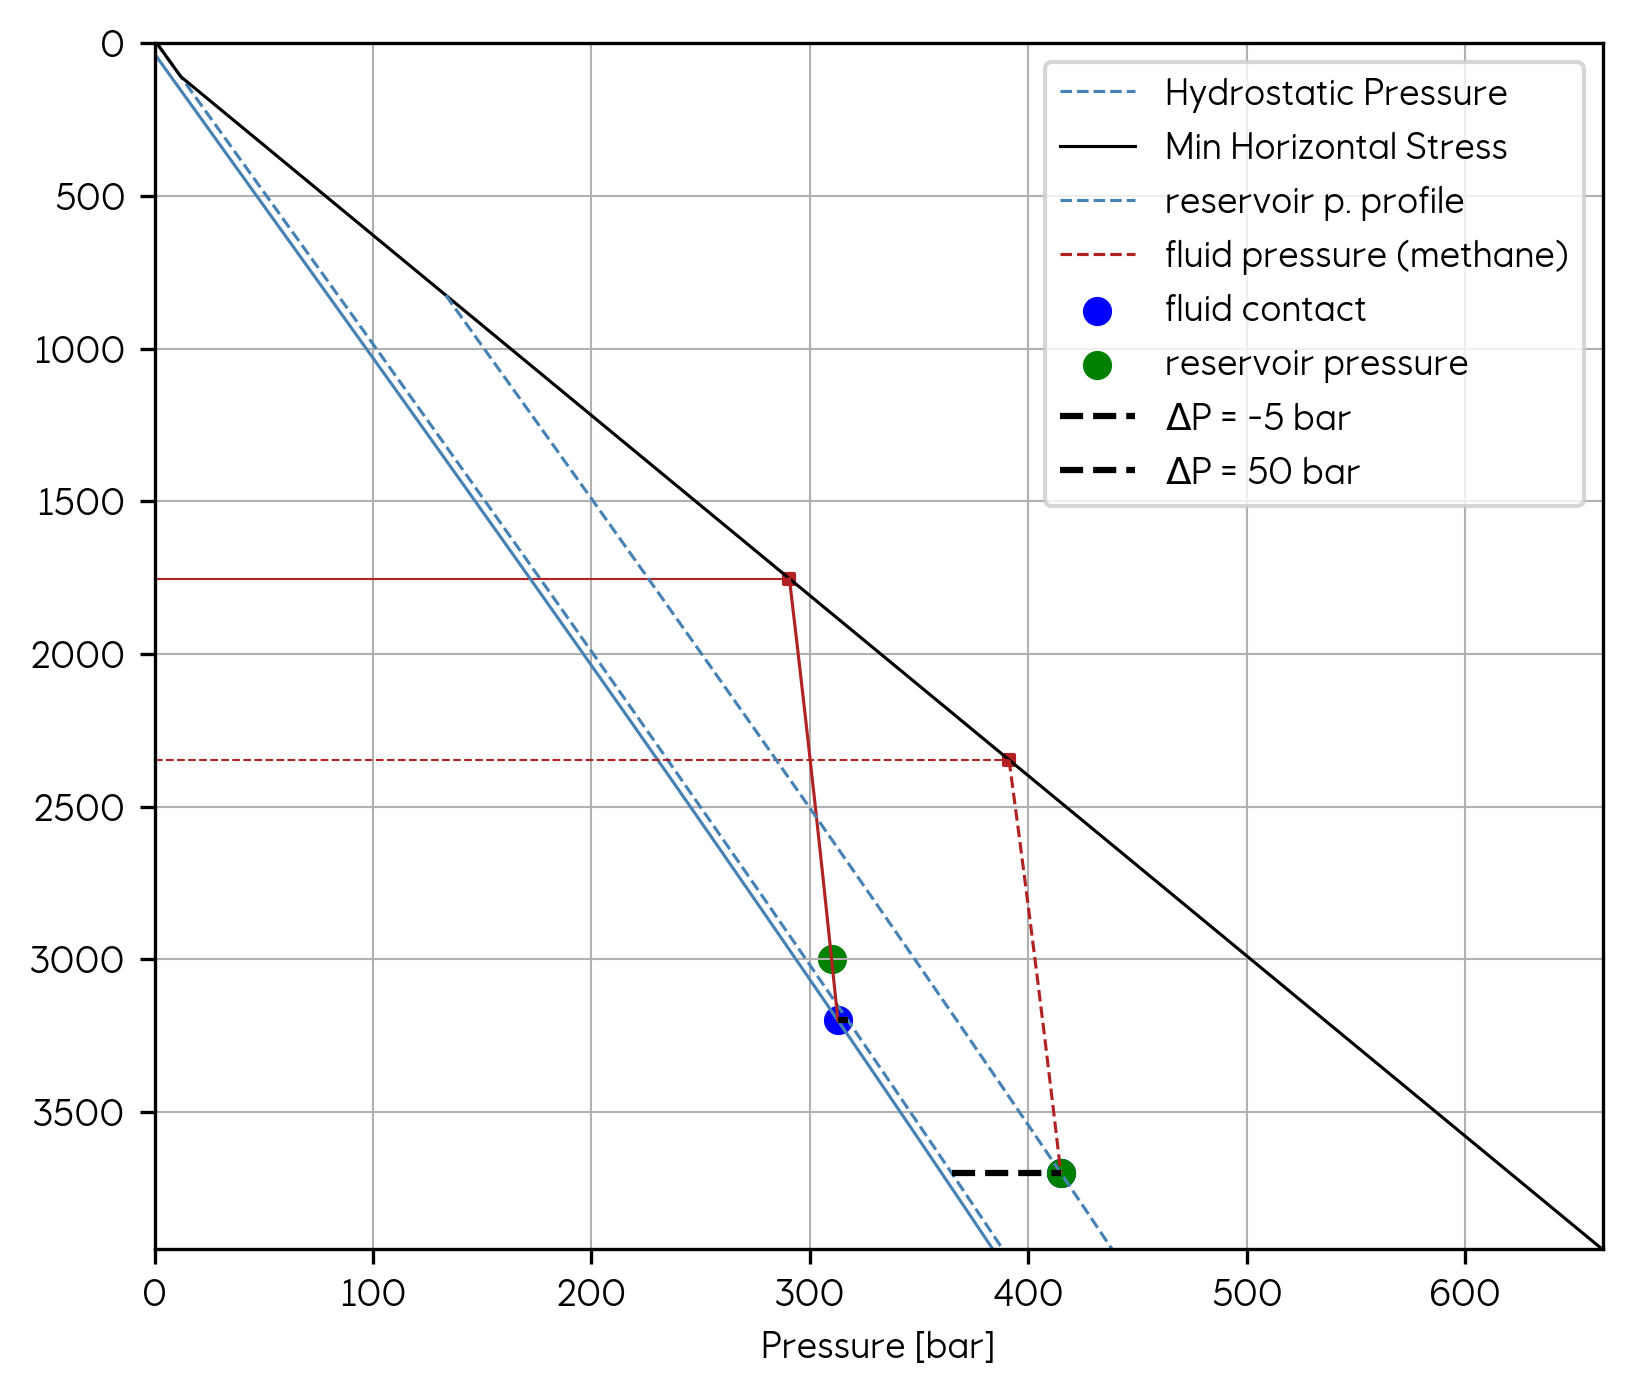

In [83]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 6: Compute pressure profile downwards from MSAD


In [84]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]


In [85]:
my_pressure.add_scenario('Plug1', fluid_type='methane', from_resrvr=False,  z_MSAD=1800, z_fluid_contact=4000)    
my_pressure.add_scenario('Plug2', fluid_type='methane', from_resrvr=False,  z_MSAD=2500, z_fluid_contact=4000)  


Computing pressure profile for scenario: Plug1
Computing pressure profile for scenario: Plug2


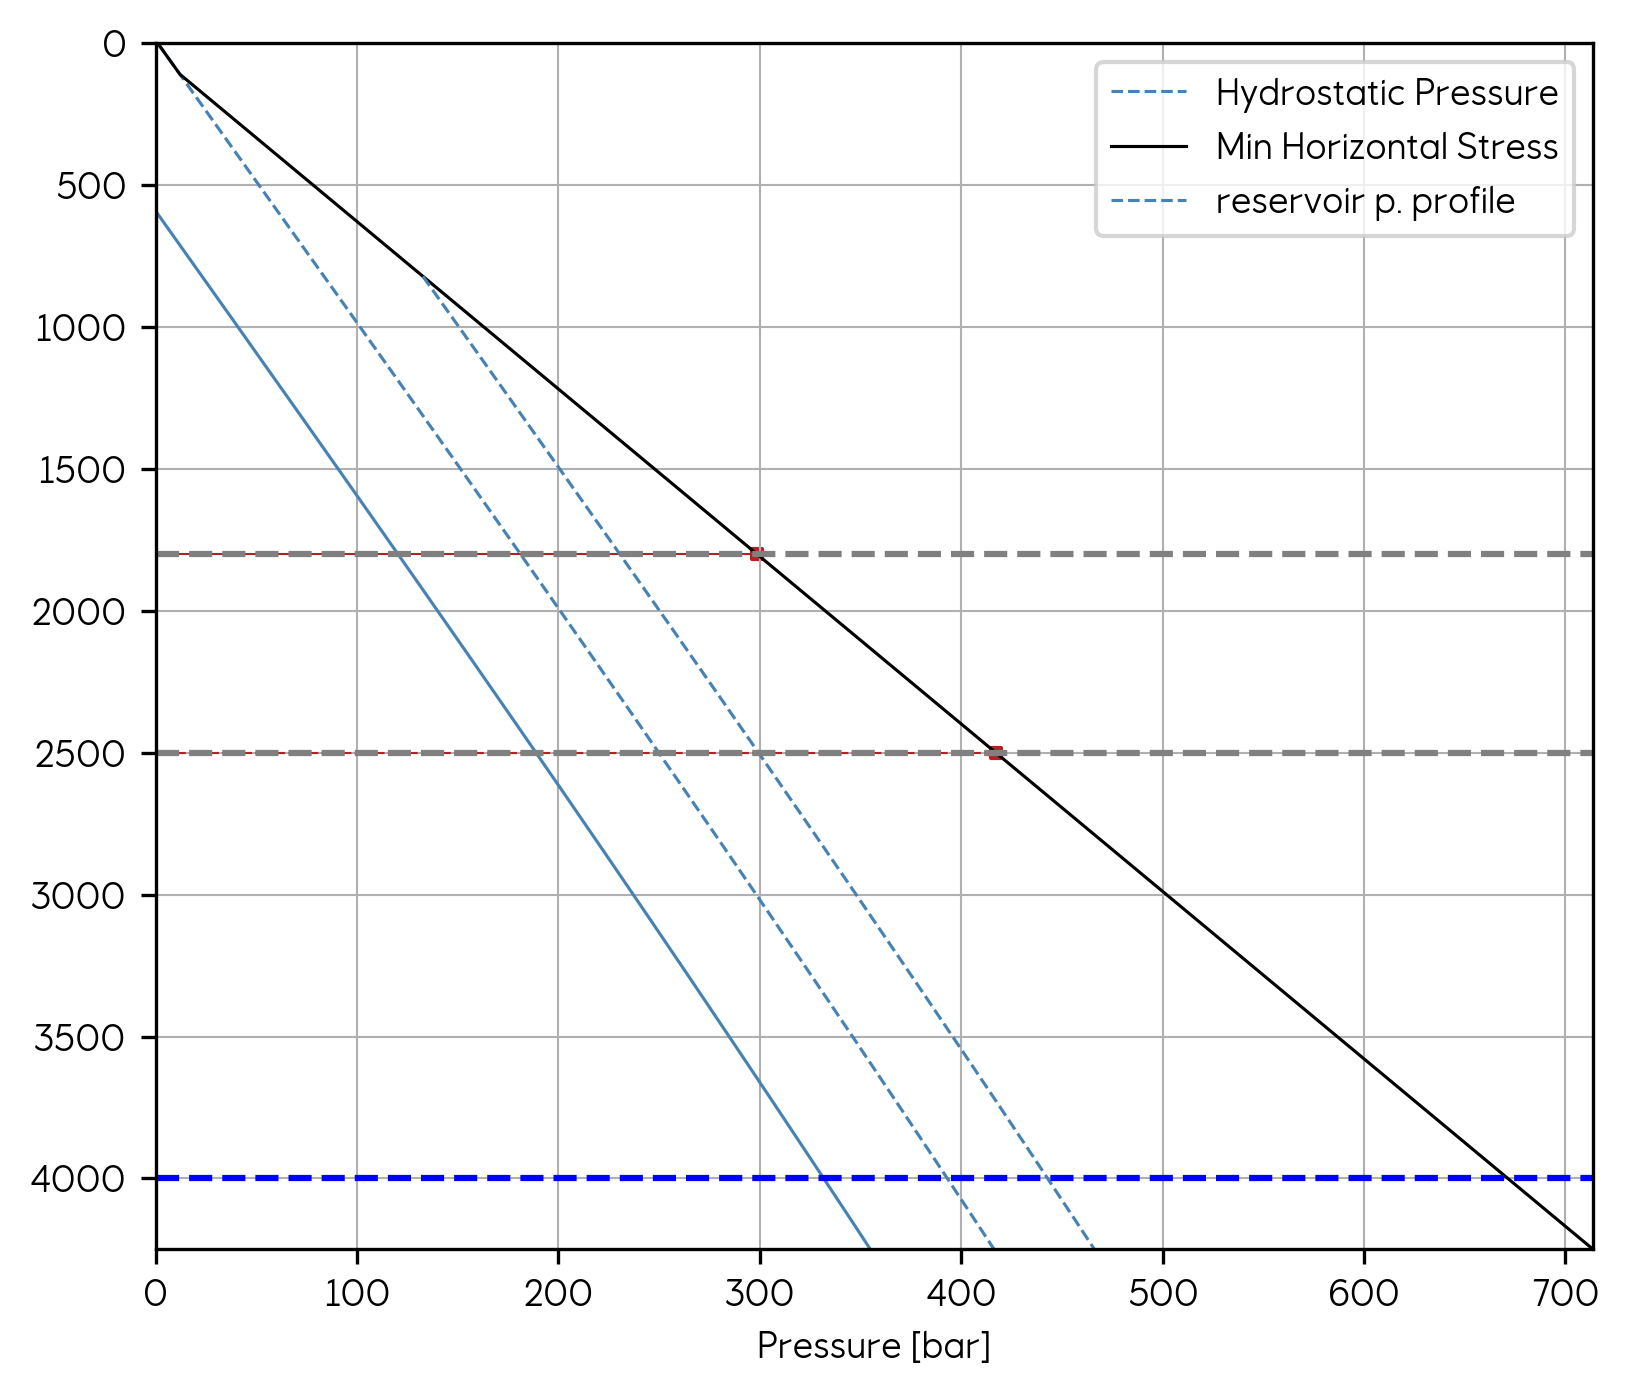

In [86]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=False, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False,)

ax.axhline(y=1800, color='gray', linestyle='--', label='Fluid contact')
ax.axhline(y=2500, color='gray', linestyle='--', label='Fluid contact')
ax.axhline(y=4000, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


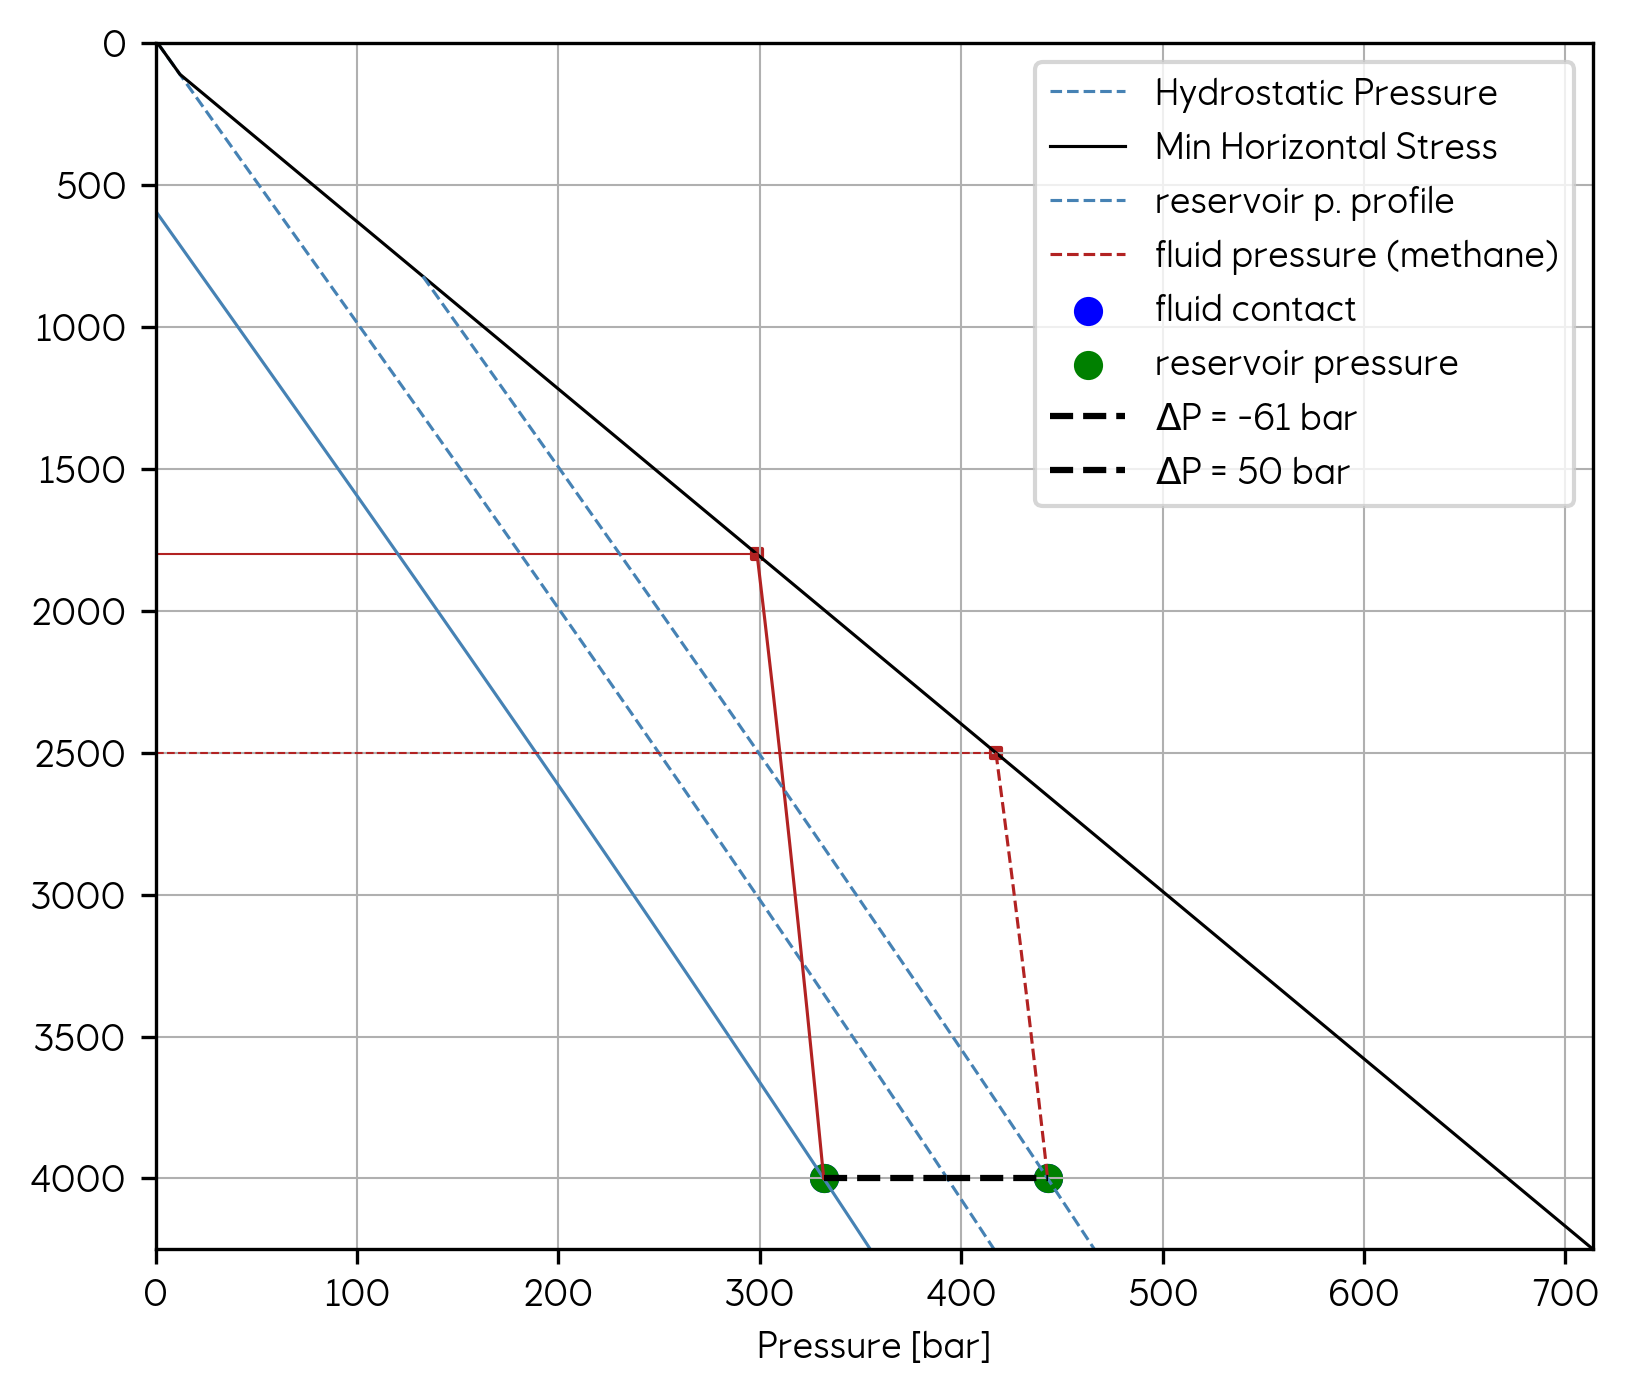

In [87]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 1: Minimum input (only fluid contact)

In [88]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3500.)

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]
Computing pressure profile for scenario: hydrostatic


In [89]:
my_pressure.scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD z_MSAD_brine  \
0  hydrostatic         True  1183.153273  194.049855         None   

  p_MSAD_brine  z_resrv     p_resrv  z_fluid_contact  p_fluid_contact  \
0         None   3500.0  346.050064           3500.0       346.050064   

   p_delta fluid_type fluid_composition specific_gravity  
0      0.0   pure_co2          100% CO2             None

In [90]:
my_pressure.add_scenario('methane', fluid_type='methane', from_resrvr=True, z_fluid_contact=my_pressure.z_fluid_contact)

Computing pressure profile for scenario: methane


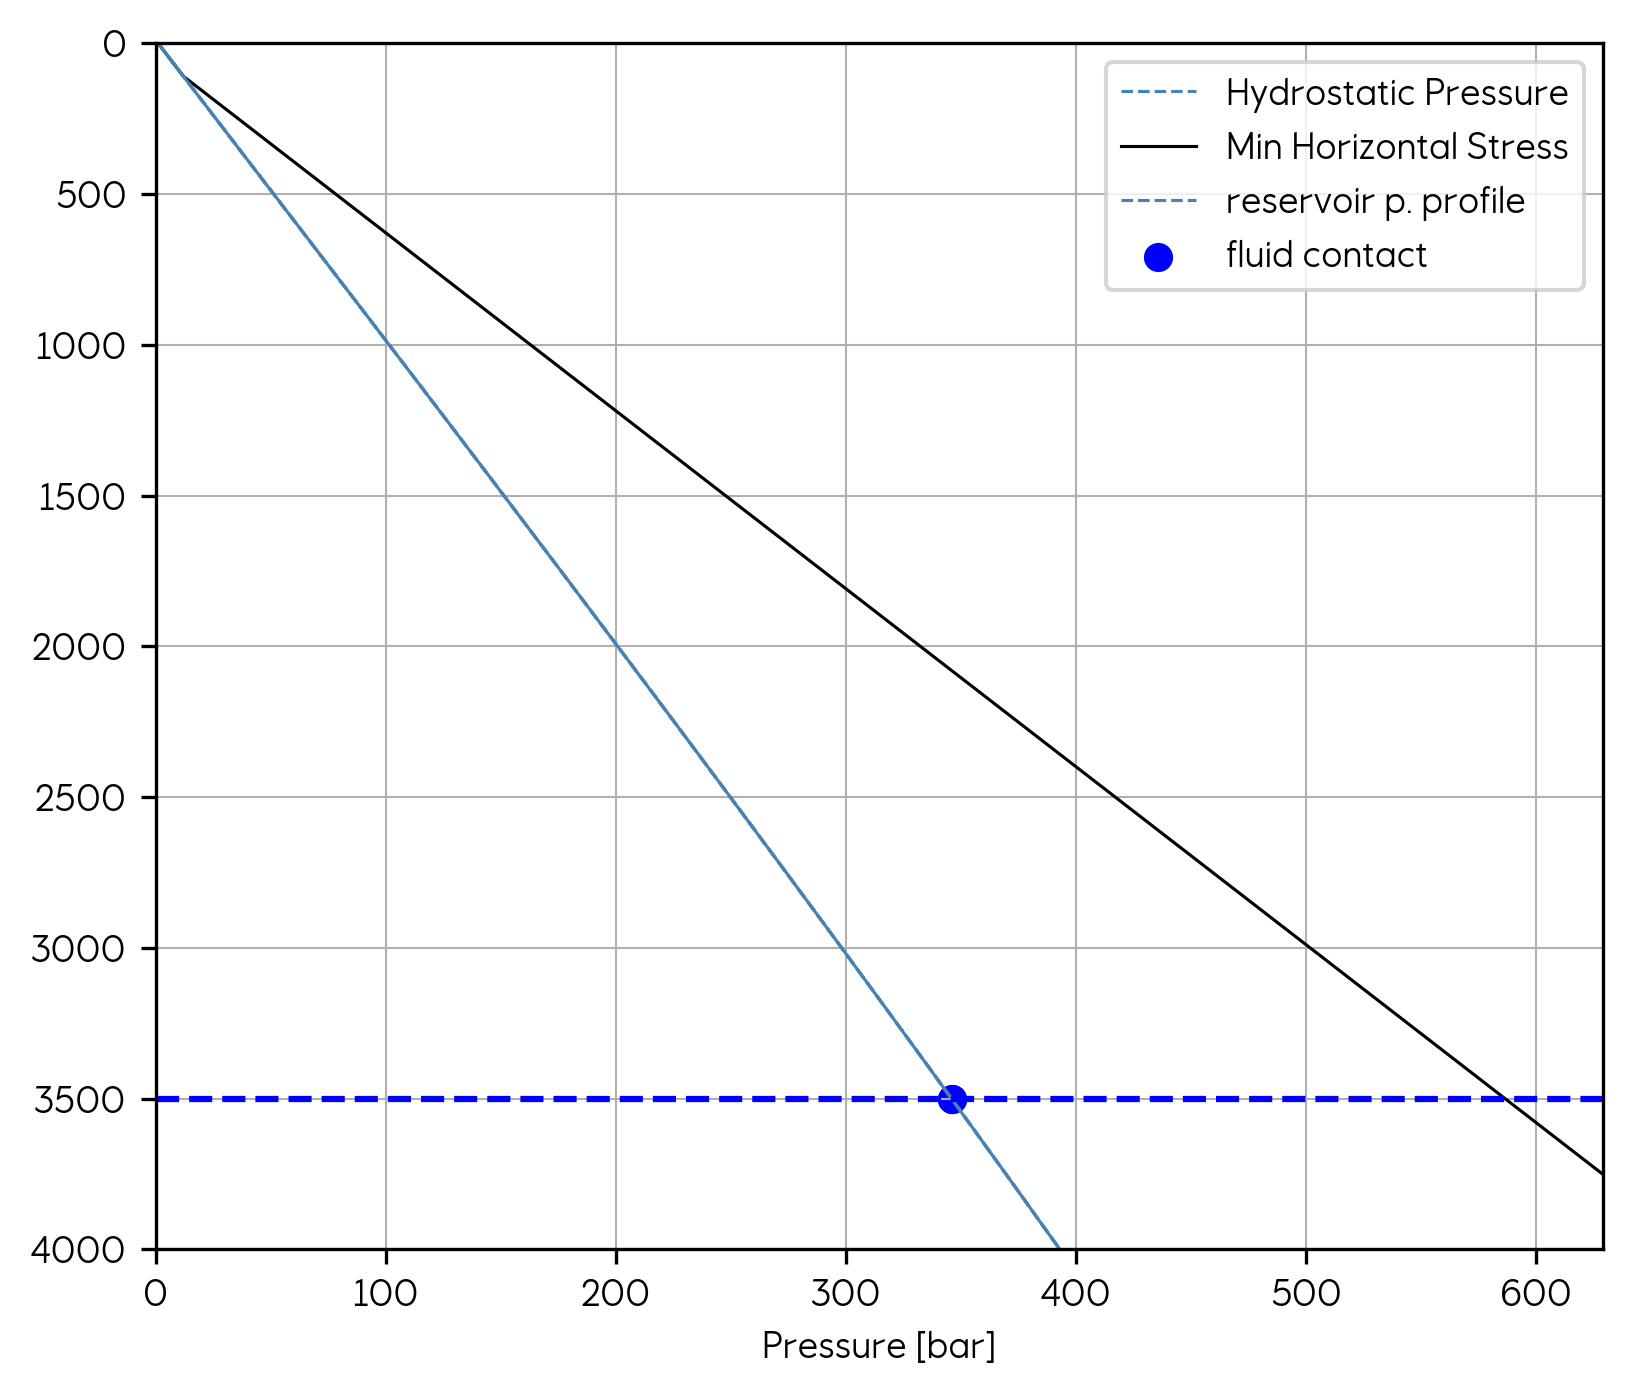

In [91]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

In [92]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD z_MSAD_brine  \
0  hydrostatic         True  1183.153273  194.049855         None   
1      methane         True  1931.323178  320.864654         None   

  p_MSAD_brine  z_resrv     p_resrv  z_fluid_contact  p_fluid_contact  \
0         None   3500.0  346.050064           3500.0       346.050064   
1         None   3500.0  346.050064           3500.0       346.050064   

   p_delta fluid_type fluid_composition specific_gravity  
0      0.0   pure_co2          100% CO2             None  
1      0.0    methane          100% CH4             None

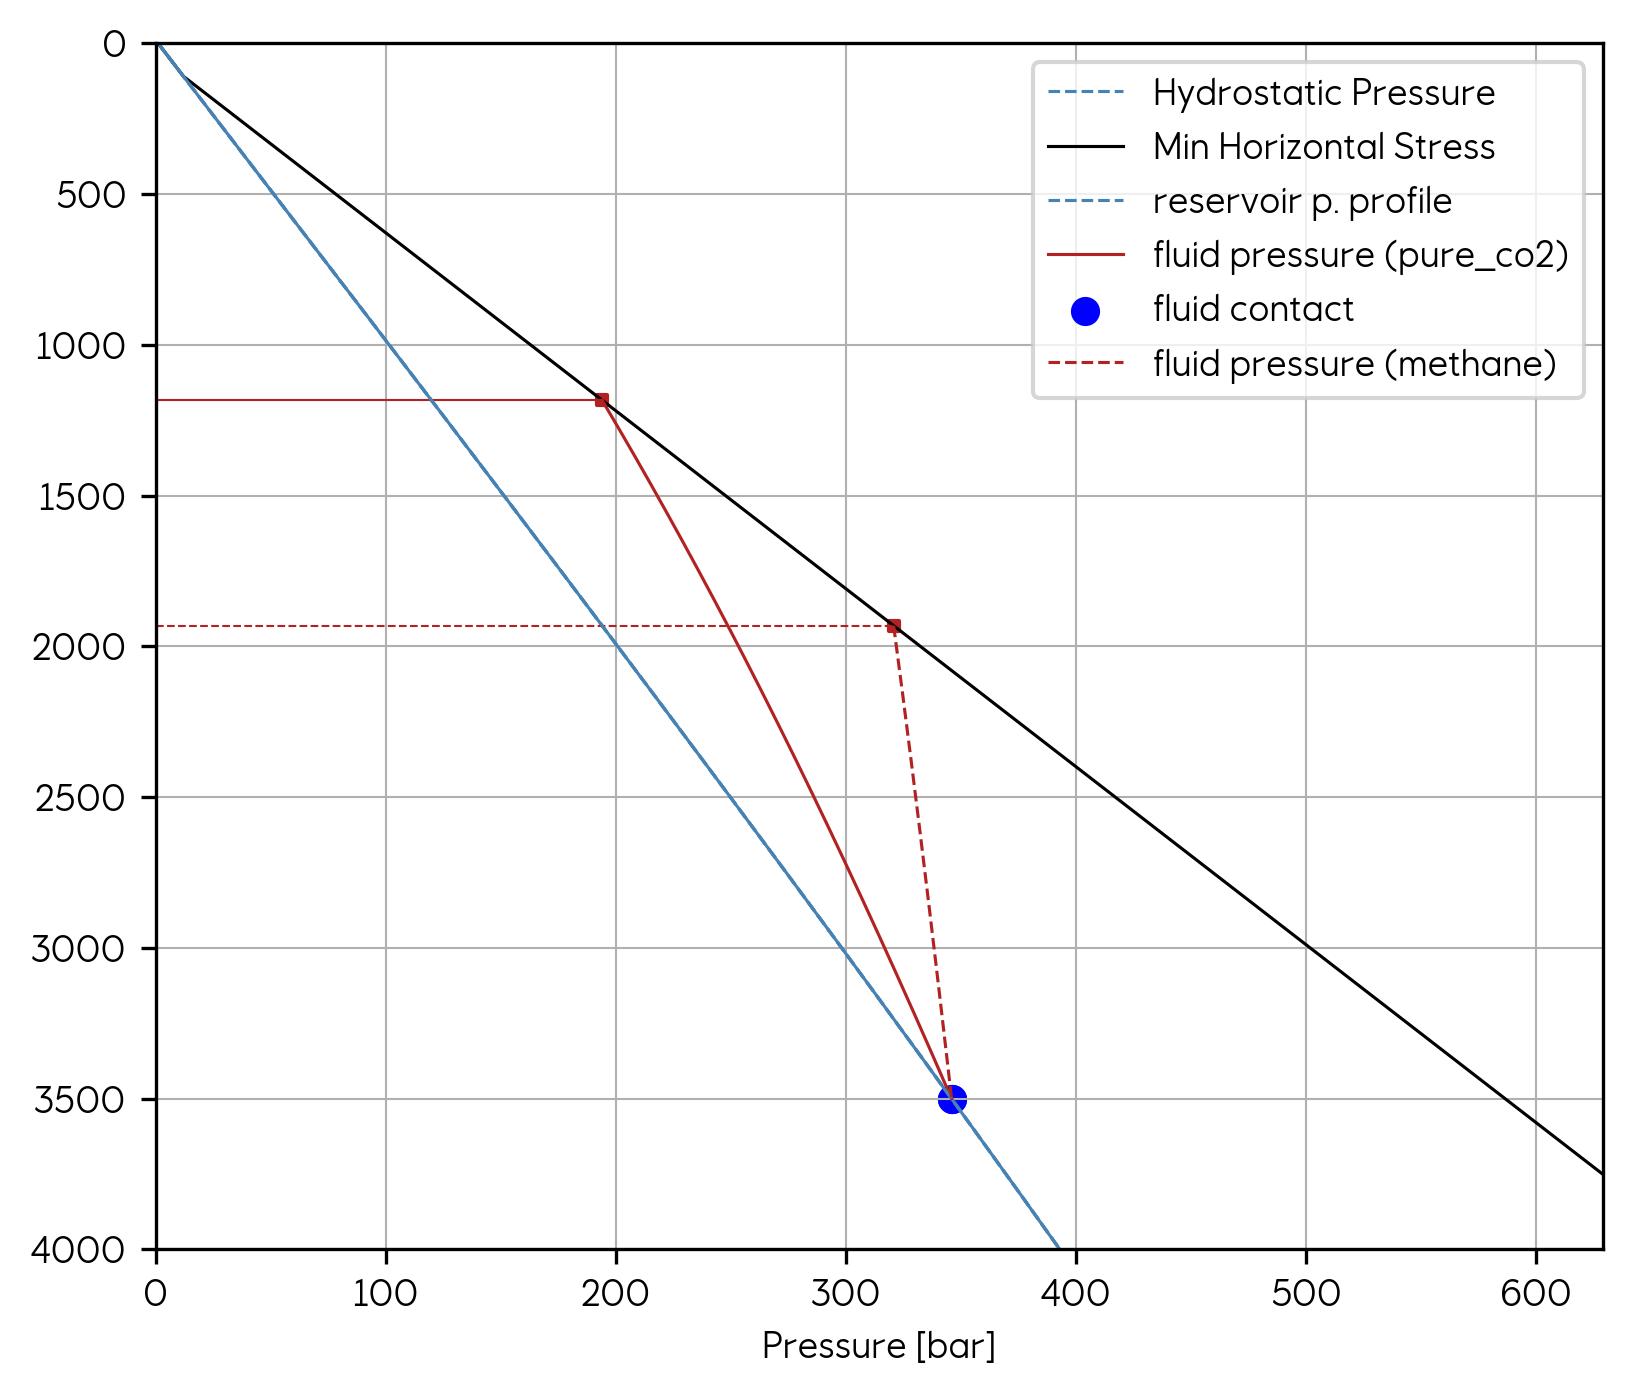

In [93]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)

fig.tight_layout()


## Example 2: Fluid contact + Delta P

In [94]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3700.)

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]
Computing pressure profile for scenario: hydrostatic


In [95]:
my_pressure.add_scenario('pure_co2', fluid_type='pure_co2', from_resrvr=True, z_fluid_contact=3500, p_delta=50)

Computing pressure profile for scenario: pure_co2


In [96]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD  z_MSAD_brine  \
0  hydrostatic         True  1244.659542  204.475167           NaN   
1     pure_co2         True  1611.710560  266.690315    825.113368   

   p_MSAD_brine  z_resrv     p_resrv  z_fluid_contact  p_fluid_contact  \
0           NaN   3700.0  364.972424           3700.0       364.972424   
1    133.362091   3500.0  396.050064           3500.0       396.050064   

   p_delta fluid_type fluid_composition specific_gravity  
0      0.0   pure_co2          100% CO2             None  
1     50.0   pure_co2          100% CO2             None

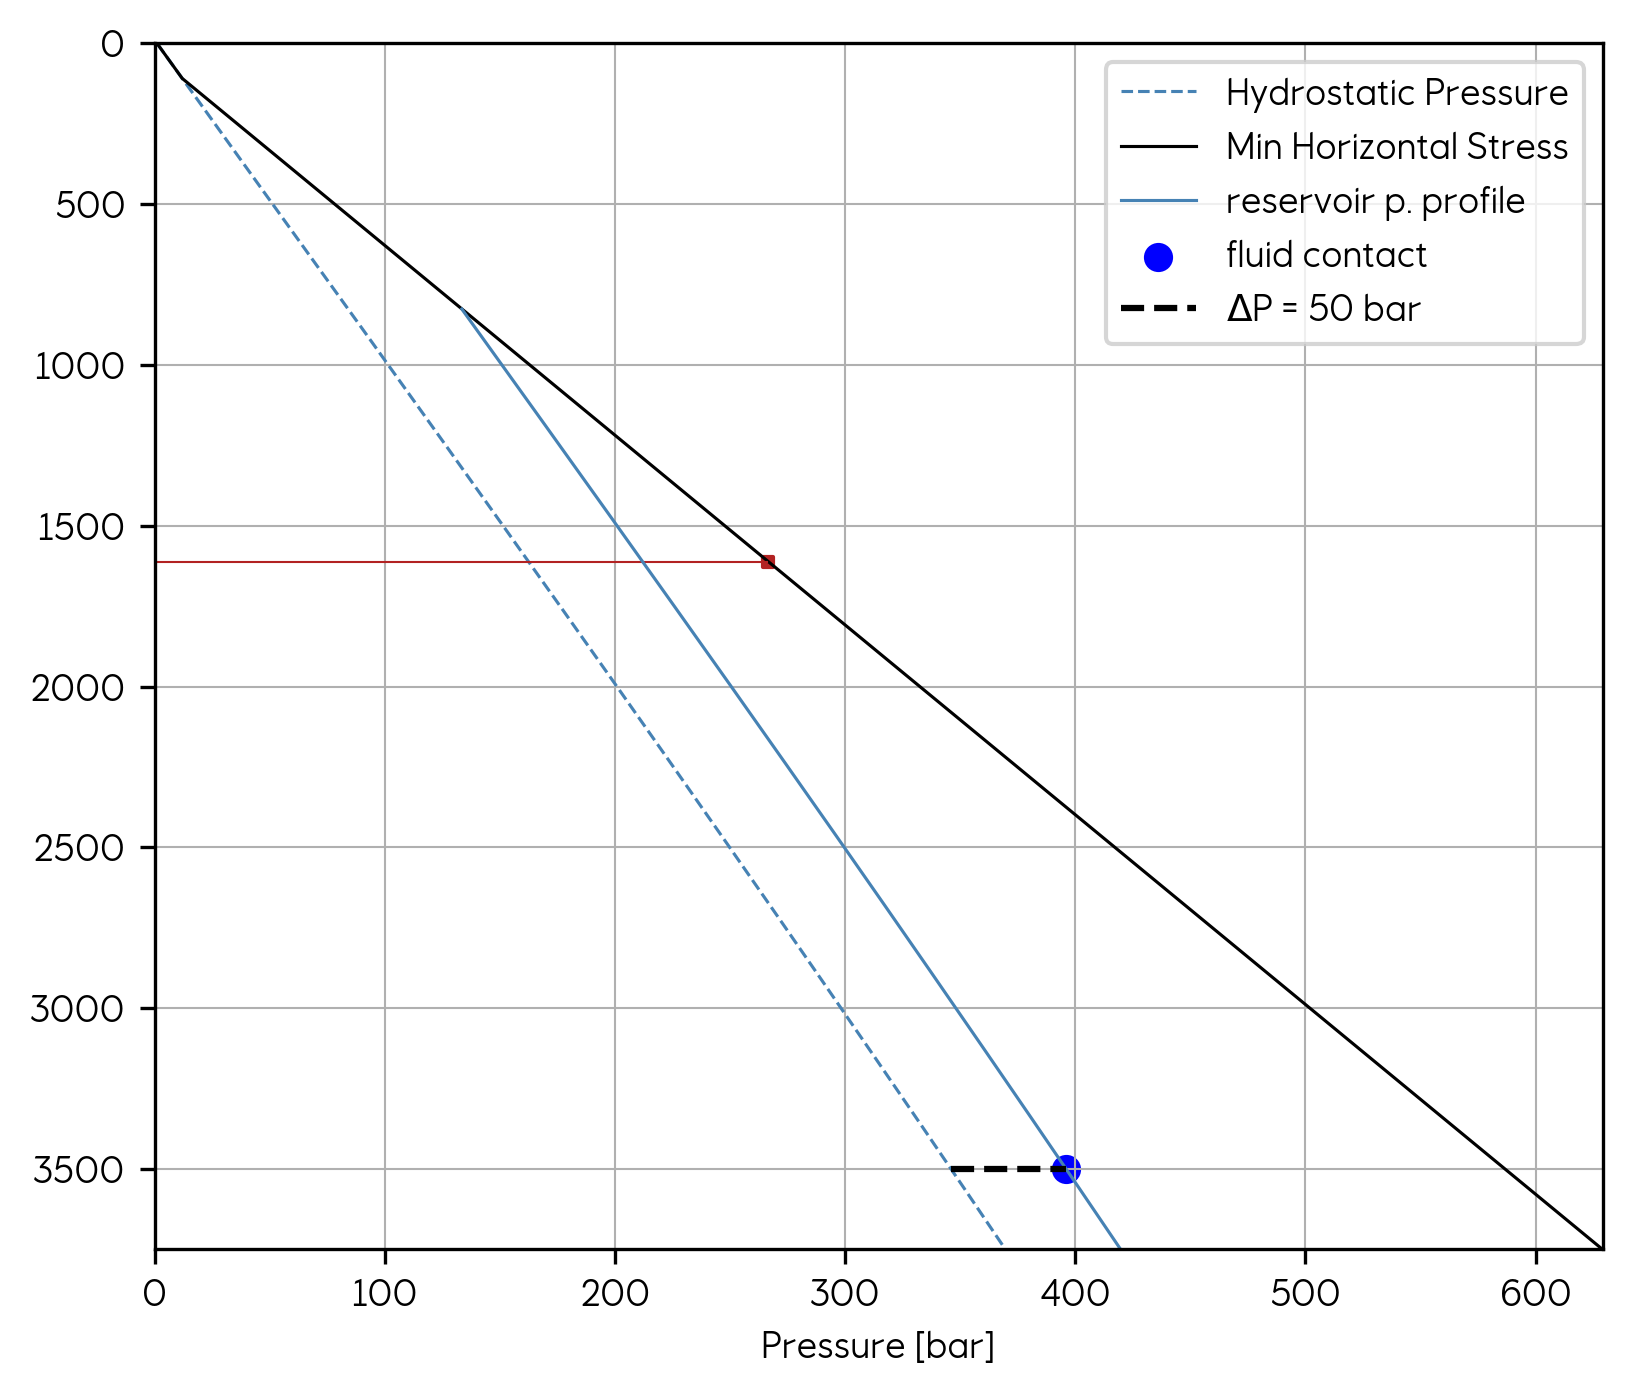

In [97]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,
              plot_selected_scenarios=['pure_co2'])



fig.tight_layout()


## Example 3: Reservoir Pressure

In [98]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]


In [99]:
my_pressure.add_scenario('pure_co2', fluid_type='pure_co2', from_resrvr=True, z_resrv=3400, p_resrv=380)  

Computing pressure profile for scenario: pure_co2


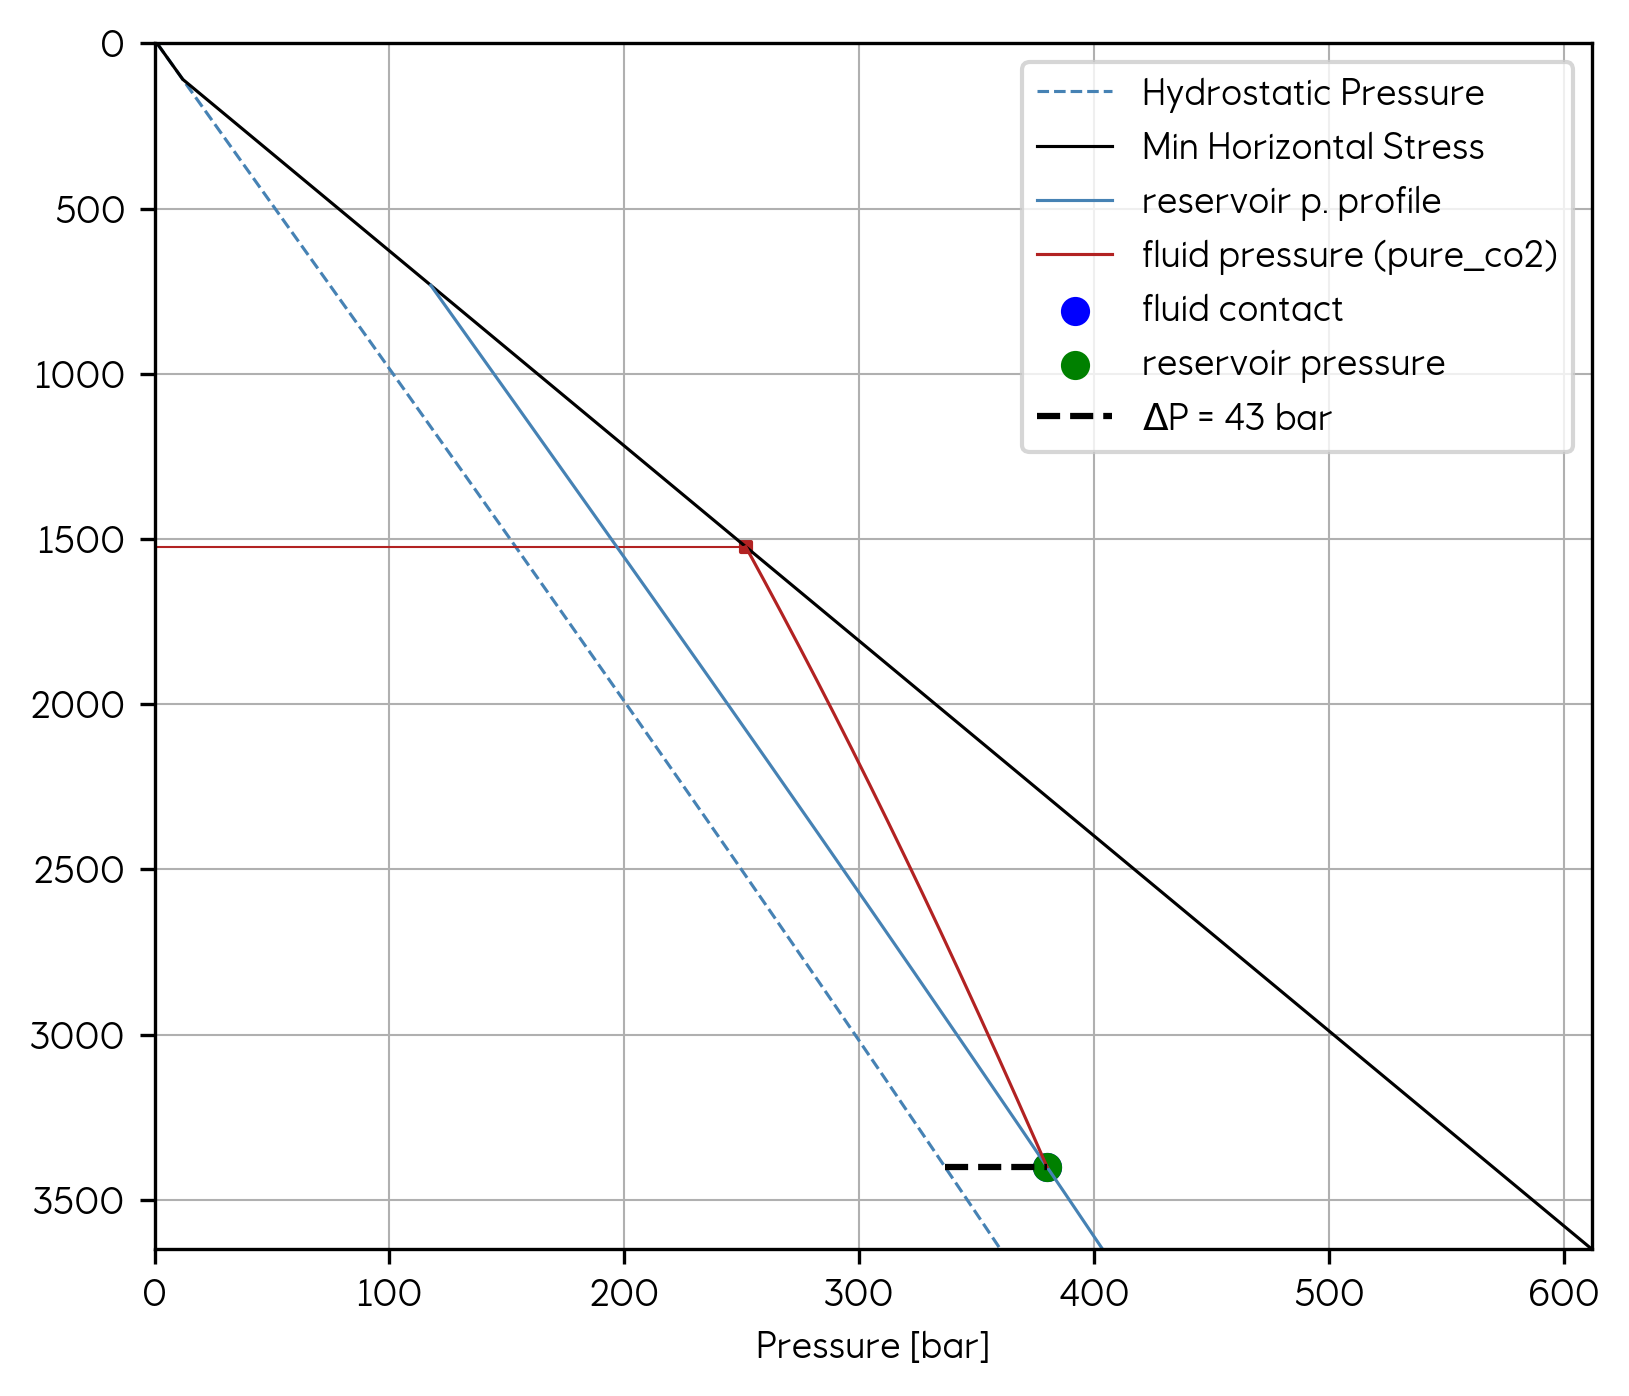

In [100]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)


fig.tight_layout()


## Example 4: Reservoir Pressure + fluid contact


In [101]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]


In [102]:
my_pressure.add_scenario('C1', fluid_type='methane', from_resrvr=True, z_resrv=3100, p_resrv=320, z_fluid_contact=3700)  

Computing pressure profile for scenario: C1


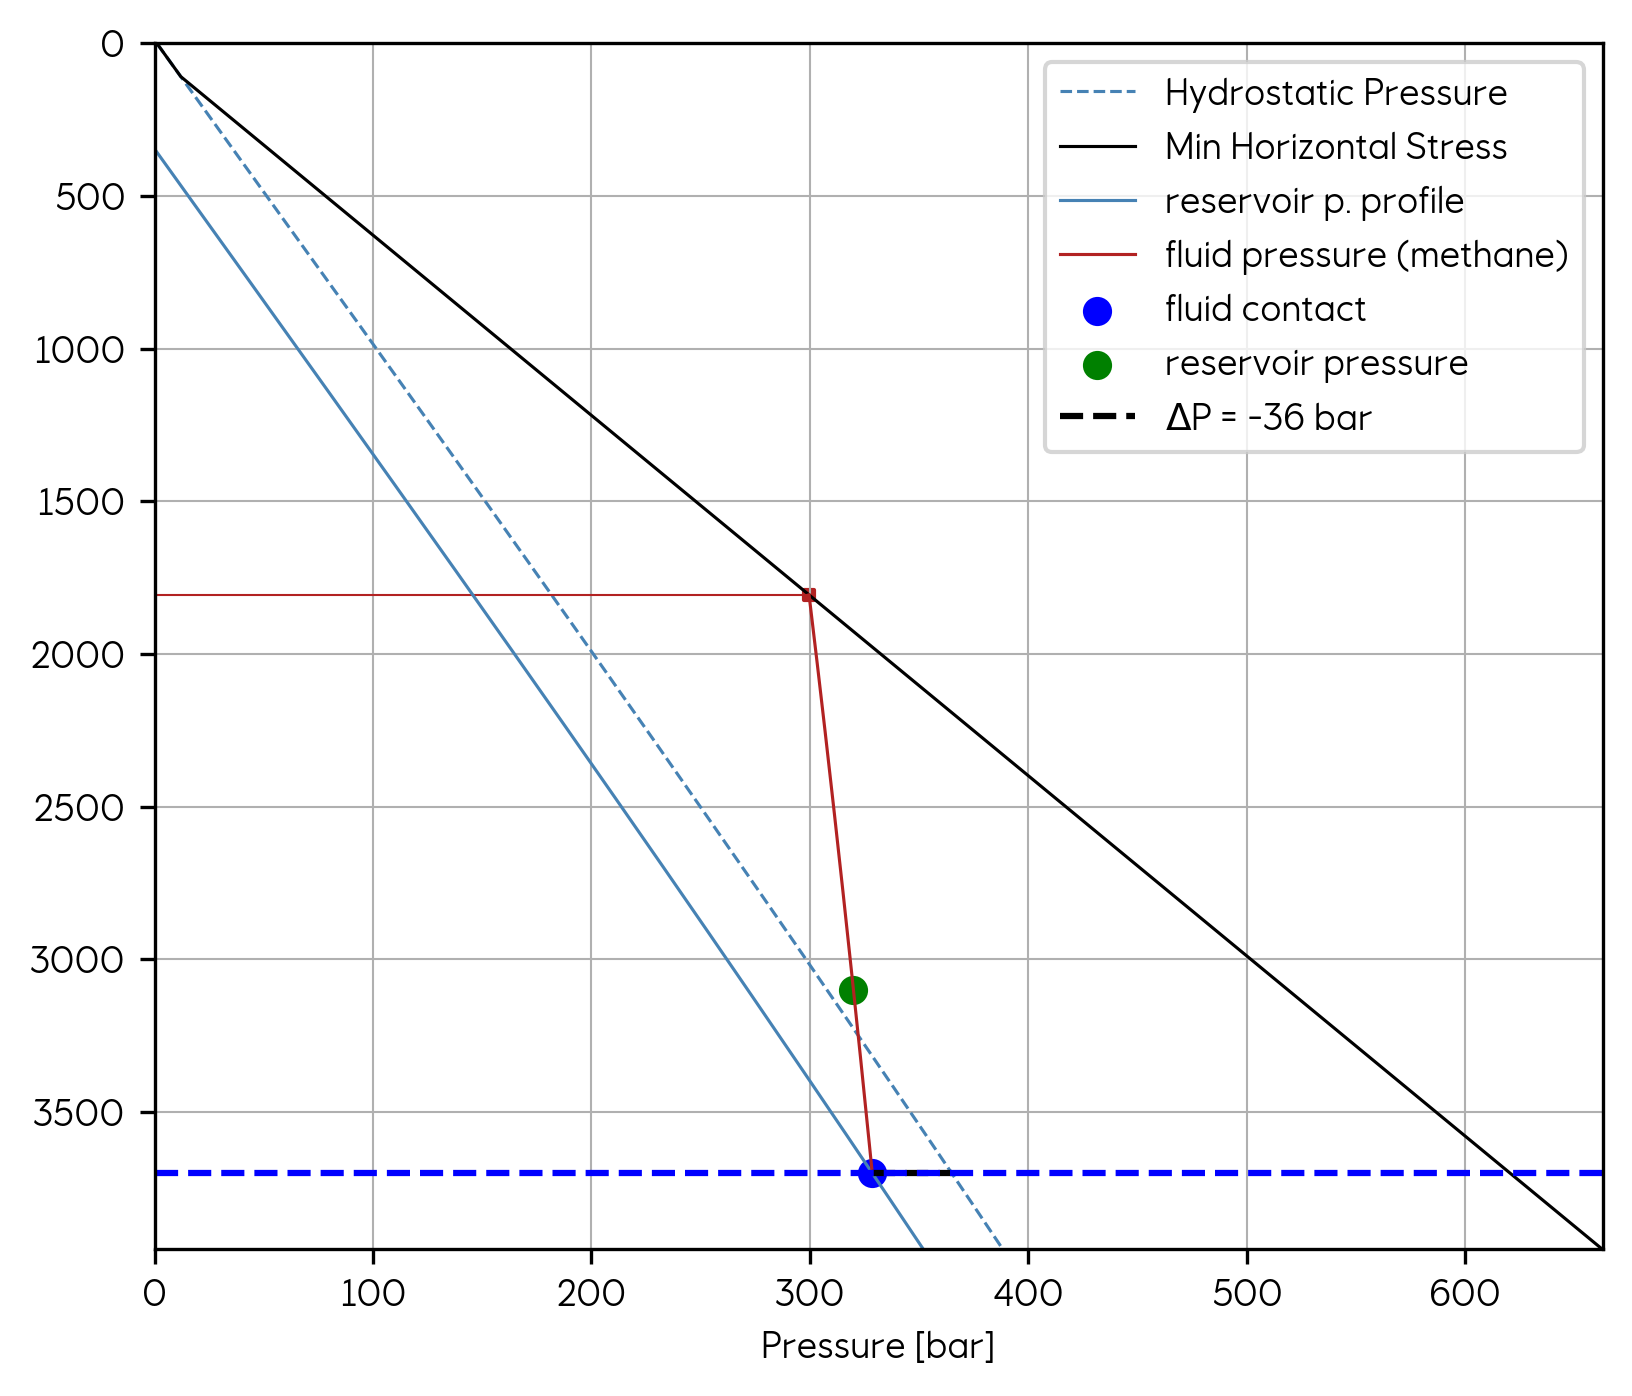

In [103]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 5: Multiple reservoirs


In [104]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]


In [105]:
my_pressure.add_scenario('top r', fluid_type='methane', from_resrvr=True, z_resrv=3000, p_resrv=310, z_fluid_contact=3200)  
my_pressure.add_scenario('bottom r', fluid_type='methane', from_resrvr=True, z_fluid_contact=3700, p_delta=50)  

Computing pressure profile for scenario: top r
Computing pressure profile for scenario: bottom r


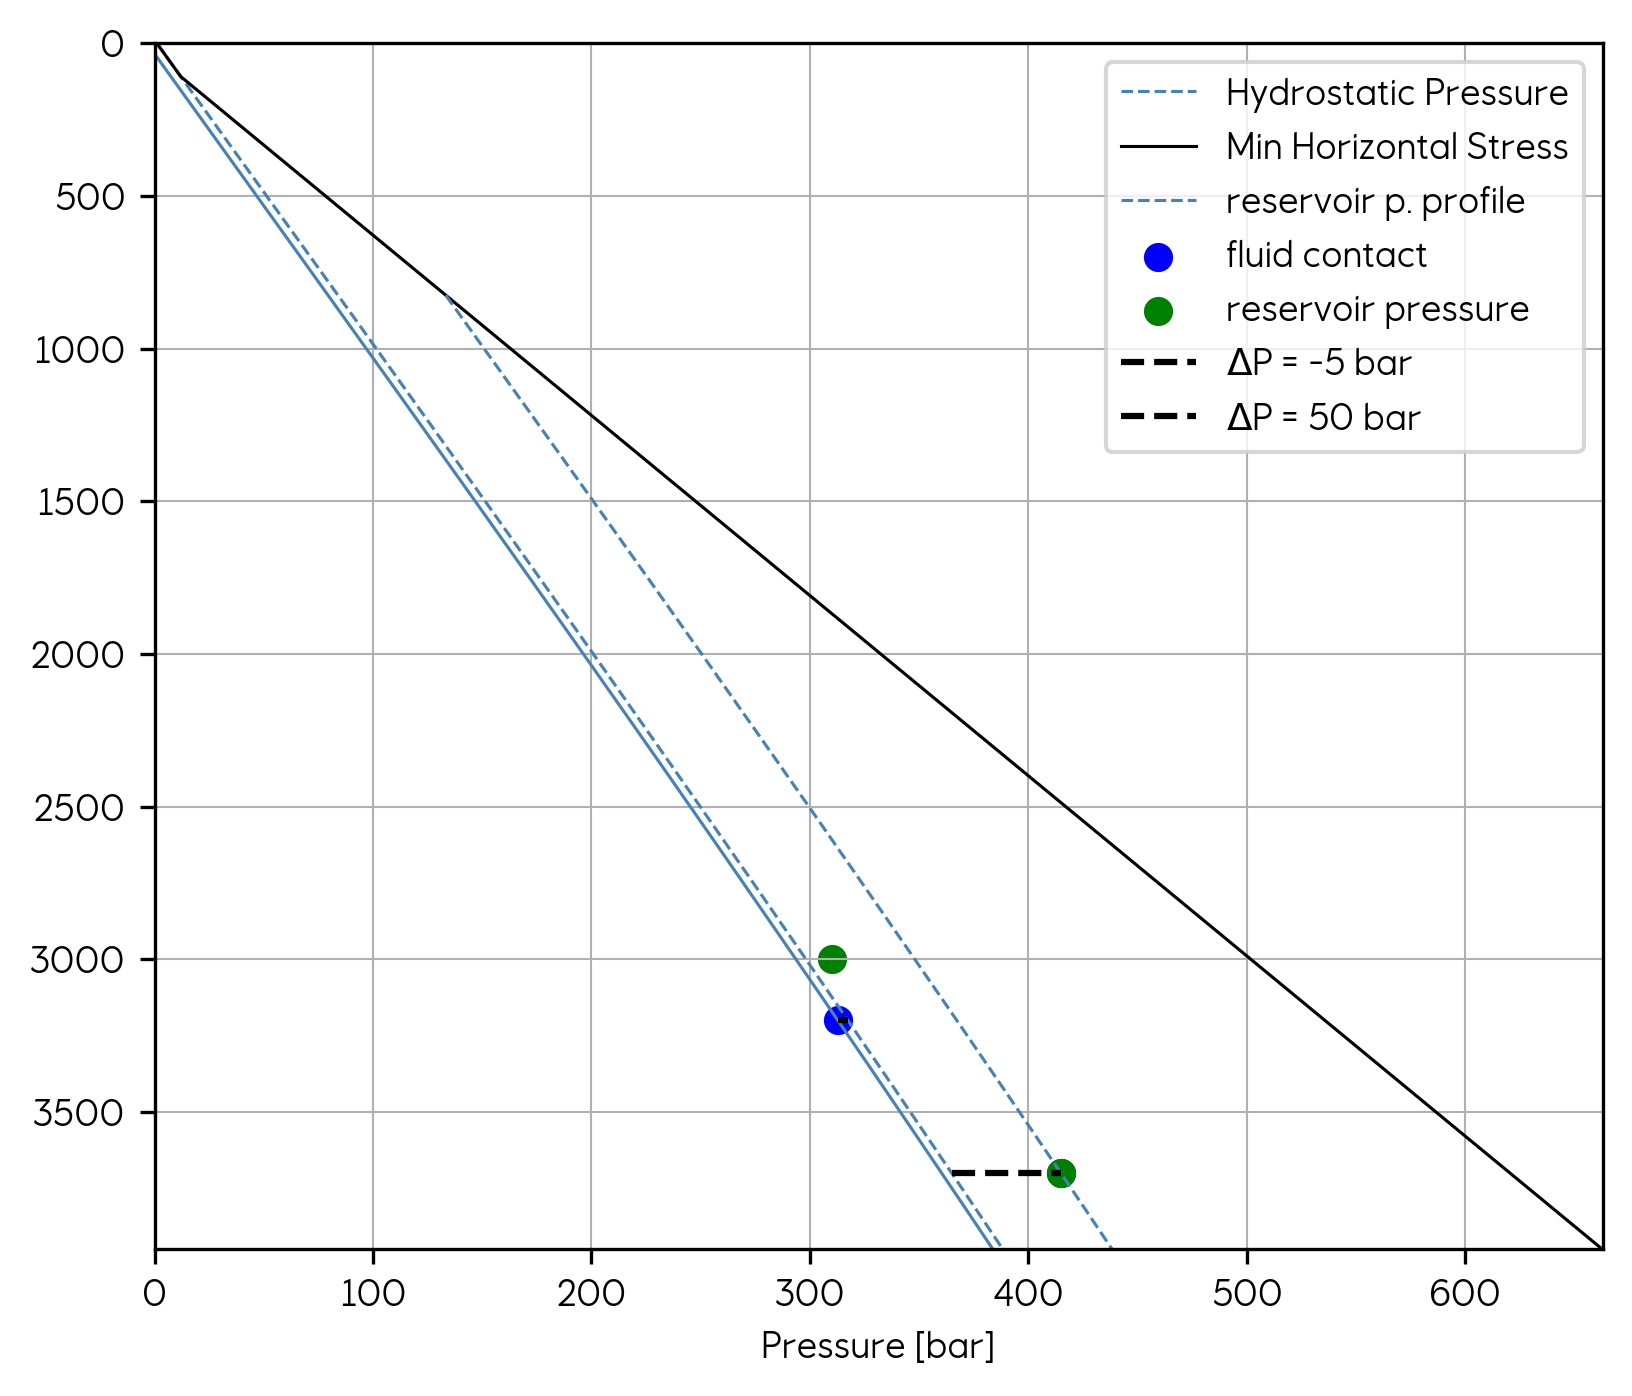

In [106]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,)


fig.tight_layout()


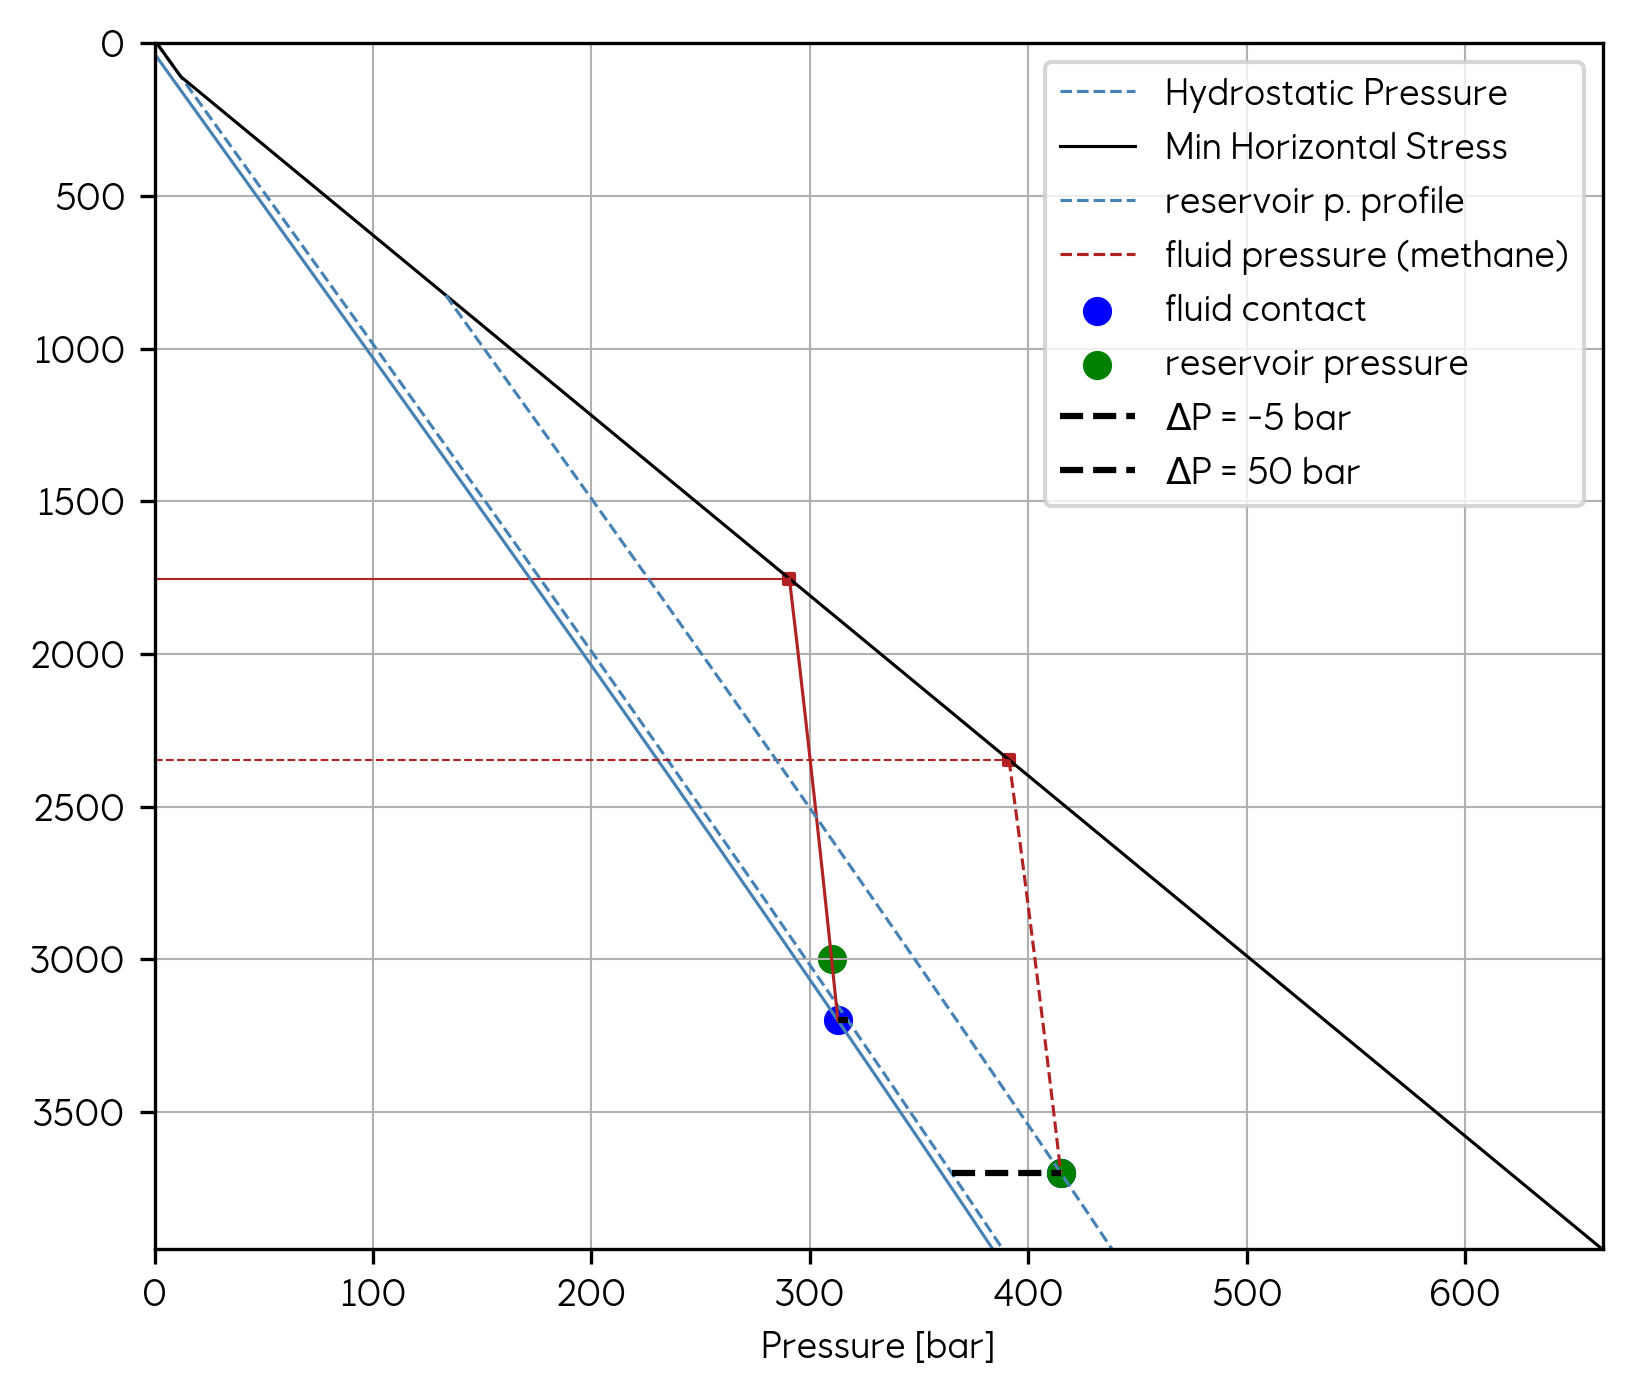

In [107]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 6: Compute pressure profile downwards from MSAD


In [108]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]


In [109]:
my_pressure.add_scenario('Plug1', fluid_type='methane', from_resrvr=False,  z_MSAD=1800, z_fluid_contact=4000)    
my_pressure.add_scenario('Plug2', fluid_type='methane', from_resrvr=False,  z_MSAD=2500, z_fluid_contact=4000)  


Computing pressure profile for scenario: Plug1
Computing pressure profile for scenario: Plug2


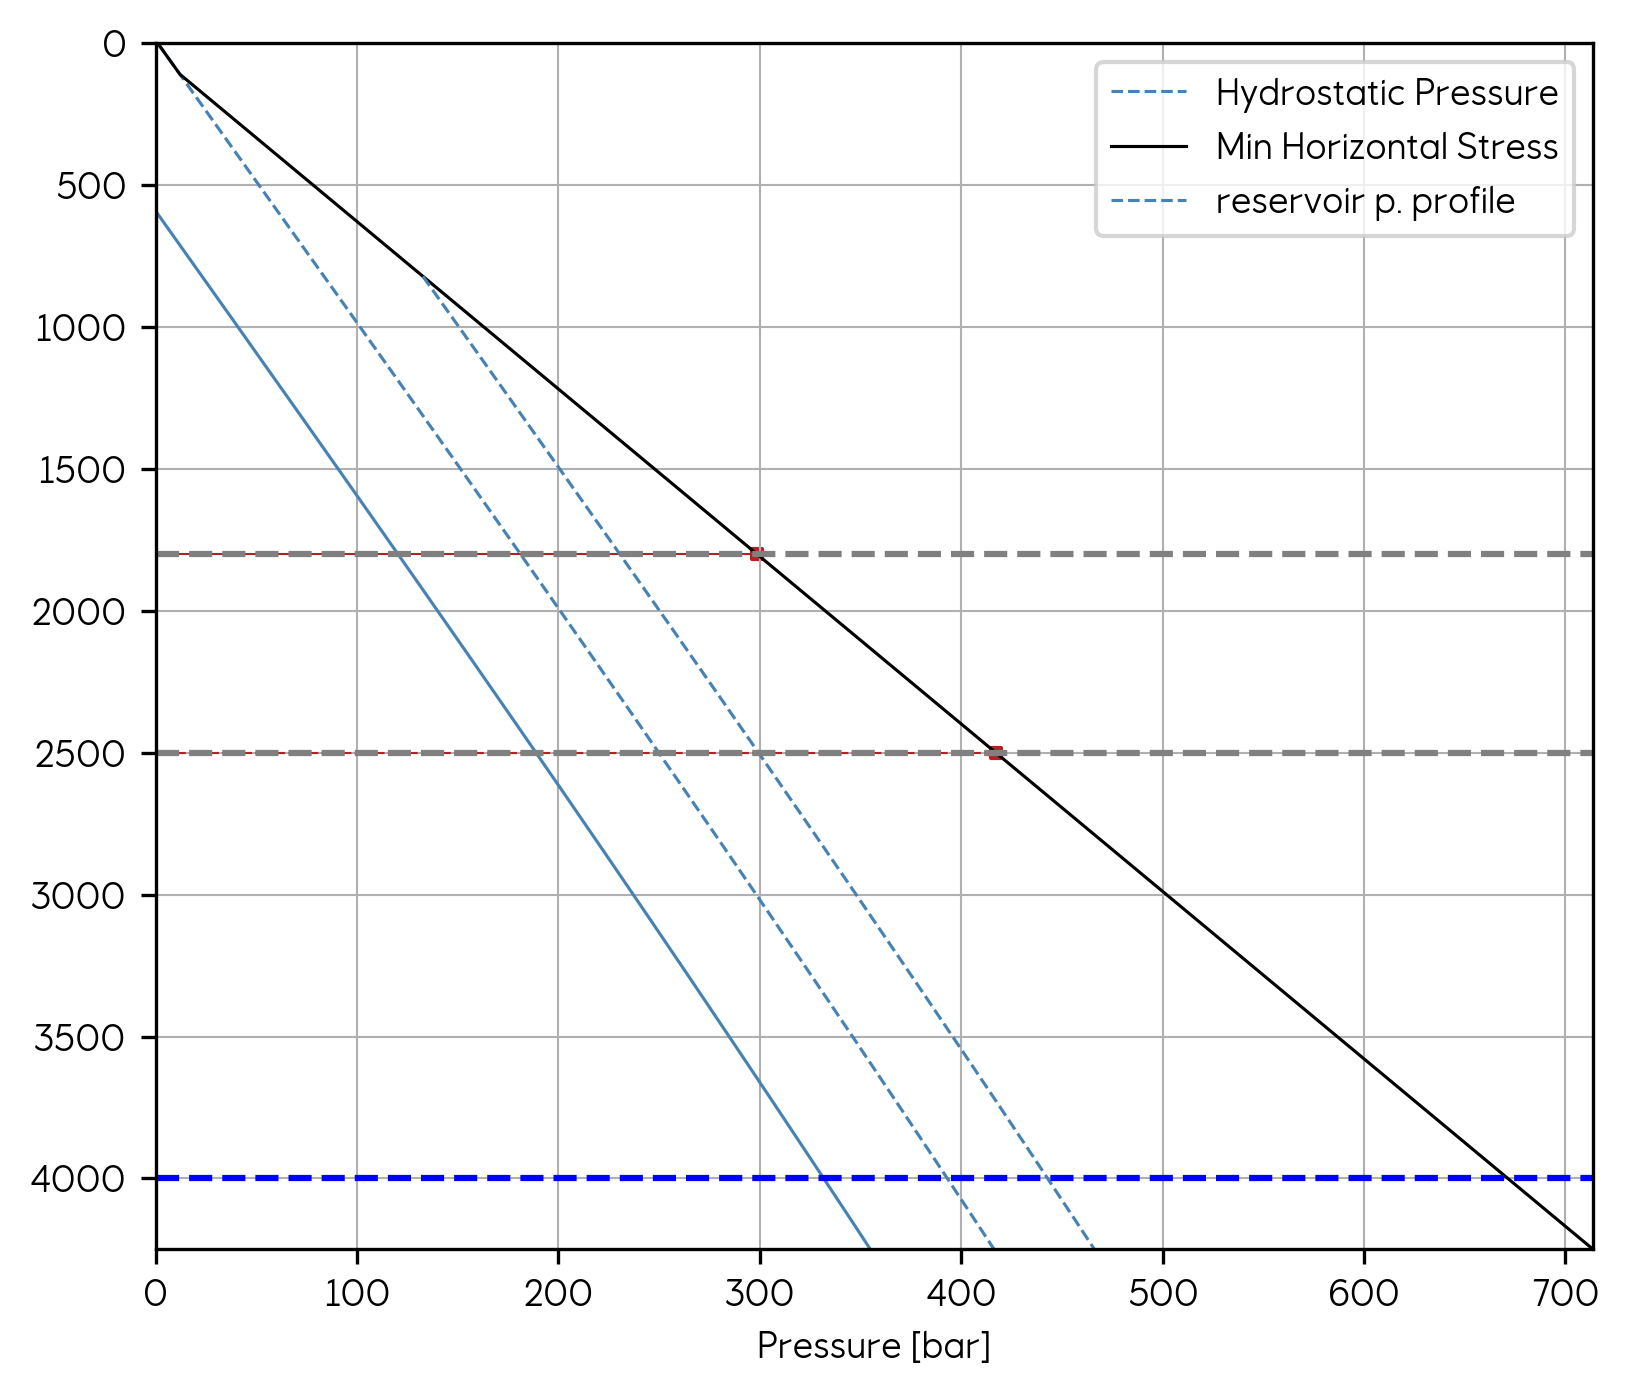

In [110]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=False, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False,)

ax.axhline(y=1800, color='gray', linestyle='--', label='Fluid contact')
ax.axhline(y=2500, color='gray', linestyle='--', label='Fluid contact')
ax.axhline(y=4000, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


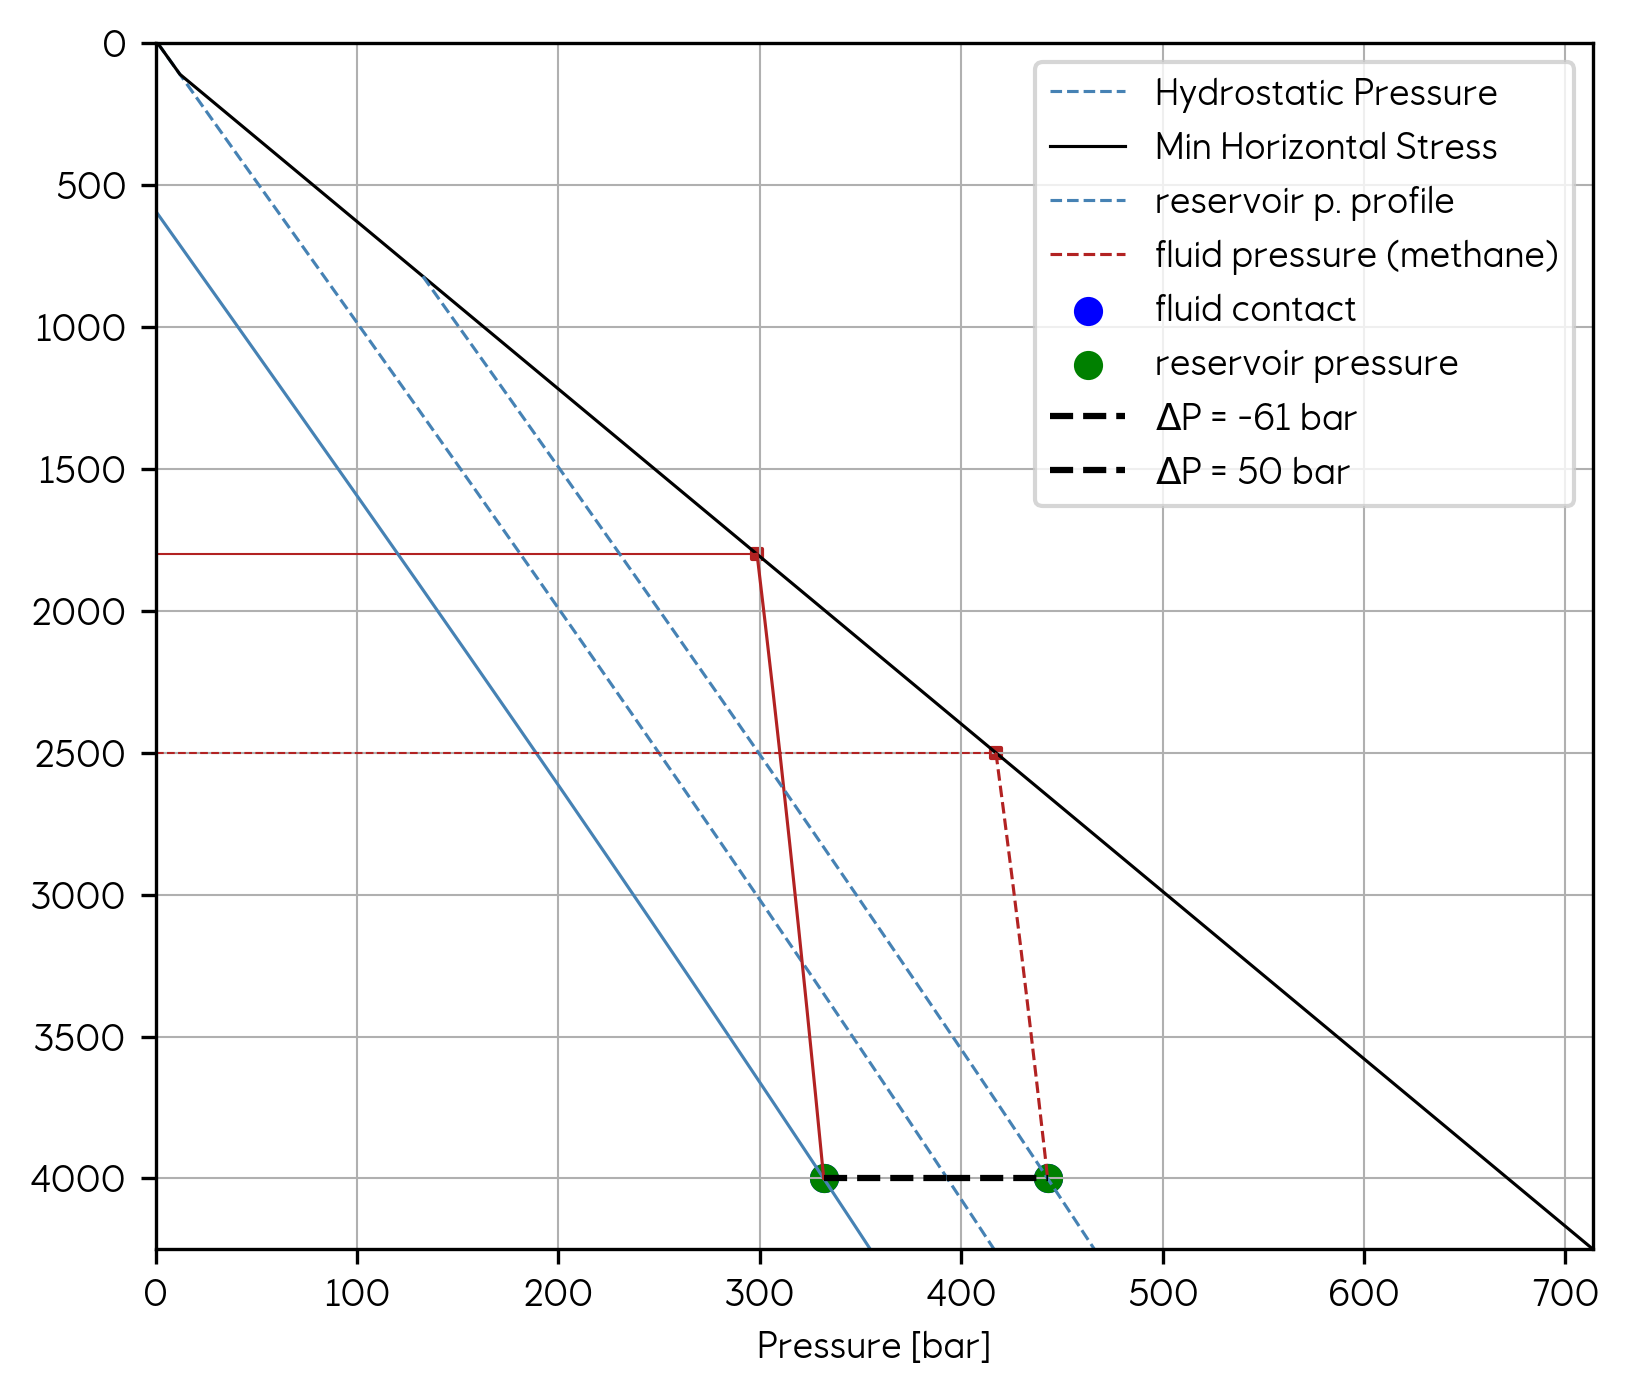

In [111]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


[  1.01325      1.11384372   1.21443794 ... 662.04312533 662.12298014
 662.20282923]
Computing pressure profile for scenario: saline1
Computing pressure profile for scenario: saline2
Computing pressure profile for scenario: depleted


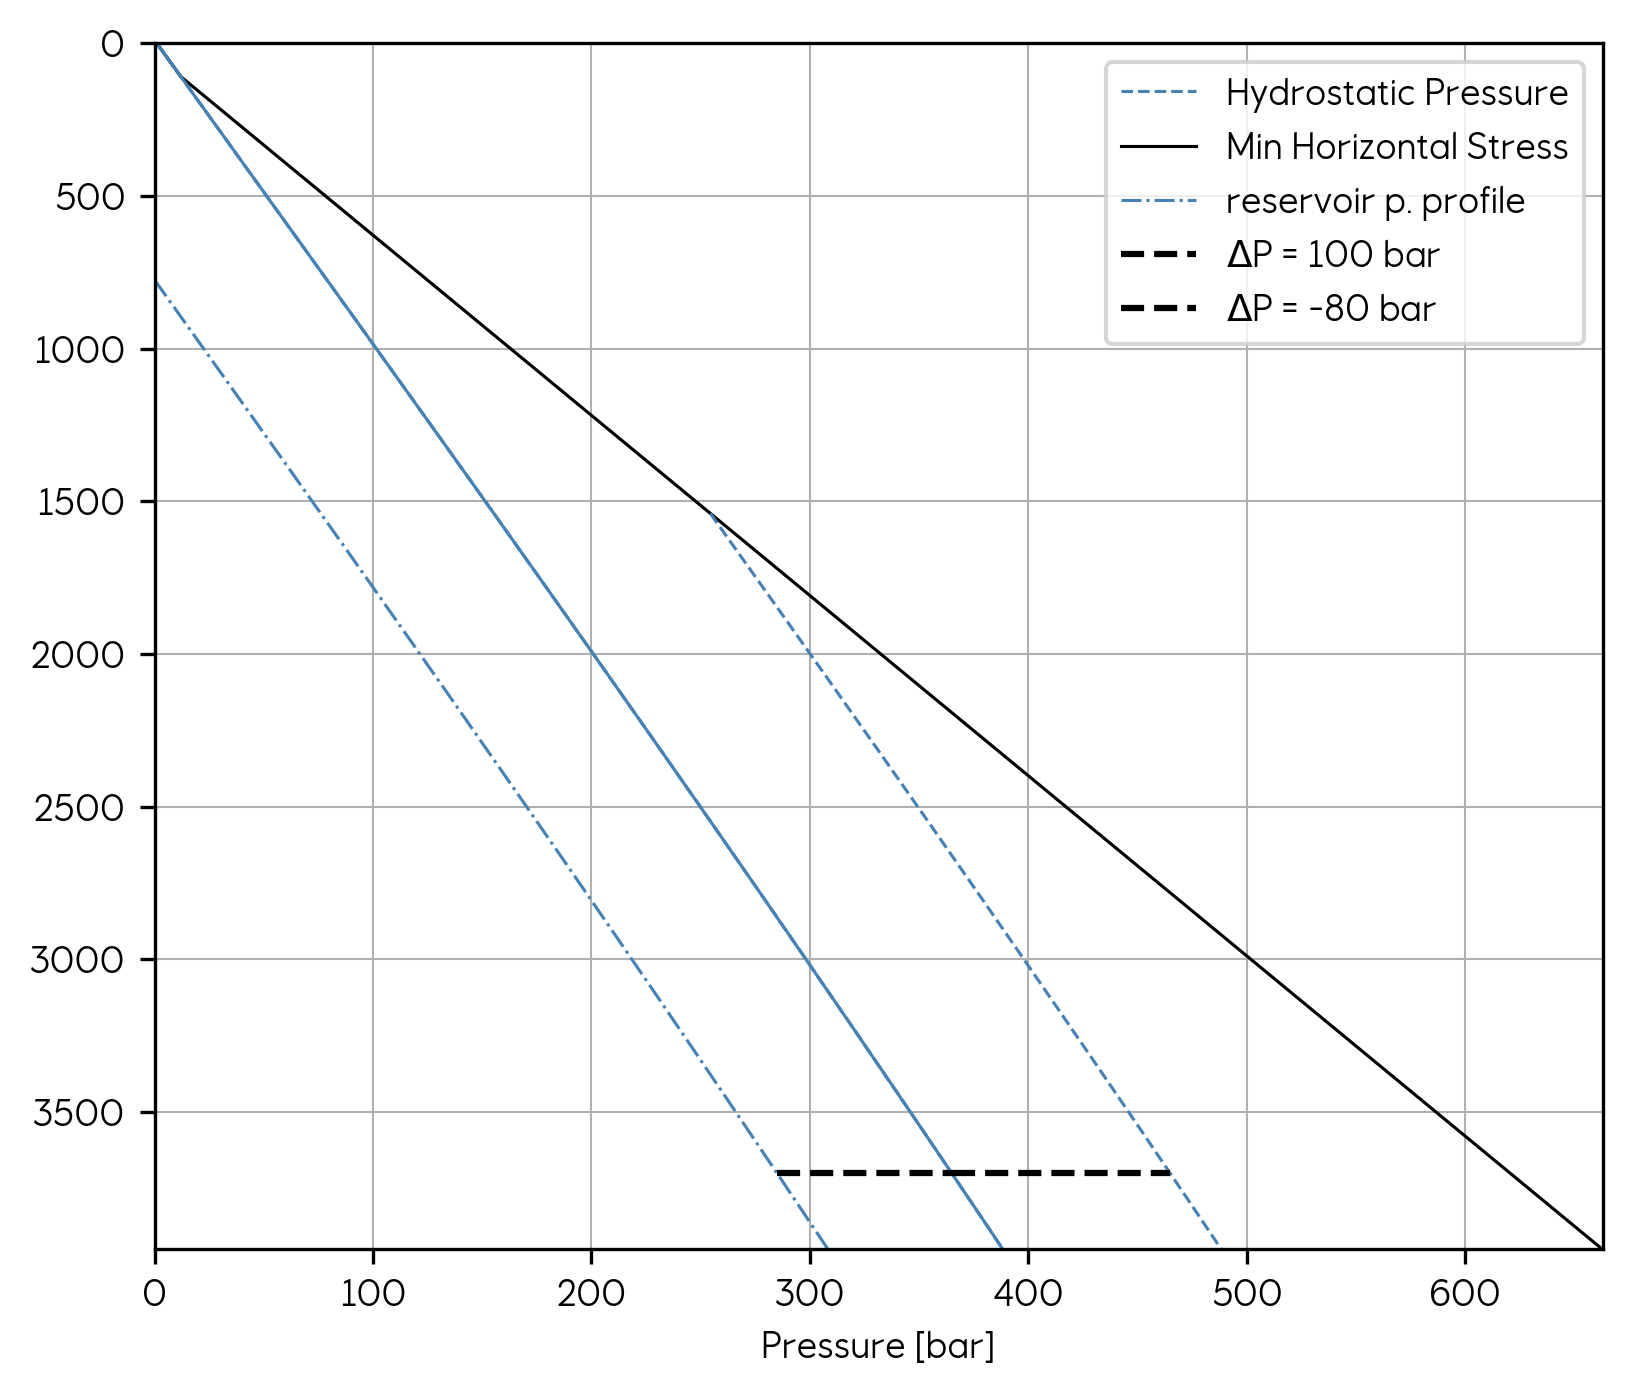

In [112]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)


my_pressure.add_scenario('saline1', fluid_type='pure_co2',  from_resrvr=True,  z_fluid_contact=3700, p_delta= 0)    
my_pressure.add_scenario('saline2', fluid_type='pure_co2',  from_resrvr=True,  z_fluid_contact=3700, p_delta= 100)  
my_pressure.add_scenario('depleted', fluid_type='pure_co2', from_resrvr=True,  z_fluid_contact=3700, p_delta= -80)  

rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=False, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 7: Compute pressure profile with input Shmin curve


In [113]:

winc_file_path = r'../test_data/examples/winc/gradients.json'

with open(winc_file_path, 'r') as file:
    data = json.load(file)

# Now `data` is a Python object that contains the data from your JSON file
data[0].keys()

dict_keys(['curveType', 'curveName', 'depthType', 'curveUnits', 'depthUnits', 'wellboreName', 'depthMsl', 'curveValue'])

In [114]:
my_pressure = Pressure(sf_depth_msl=171.8-62.8,  # wellbore seafloor depth mTVD MSL. 
                       well_td_rkb=4369,  # wellbore td in mTVD RKB
                       well_rkb=62.8,     # wellbore rkb in mTVD RKB
                       sf_temp=4,         # seafloor temperature in degC
                       geo_tgrad=40,      # geothermal gradient in degC/km
                       fluid_type=field_fluid_type,  # fluid type name, should match the filename in the pvt_constants folder
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants', #path to the pvt constants folder
                       z_fluid_contact= 2000, # depth value coming from WINC UI
                       p_fluid_contact= 200 # pressure value coming from WINC UI
                       ) 

[  1.01325      1.11384372   1.21443794 ... 467.13160244 467.22218748
 467.31276846]
Computing pressure profile for scenario: hydrostatic


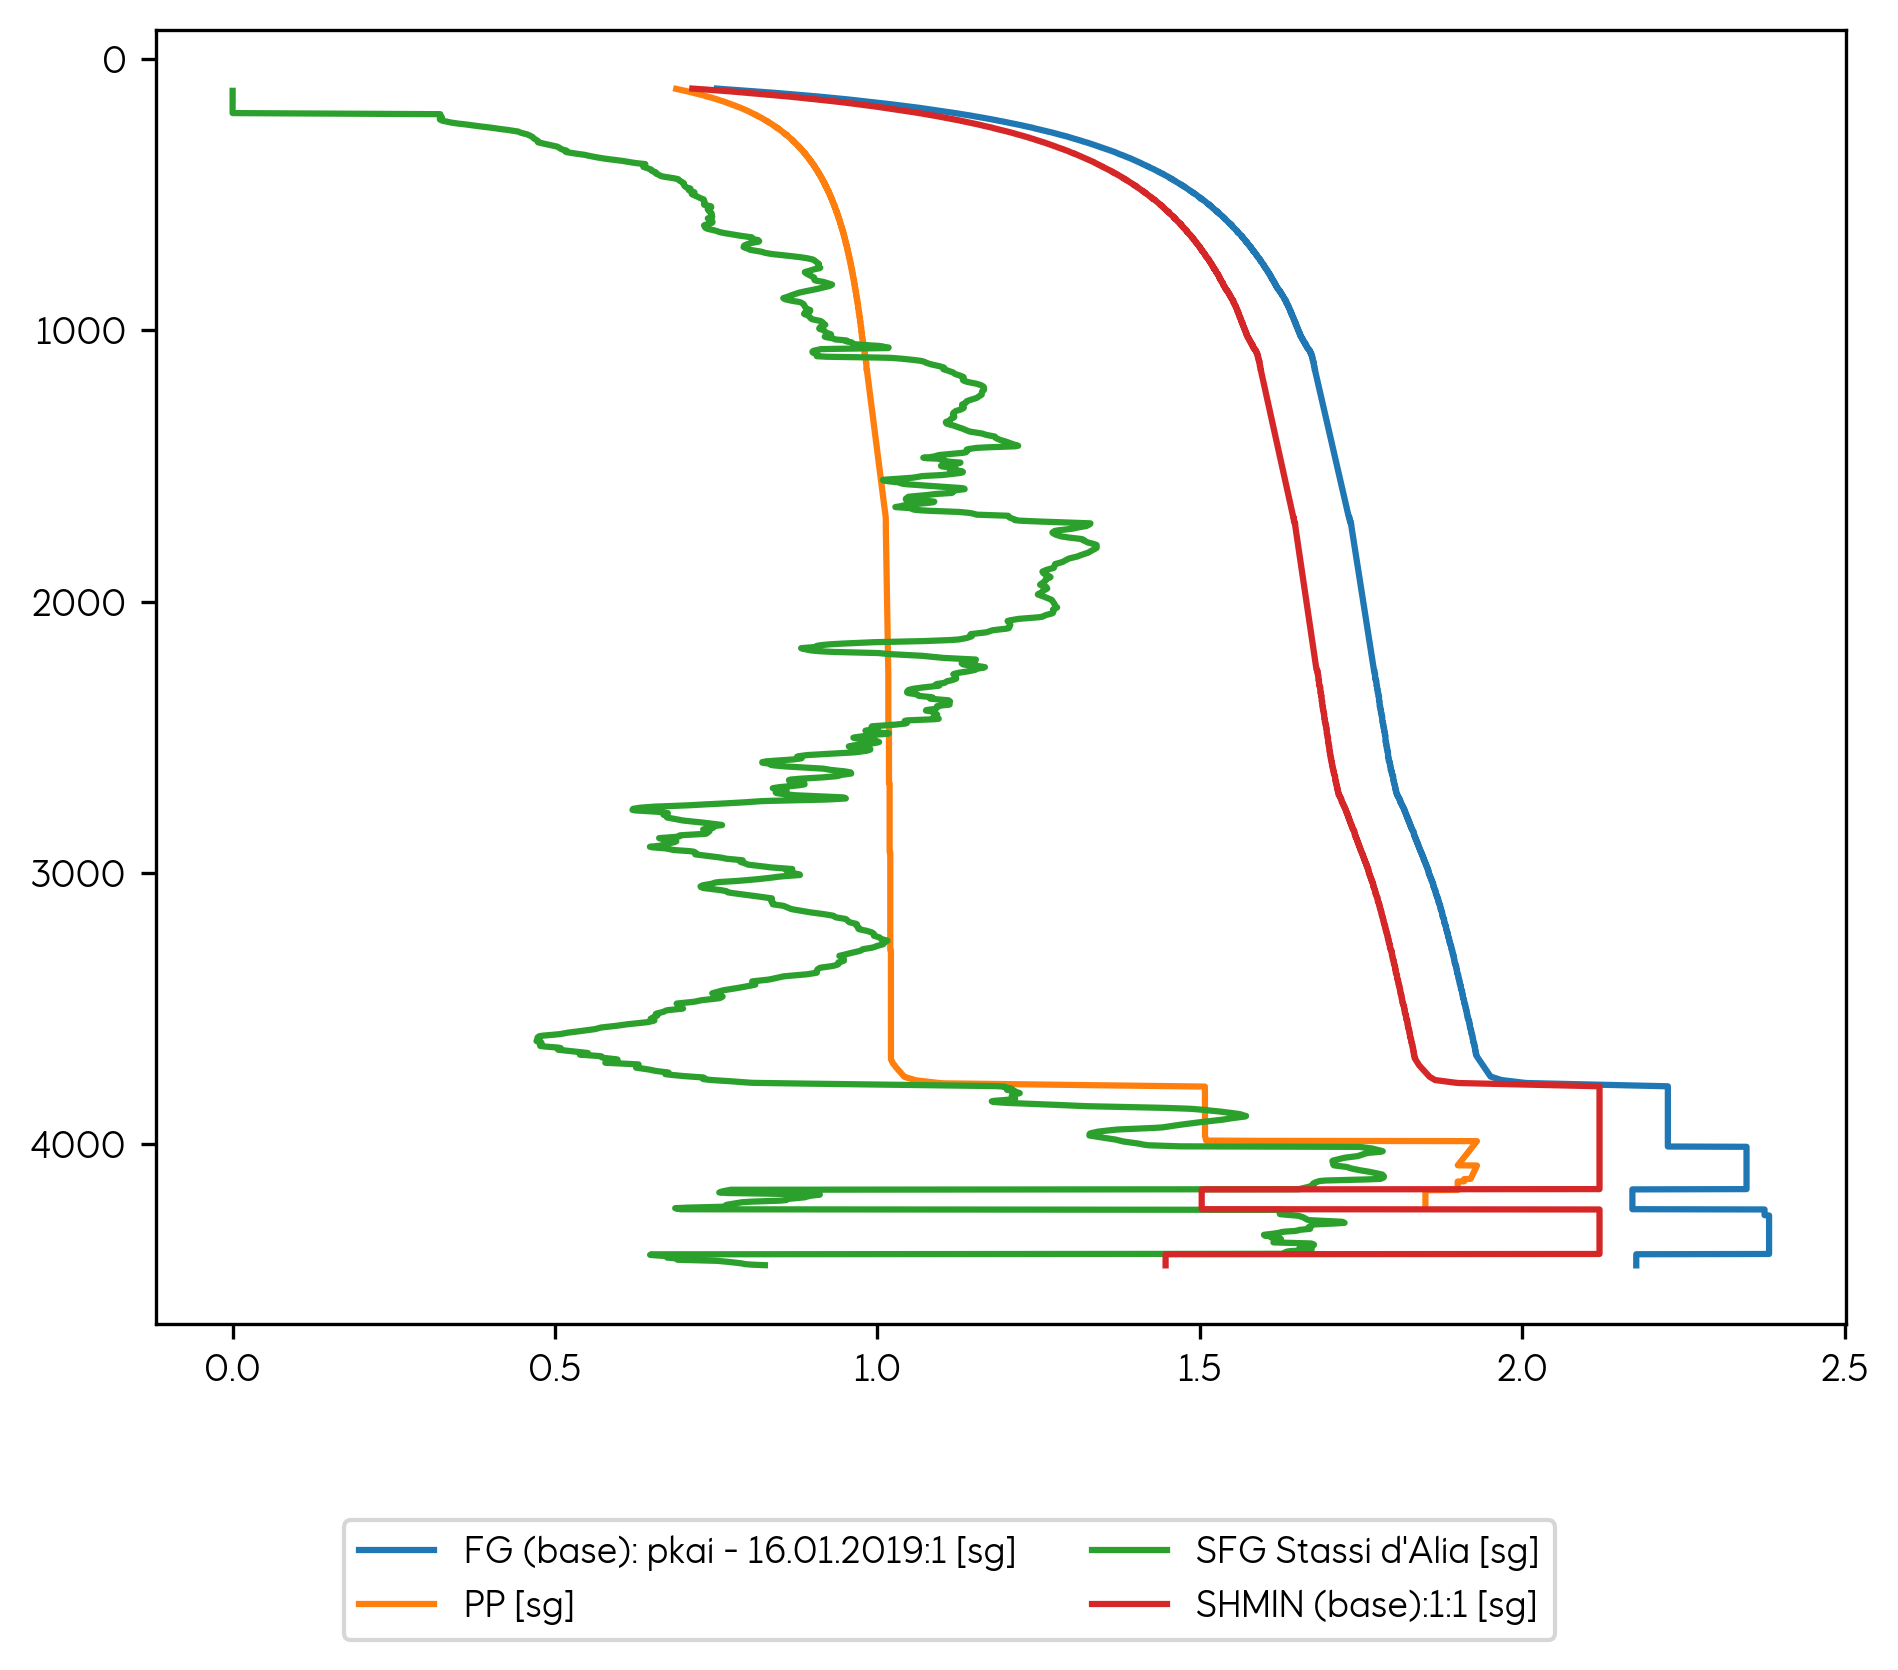

In [115]:

fig, ax = plt.subplots()

for curve in data:
    depth = curve['depthMsl']
    gradient = curve['curveValue'] 
    gradient_name = curve['curveName']
    gradient_units = curve['curveUnits']
    ax.plot(gradient, depth, label = f'{gradient_name} [{gradient_units}]')

ax.invert_yaxis()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.tight_layout()

manual_shmin_z= np.array(data[3]['depthMsl'])
manual_shmin_sg= np.array(data[3]['curveValue'])
manual_shmin_pg= manual_shmin_sg * 1e3 * const.g / const.bar
manual_shmin_p = manual_shmin_pg * manual_shmin_z



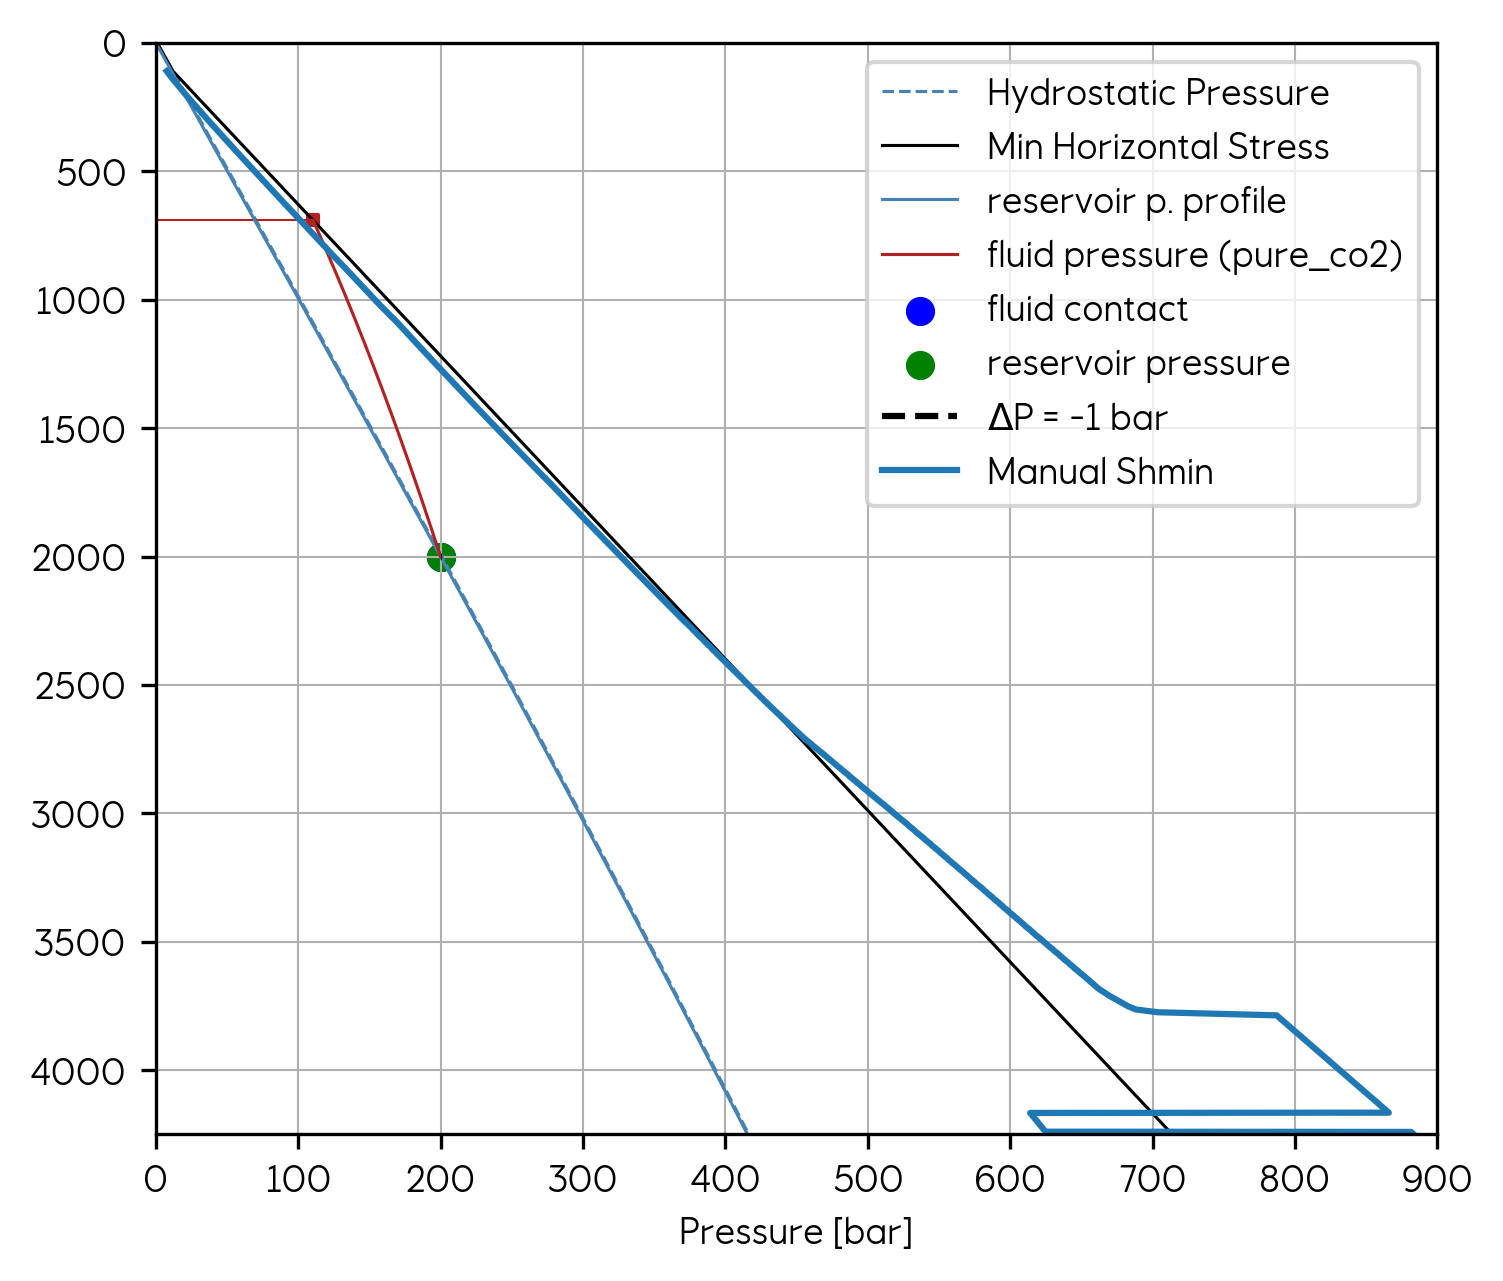

In [116]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True #plot delta p
              )
ax.plot(manual_shmin_p, manual_shmin_z, label='Manual Shmin')

ax.set_ylim(bottom=4250)
ax.set_xlim(right=900)


ax.legend()
handles, labels = ax.get_legend_handles_labels()  
lgd = dict(zip(labels, handles))
ax.legend(lgd.values(), lgd.keys())
# ax.set_ylim(bottom=my_pressure.well_td_rkb - 500)

fig.show()

In [117]:
my_pressure2 = Pressure(sf_depth_msl=171.8-62.8,  # wellbore seafloor depth mTVD MSL. 
                       well_td_rkb=4369,  # wellbore td in mTVD RKB
                       well_rkb=62.8,     # wellbore rkb in mTVD RKB
                       sf_temp=4,         # seafloor temperature in degC
                       geo_tgrad=40,      # geothermal gradient in degC/km
                       fluid_type=field_fluid_type,  # fluid type name, should match the filename in the pvt_constants folder
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants', #path to the pvt constants folder
                       z_fluid_contact= 2000, # depth value coming from WINC UI
                       p_fluid_contact= 200, # pressure value coming from WINC UI,
                       ip_shmin_data = np.stack([manual_shmin_z, manual_shmin_p ]).T
                       ) 

[  1.01325      1.11384372   1.21443794 ... 467.13160244 467.22218748
 467.31276846]
Computing pressure profile for scenario: hydrostatic


/workspaces/WINC_OnePager/notebooks/../src/WellClass/libs/well_pressure/Pressure.py:210: UserWarning: No Shmin data between seafloor depth (109.00000000000001) and minimum provided depth (109.3). Extrapolating using hydrostatic pressure at seafloor.
  warnings.warn(


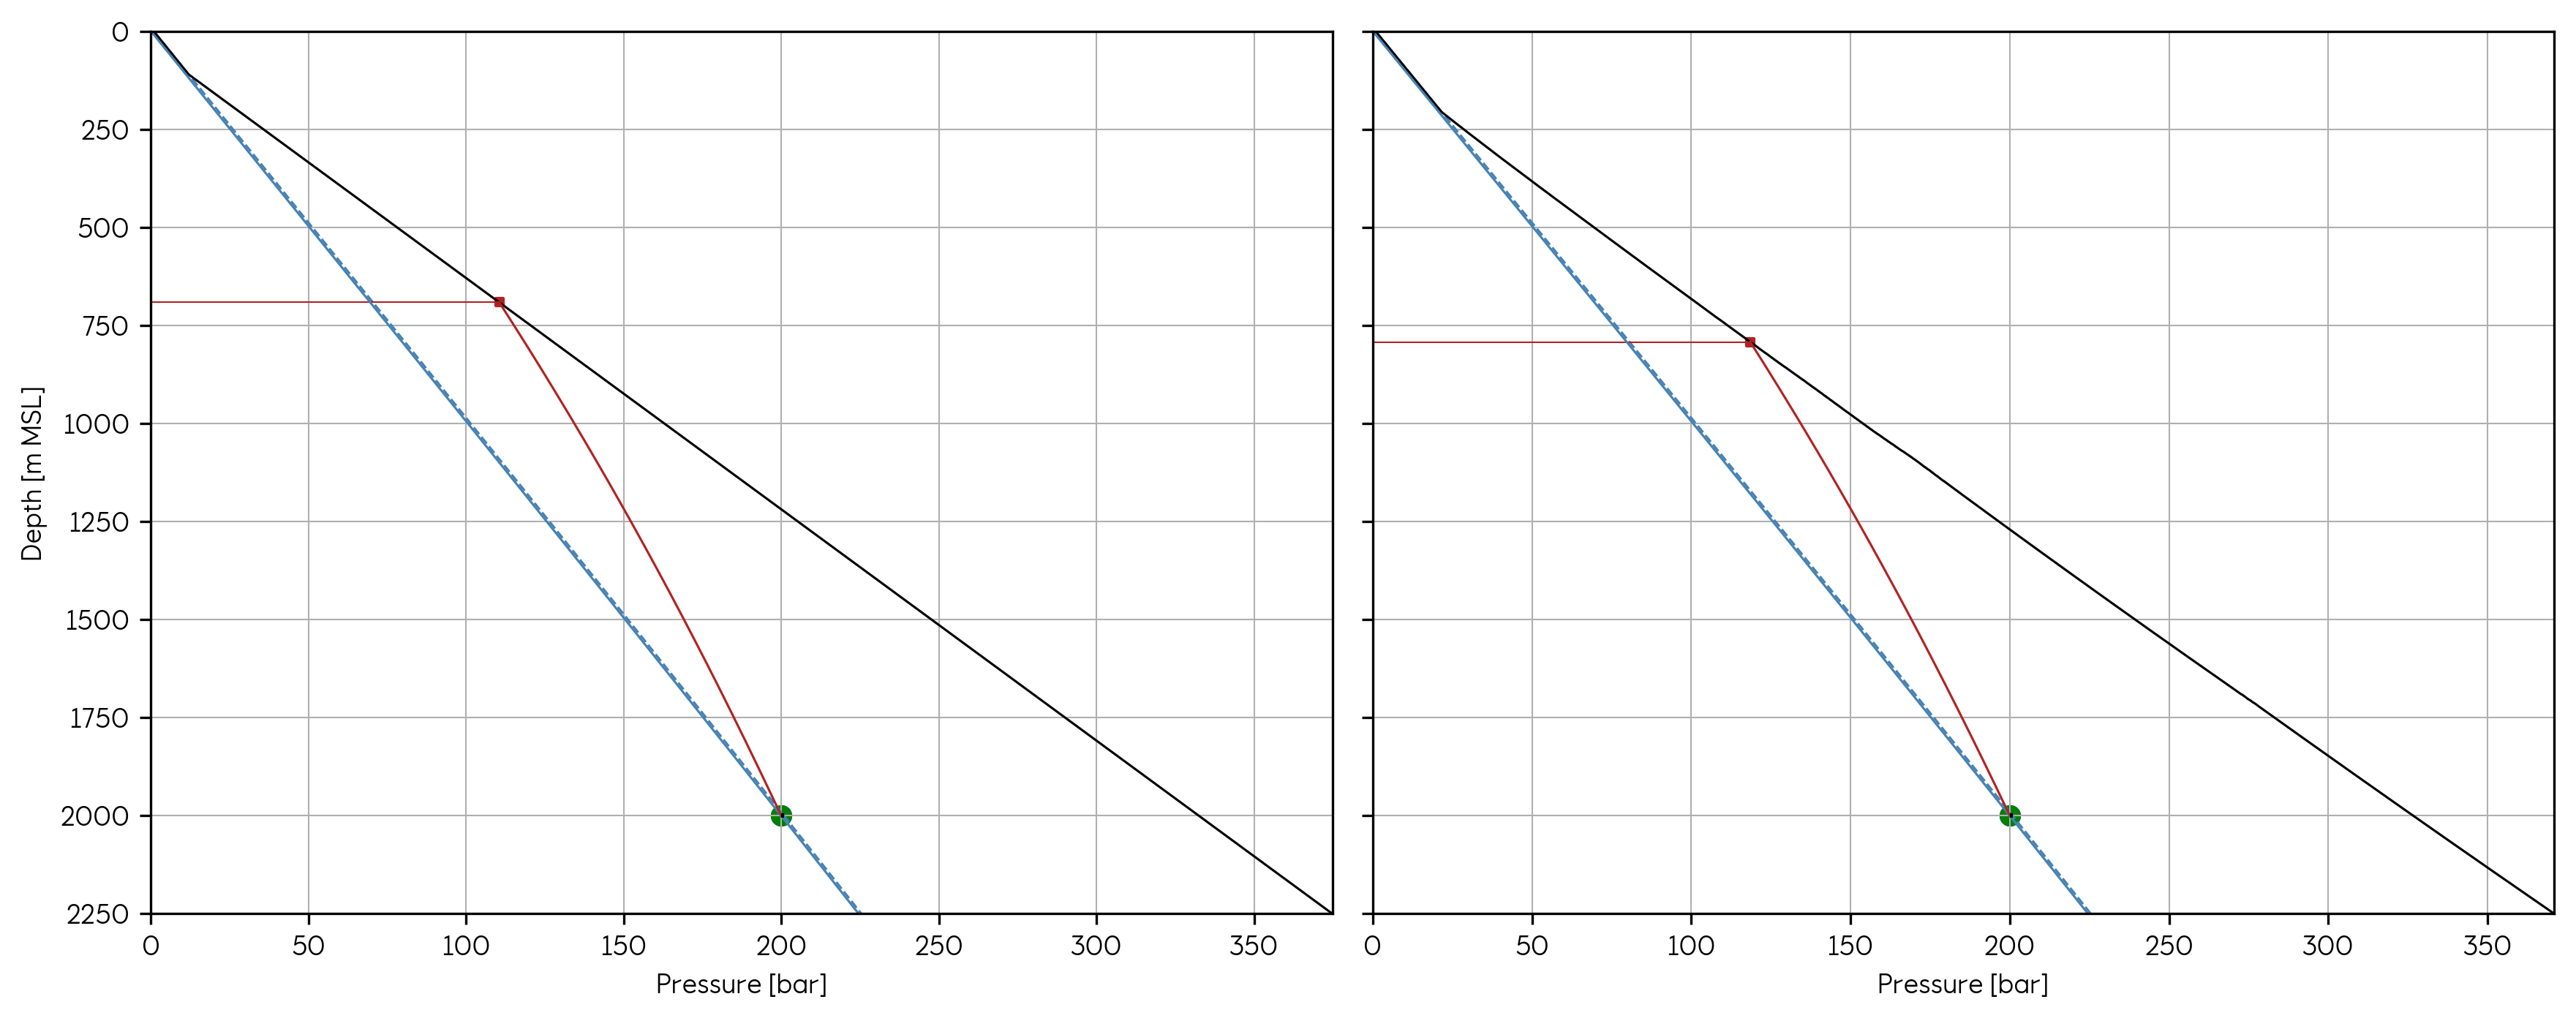

In [118]:
width_cm = 30 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(width, height), sharey=True)

plot_pressure(my_pressure, ax=ax1, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

plot_pressure(my_pressure2, ax=ax2, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

ax1.set_ylabel('Depth [m MSL]')

fig.tight_layout()

T

To compute the minimum horizontal stress curve in bars or Pascals, you'll need to use the depth (in meters) and specific gravity (SG) values. Here's a step-by-step guide:

### Convert Depth to Pressure:

The pressure at a given depth can be calculated using the formula: $P = \rho \cdot g \cdot h$ where:
- $P$ is the pressure in Pascals (Pa).
- $\rho$ is the density of the fluid (in kg/m³).
- $g$ is the acceleration due to gravity (9.81 m/s²).
- $h$ is the depth in meters (m).

### Calculate Density:

The density ($\rho$) can be derived from the specific gravity (SG) using the formula: $\rho = \text{SG} \cdot \rho_{\text{water}}$ where:
- $\rho_{\text{water}}$ is the density of water (approximately 1000 kg/m³).

### Compute Pressure:

Substitute the values into the pressure formula to get the pressure in Pascals.

### Convert to Bars:

To convert Pascals to bars, use the conversion factor: $1 \text{ bar} = 100,000 \text{ Pa}$

### Here's a sample calculation:

Given:
- Depth ($h$) = 1000 meters
- Specific Gravity (SG) = 1.2

### Steps:

1. Calculate density: $\rho = 1.2 \cdot 1000 \text{ kg/m}^3 = 1200 \text{ kg/m}^3$
2. Calculate pressure in Pascals: $P = 1200 \text{ kg/m}^3 \cdot 9.81 \text{ m/s}^2 \cdot 1000 \text{ m} = 11,772,000 \text{ Pa}$
3. Convert to bars: $P = \frac{11,772,000 \text{ Pa}}{100,000} = 117.72 \text{ bars}$

You can apply these steps to each row in your table to compute the minimum horizontal stress curve in bars or Pascals. If you need further assistance with the calculations or have any other questions, feel free to ask!o compute the minimum horizontal stress curve in bars or Pascals, you'll need to use the depth (in meters) and specific gravity (SG) values. Here's a step-by-step guide:

Convert Depth to Pressure:

The pressure at a given depth can be calculated using the formula: $[ P = \rho \cdot g \cdot h ]$ where:
( $P$ ) is the pressure in Pascals (Pa).

( $\rho$ ) is the density of the fluid (in kg/m³).
( $g$ ) is the acceleration due to gravity (9.81 m/s²).
( h ) is the depth in meters (m).
Calculate Density:

The density (( \rho )) can be derived from the specific gravity (SG) using the formula: [ \rho = \text{SG} \cdot \rho_{\text{water}} ] where:
( \rho_{\text{water}} ) is the density of water (approximately 1000 kg/m³).
Compute Pressure:

Substitute the values into the pressure formula to get the pressure in Pascals.
Convert to Bars:

To convert Pascals to bars, use the conversion factor: [ 1 \text{ bar} = 100,000 \text{ Pa} ]
Here's a sample calculation:

Given:

Depth (( h )) = 1000 meters
Specific Gravity (SG) = 1.2
Steps:

Calculate density: [ \rho = 1.2 \cdot 1000 \text{ kg/m}^3 = 1200 \text{ kg/m}^3 ]
Calculate pressure in Pascals: [ P = 1200 \text{ kg/m}^3 \cdot 9.81 \text{ m/s}^2 \cdot 1000 \text{ m} = 11,772,000 \text{ Pa} ]
Convert to bars: [ P = \frac{11,772,000 \text{ Pa}}{100,000} = 117.72 \text{ bars} ]
You can apply these steps to each row in your table to compute the minimum horizontal stress curve in bars or Pascals. If you need further assistance with the calculations or have any other questions, feel free to ask!